In [3]:
## For data handling
import pandas as pd
import numpy as np
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

import string
import fasttext
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

from collections import Counter
from textblob import TextBlob
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator

from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles = True)
# not sure which tokenizer to use. TweetTokenizer was used for word bagging...

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Angelo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Angelo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
#ctweetswb_df = pd.read_csv("final cleaned tweets and wordbagged as ints 4001 affiliated.csv")
ctweets_df = pd.read_csv("final cleaned tweets 4001 affiliated.csv")
tweets_df = pd.read_csv("final tweets 4001 affiliated.csv")
#del ctweetswb_df['Unnamed: 0']
del ctweets_df['Unnamed: 0']
del tweets_df['Unnamed: 0']


In [5]:
ctweets_df.head()

id                      created_at    screen_name  \
0  1325981321957675008  Tue Nov 10 01:59:17 +0000 2020  LimaCharlie88   
1  1325981321991217153  Tue Nov 10 01:59:17 +0000 2020  TurnItRed2020   
2  1325981321760530432  Tue Nov 10 01:59:17 +0000 2020    DeansherryS   
3  1325981322054021120  Tue Nov 10 01:59:17 +0000 2020       JJDianeM   
4  1325981322062430208  Tue Nov 10 01:59:17 +0000 2020  justbeyou_100   

                                                text  Affiliation  
0  Point taken, but Biden won this election fairl...         -1.0  
1  White Liberals went to black cities, found bla...          1.0  
2  Trump's election challenge is continuing, but ...         -1.0  
3  "Six Jones Day lawyers said that given the sma...         -1.0  
4  We tried out best. David is actually very reli...          0.0

In [6]:
ctweets_df['no_contract'] = ctweets_df['text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
ctweets_df['text_no_contract'] = [' '.join(map(str,l)) for l in ctweets_df['no_contract']]
ctweets_df.head(20)

id                      created_at      screen_name  \
0   1325981321957675008  Tue Nov 10 01:59:17 +0000 2020    LimaCharlie88   
1   1325981321991217153  Tue Nov 10 01:59:17 +0000 2020    TurnItRed2020   
2   1325981321760530432  Tue Nov 10 01:59:17 +0000 2020      DeansherryS   
3   1325981322054021120  Tue Nov 10 01:59:17 +0000 2020         JJDianeM   
4   1325981322062430208  Tue Nov 10 01:59:17 +0000 2020    justbeyou_100   
5   1325981322116964352  Tue Nov 10 01:59:17 +0000 2020  FvA5uO6EznGSbdd   
6   1325981322129469440  Tue Nov 10 01:59:17 +0000 2020         davaldod   
7   1325981322196692995  Tue Nov 10 01:59:17 +0000 2020  MCCollArchitect   
8   1325981322020483074  Tue Nov 10 01:59:17 +0000 2020        j_chudzik   
9   1325981322343493633  Tue Nov 10 01:59:17 +0000 2020        AlexCHAFD   
10  1325981322393886720  Tue Nov 10 01:59:17 +0000 2020          kmwired   
11  1325981322532151296  Tue Nov 10 01:59:17 +0000 2020      LindaNDanny   
12  1325981322511327232  Tue Nov 10 01:59:17 +0000 2020  SilentPatriotFL   
13  1325981322762878976  Tue Nov 10 01:59:17 +0000 2020        JeffKost1   
14  1325981322721046530  Tue Nov 10 01:59:17 +0000 2020       thekytikat   
15  1325981322767179778  Tue Nov 10 01:59:17 +0000 2020       pepegazebo   
16  1325981322863632386  Tue Nov 10 01:59:17 +0000 2020        ladyi0702   
17  1325981322951630848  Tue Nov 10 01:59:17 +0000 2020           mstex1   
18  1325981322762915840  Tue Nov 10 01:59:17 +0000 2020       NThornback   
19  1325981323031441409  Tue Nov 10 01:59:17 +0000 2020       Macbogger1   

                                                 text  Affiliation  \
0   Point taken, but Biden won this election fairl...         -1.0   
1   White Liberals went to black cities, found bla...          1.0   
2   Trump's election challenge is continuing, but ...         -1.0   
3   "Six Jones Day lawyers said that given the sma...         -1.0   
4   We tried out best. David is actually very reli...          0.0   
5   The FDA and the Democrats didn t want to have ...          1.0   
6   This is simple Donald Trump is openly trying t...         -1.0   
7   The COVID-19 pandemic is worse than ever, and ...          0.0   
8   I think that Trump is intent to get enough leg...          0.0   
9   Republican leaders are going to undermine demo...         -1.0   
10  I literally stood in Mitch McConnell's office ...          0.0   
11  The election results start to make a lot more ...          1.0   
12  They may be facing 20 years for fraud or elect...          1.0   
13  As I have long said, and the others would only...          0.0   
14  Otherwise it'll be 4 more years of "He stole t...          0.0   
15  As I have long said, and the others would only...          0.0   
16                                    Thank you, sir.          0.0   
17  This election fraud is too massive to ignore o...          1.0   
18  Anyone else with Benfords Law thinking to them...          1.0   
19  Breaking Orange County California board of Ele...          0.0   

                                          no_contract  \
0   [Point, taken,, but, Biden, won, this, electio...   
1   [White, Liberals, went, to, black, cities,, fo...   
2   [Trump's, election, challenge, is, continuing,...   
3   ["Six, Jones, Day, lawyers, said, that, given,...   
4   [We, tried, out, best., David, is, actually, v...   
5   [The, FDA, and, the, Democrats, didn, t, want,...   
6   [This, is, simple, Donald, Trump, is, openly, ...   
7   [The, COVID-19, pandemic, is, worse, than, eve...   
8   [I, think, that, Trump, is, intent, to, get, e...   
9   [Republican, leaders, are, going, to, undermin...   
10  [I, literally, stood, in, Mitch, McConnell's, ...   
11  [The, election, results, start, to, make, a, l...   
12  [They, may, be, facing, 20, years, for, fraud,...   
13  [As, I, have, long, said,, and, the, others, w...   
14  [Otherwise, it will, be, 4, more, years, of, "...   
15  [As, I, have, long, said,, and, the, 

In [7]:
# Trying out the different tokenizers:
#ctweets_df['word_tokenized'] = ctweets_df['text_no_contract'].apply(word_tokenize)
ctweets_df['tweet_tokenized'] = ctweets_df['text_no_contract'].apply(tknzr.tokenize)
ctweets_df.head()

id                      created_at    screen_name  \
0  1325981321957675008  Tue Nov 10 01:59:17 +0000 2020  LimaCharlie88   
1  1325981321991217153  Tue Nov 10 01:59:17 +0000 2020  TurnItRed2020   
2  1325981321760530432  Tue Nov 10 01:59:17 +0000 2020    DeansherryS   
3  1325981322054021120  Tue Nov 10 01:59:17 +0000 2020       JJDianeM   
4  1325981322062430208  Tue Nov 10 01:59:17 +0000 2020  justbeyou_100   

                                                text  Affiliation  \
0  Point taken, but Biden won this election fairl...         -1.0   
1  White Liberals went to black cities, found bla...          1.0   
2  Trump's election challenge is continuing, but ...         -1.0   
3  "Six Jones Day lawyers said that given the sma...         -1.0   
4  We tried out best. David is actually very reli...          0.0   

                                         no_contract  \
0  [Point, taken,, but, Biden, won, this, electio...   
1  [White, Liberals, went, to, black, cities,, fo...   
2  [Trump's, election, challenge, is, continuing,...   
3  ["Six, Jones, Day, lawyers, said, that, given,...   
4  [We, tried, out, best., David, is, actually, v...   

                                    text_no_contract  \
0  Point taken, but Biden won this election fairl...   
1  White Liberals went to black cities, found bla...   
2  Trump's election challenge is continuing, but ...   
3  "Six Jones Day lawyers said that given the sma...   
4  We tried out best. David is actually very reli...   

                                     tweet_tokenized  
0  [Point, taken, ,, but, Biden, won, this, elect...  
1  [White, Liberals, went, to, black, cities, ,, ...  
2  [Trump's, election, challenge, is, continuing,...  
3  [", Six, Jones, Day, lawyers, said, that, give...  
4  [We, tried, out, best, ., David, is, actually,...

In [8]:
ctweets_df['lower'] = ctweets_df['tweet_tokenized'].apply(lambda x: [word.lower() for word in x])
#ctweets_df['wlower'] = ctweets_df['word_tokenized'].apply(lambda x: [word.lower() for word in x])
ctweets_df.head()

id                      created_at    screen_name  \
0  1325981321957675008  Tue Nov 10 01:59:17 +0000 2020  LimaCharlie88   
1  1325981321991217153  Tue Nov 10 01:59:17 +0000 2020  TurnItRed2020   
2  1325981321760530432  Tue Nov 10 01:59:17 +0000 2020    DeansherryS   
3  1325981322054021120  Tue Nov 10 01:59:17 +0000 2020       JJDianeM   
4  1325981322062430208  Tue Nov 10 01:59:17 +0000 2020  justbeyou_100   

                                                text  Affiliation  \
0  Point taken, but Biden won this election fairl...         -1.0   
1  White Liberals went to black cities, found bla...          1.0   
2  Trump's election challenge is continuing, but ...         -1.0   
3  "Six Jones Day lawyers said that given the sma...         -1.0   
4  We tried out best. David is actually very reli...          0.0   

                                         no_contract  \
0  [Point, taken,, but, Biden, won, this, electio...   
1  [White, Liberals, went, to, black, cities,, fo...   
2  [Trump's, election, challenge, is, continuing,...   
3  ["Six, Jones, Day, lawyers, said, that, given,...   
4  [We, tried, out, best., David, is, actually, v...   

                                    text_no_contract  \
0  Point taken, but Biden won this election fairl...   
1  White Liberals went to black cities, found bla...   
2  Trump's election challenge is continuing, but ...   
3  "Six Jones Day lawyers said that given the sma...   
4  We tried out best. David is actually very reli...   

                                     tweet_tokenized  \
0  [Point, taken, ,, but, Biden, won, this, elect...   
1  [White, Liberals, went, to, black, cities, ,, ...   
2  [Trump's, election, challenge, is, continuing,...   
3  [", Six, Jones, Day, lawyers, said, that, give...   
4  [We, tried, out, best, ., David, is, actually,...   

                                               lower  
0  [point, taken, ,, but, biden, won, this, elect...  
1  [white, liberals, went, to, black, cities, ,, ...  
2  [trump's, election, challenge, is, continuing,...  
3  [", six, jones, day, lawyers, said, that, give...  
4  [we, tried, out, best, ., david, is, actually,...

In [9]:
punc = string.punctuation
ctweets_df['no_punctuation'] = ctweets_df['lower'].apply(lambda x: [word for word in x if word not in punc])
ctweets_df.head()

id                      created_at    screen_name  \
0  1325981321957675008  Tue Nov 10 01:59:17 +0000 2020  LimaCharlie88   
1  1325981321991217153  Tue Nov 10 01:59:17 +0000 2020  TurnItRed2020   
2  1325981321760530432  Tue Nov 10 01:59:17 +0000 2020    DeansherryS   
3  1325981322054021120  Tue Nov 10 01:59:17 +0000 2020       JJDianeM   
4  1325981322062430208  Tue Nov 10 01:59:17 +0000 2020  justbeyou_100   

                                                text  Affiliation  \
0  Point taken, but Biden won this election fairl...         -1.0   
1  White Liberals went to black cities, found bla...          1.0   
2  Trump's election challenge is continuing, but ...         -1.0   
3  "Six Jones Day lawyers said that given the sma...         -1.0   
4  We tried out best. David is actually very reli...          0.0   

                                         no_contract  \
0  [Point, taken,, but, Biden, won, this, electio...   
1  [White, Liberals, went, to, black, cities,, fo...   
2  [Trump's, election, challenge, is, continuing,...   
3  ["Six, Jones, Day, lawyers, said, that, given,...   
4  [We, tried, out, best., David, is, actually, v...   

                                    text_no_contract  \
0  Point taken, but Biden won this election fairl...   
1  White Liberals went to black cities, found bla...   
2  Trump's election challenge is continuing, but ...   
3  "Six Jones Day lawyers said that given the sma...   
4  We tried out best. David is actually very reli...   

                                     tweet_tokenized  \
0  [Point, taken, ,, but, Biden, won, this, elect...   
1  [White, Liberals, went, to, black, cities, ,, ...   
2  [Trump's, election, challenge, is, continuing,...   
3  [", Six, Jones, Day, lawyers, said, that, give...   
4  [We, tried, out, best, ., David, is, actually,...   

                                               lower  \
0  [point, taken, ,, but, biden, won, this, elect...   
1  [white, liberals, went, to, black, cities, ,, ...   
2  [trump's, election, challenge, is, continuing,...   
3  [", six, jones, day, lawyers, said, that, give...   
4  [we, tried, out, best, ., david, is, actually,...   

                                      no_punctuation  
0  [point, taken, but, biden, won, this, election...  
1  [white, liberals, went, to, black, cities, fou...  
2  [trump's, election, challenge, is, continuing,...  
3  [six, jones, day, lawyers, said, that, given, ...  
4  [we, tried, out, best, david, is, actually, ve...

In [10]:
stop_words = set(stopwords.words('english'))
ctweets_df['stopwords_removed'] = ctweets_df['no_punctuation'].apply(lambda x: [word for word in x if word not in stop_words])
ctweets_df.head()

id                      created_at    screen_name  \
0  1325981321957675008  Tue Nov 10 01:59:17 +0000 2020  LimaCharlie88   
1  1325981321991217153  Tue Nov 10 01:59:17 +0000 2020  TurnItRed2020   
2  1325981321760530432  Tue Nov 10 01:59:17 +0000 2020    DeansherryS   
3  1325981322054021120  Tue Nov 10 01:59:17 +0000 2020       JJDianeM   
4  1325981322062430208  Tue Nov 10 01:59:17 +0000 2020  justbeyou_100   

                                                text  Affiliation  \
0  Point taken, but Biden won this election fairl...         -1.0   
1  White Liberals went to black cities, found bla...          1.0   
2  Trump's election challenge is continuing, but ...         -1.0   
3  "Six Jones Day lawyers said that given the sma...         -1.0   
4  We tried out best. David is actually very reli...          0.0   

                                         no_contract  \
0  [Point, taken,, but, Biden, won, this, electio...   
1  [White, Liberals, went, to, black, cities,, fo...   
2  [Trump's, election, challenge, is, continuing,...   
3  ["Six, Jones, Day, lawyers, said, that, given,...   
4  [We, tried, out, best., David, is, actually, v...   

                                    text_no_contract  \
0  Point taken, but Biden won this election fairl...   
1  White Liberals went to black cities, found bla...   
2  Trump's election challenge is continuing, but ...   
3  "Six Jones Day lawyers said that given the sma...   
4  We tried out best. David is actually very reli...   

                                     tweet_tokenized  \
0  [Point, taken, ,, but, Biden, won, this, elect...   
1  [White, Liberals, went, to, black, cities, ,, ...   
2  [Trump's, election, challenge, is, continuing,...   
3  [", Six, Jones, Day, lawyers, said, that, give...   
4  [We, tried, out, best, ., David, is, actually,...   

                                               lower  \
0  [point, taken, ,, but, biden, won, this, elect...   
1  [white, liberals, went, to, black, cities, ,, ...   
2  [trump's, election, challenge, is, continuing,...   
3  [", six, jones, day, lawyers, said, that, give...   
4  [we, tried, out, best, ., david, is, actually,...   

                                      no_punctuation  \
0  [point, taken, but, biden, won, this, election...   
1  [white, liberals, went, to, black, cities, fou...   
2  [trump's, election, challenge, is, continuing,...   
3  [six, jones, day, lawyers, said, that, given, ...   
4  [we, tried, out, best, david, is, actually, ve...   

                                   stopwords_removed  
0  [point, taken, biden, election, fairly, convin...  
1  [white, liberals, went, black, cities, found, ...  
2  [trump's, election, challenge, continuing, cam...  
3  [six, jones, day, lawyers, said, given, small,...  
4  [tried, best, david, actually, relieved, happy...

In [11]:
ctweets_df['pos_tags'] = ctweets_df['stopwords_removed'].apply(nltk.tag.pos_tag)
ctweets_df.head()

id                      created_at    screen_name  \
0  1325981321957675008  Tue Nov 10 01:59:17 +0000 2020  LimaCharlie88   
1  1325981321991217153  Tue Nov 10 01:59:17 +0000 2020  TurnItRed2020   
2  1325981321760530432  Tue Nov 10 01:59:17 +0000 2020    DeansherryS   
3  1325981322054021120  Tue Nov 10 01:59:17 +0000 2020       JJDianeM   
4  1325981322062430208  Tue Nov 10 01:59:17 +0000 2020  justbeyou_100   

                                                text  Affiliation  \
0  Point taken, but Biden won this election fairl...         -1.0   
1  White Liberals went to black cities, found bla...          1.0   
2  Trump's election challenge is continuing, but ...         -1.0   
3  "Six Jones Day lawyers said that given the sma...         -1.0   
4  We tried out best. David is actually very reli...          0.0   

                                         no_contract  \
0  [Point, taken,, but, Biden, won, this, electio...   
1  [White, Liberals, went, to, black, cities,, fo...   
2  [Trump's, election, challenge, is, continuing,...   
3  ["Six, Jones, Day, lawyers, said, that, given,...   
4  [We, tried, out, best., David, is, actually, v...   

                                    text_no_contract  \
0  Point taken, but Biden won this election fairl...   
1  White Liberals went to black cities, found bla...   
2  Trump's election challenge is continuing, but ...   
3  "Six Jones Day lawyers said that given the sma...   
4  We tried out best. David is actually very reli...   

                                     tweet_tokenized  \
0  [Point, taken, ,, but, Biden, won, this, elect...   
1  [White, Liberals, went, to, black, cities, ,, ...   
2  [Trump's, election, challenge, is, continuing,...   
3  [", Six, Jones, Day, lawyers, said, that, give...   
4  [We, tried, out, best, ., David, is, actually,...   

                                               lower  \
0  [point, taken, ,, but, biden, won, this, elect...   
1  [white, liberals, went, to, black, cities, ,, ...   
2  [trump's, election, challenge, is, continuing,...   
3  [", six, jones, day, lawyers, said, that, give...   
4  [we, tried, out, best, ., david, is, actually,...   

                                      no_punctuation  \
0  [point, taken, but, biden, won, this, election...   
1  [white, liberals, went, to, black, cities, fou...   
2  [trump's, election, challenge, is, continuing,...   
3  [six, jones, day, lawyers, said, that, given, ...   
4  [we, tried, out, best, david, is, actually, ve...   

                                   stopwords_removed  \
0  [point, taken, biden, election, fairly, convin...   
1  [white, liberals, went, black, cities, found, ...   
2  [trump's, election, challenge, continuing, cam...   
3  [six, jones, day, lawyers, said, given, small,...   
4  [tried, best, david, actually, relieved, happy...   

                                            pos_tags  
0  [(point, NN), (taken, VBN), (biden, JJ), (elec...  
1  [(white, JJ), (liberals, NNS), (went, VBD), (b...  
2  [(trump's, JJ), (election, NN), (challenge, NN...  
3  [(six, CD), (jones, NNS), (day, NN), (lawyers,...  
4  [(tried, VBN), (best, JJS), (david, NN), (actu...

In [12]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
ctweets_df['wordnet_pos'] = ctweets_df['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
ctweets_df.head()

id                      created_at    screen_name  \
0  1325981321957675008  Tue Nov 10 01:59:17 +0000 2020  LimaCharlie88   
1  1325981321991217153  Tue Nov 10 01:59:17 +0000 2020  TurnItRed2020   
2  1325981321760530432  Tue Nov 10 01:59:17 +0000 2020    DeansherryS   
3  1325981322054021120  Tue Nov 10 01:59:17 +0000 2020       JJDianeM   
4  1325981322062430208  Tue Nov 10 01:59:17 +0000 2020  justbeyou_100   

                                                text  Affiliation  \
0  Point taken, but Biden won this election fairl...         -1.0   
1  White Liberals went to black cities, found bla...          1.0   
2  Trump's election challenge is continuing, but ...         -1.0   
3  "Six Jones Day lawyers said that given the sma...         -1.0   
4  We tried out best. David is actually very reli...          0.0   

                                         no_contract  \
0  [Point, taken,, but, Biden, won, this, electio...   
1  [White, Liberals, went, to, black, cities,, fo...   
2  [Trump's, election, challenge, is, continuing,...   
3  ["Six, Jones, Day, lawyers, said, that, given,...   
4  [We, tried, out, best., David, is, actually, v...   

                                    text_no_contract  \
0  Point taken, but Biden won this election fairl...   
1  White Liberals went to black cities, found bla...   
2  Trump's election challenge is continuing, but ...   
3  "Six Jones Day lawyers said that given the sma...   
4  We tried out best. David is actually very reli...   

                                     tweet_tokenized  \
0  [Point, taken, ,, but, Biden, won, this, elect...   
1  [White, Liberals, went, to, black, cities, ,, ...   
2  [Trump's, election, challenge, is, continuing,...   
3  [", Six, Jones, Day, lawyers, said, that, give...   
4  [We, tried, out, best, ., David, is, actually,...   

                                               lower  \
0  [point, taken, ,, but, biden, won, this, elect...   
1  [white, liberals, went, to, black, cities, ,, ...   
2  [trump's, election, challenge, is, continuing,...   
3  [", six, jones, day, lawyers, said, that, give...   
4  [we, tried, out, best, ., david, is, actually,...   

                                      no_punctuation  \
0  [point, taken, but, biden, won, this, election...   
1  [white, liberals, went, to, black, cities, fou...   
2  [trump's, election, challenge, is, continuing,...   
3  [six, jones, day, lawyers, said, that, given, ...   
4  [we, tried, out, best, david, is, actually, ve...   

                                   stopwords_removed  \
0  [point, taken, biden, election, fairly, convin...   
1  [white, liberals, went, black, cities, found, ...   
2  [trump's, election, challenge, continuing, cam...   
3  [six, jones, day, lawyers, said, given, small,...   
4  [tried, best, david, actually, relieved, happy...   

                                            pos_tags  \
0  [(point, NN), (taken, VBN), (biden, JJ), (elec...   
1  [(white, JJ), (liberals, NNS), (went, VBD), (b...   
2  [(trump's, JJ), (election, NN), (challenge, NN...   
3  [(six, CD), (jones, NNS), (day, NN), (lawyers,...   
4  [(tried, VBN), (best, JJS), (david, NN), (actu...   

                                         wordnet_pos  
0  [(point, n), (taken, v), (biden, a), (election...  
1  [(white, a), (liberals, n), (went, v), (black,...  
2  [(trump's, a), (election, n), (challenge, n), ...  
3  [(six, n), (jones, n), (day, n), (lawyers, n),...  
4  [(tried, v), (best, a), (david, n), (actually,...

In [13]:
wnl = WordNetLemmatizer()
ctweets_df['lemmatized'] = ctweets_df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
ctweets_df.head()

id                      created_at    screen_name  \
0  1325981321957675008  Tue Nov 10 01:59:17 +0000 2020  LimaCharlie88   
1  1325981321991217153  Tue Nov 10 01:59:17 +0000 2020  TurnItRed2020   
2  1325981321760530432  Tue Nov 10 01:59:17 +0000 2020    DeansherryS   
3  1325981322054021120  Tue Nov 10 01:59:17 +0000 2020       JJDianeM   
4  1325981322062430208  Tue Nov 10 01:59:17 +0000 2020  justbeyou_100   

                                                text  Affiliation  \
0  Point taken, but Biden won this election fairl...         -1.0   
1  White Liberals went to black cities, found bla...          1.0   
2  Trump's election challenge is continuing, but ...         -1.0   
3  "Six Jones Day lawyers said that given the sma...         -1.0   
4  We tried out best. David is actually very reli...          0.0   

                                         no_contract  \
0  [Point, taken,, but, Biden, won, this, electio...   
1  [White, Liberals, went, to, black, cities,, fo...   
2  [Trump's, election, challenge, is, continuing,...   
3  ["Six, Jones, Day, lawyers, said, that, given,...   
4  [We, tried, out, best., David, is, actually, v...   

                                    text_no_contract  \
0  Point taken, but Biden won this election fairl...   
1  White Liberals went to black cities, found bla...   
2  Trump's election challenge is continuing, but ...   
3  "Six Jones Day lawyers said that given the sma...   
4  We tried out best. David is actually very reli...   

                                     tweet_tokenized  \
0  [Point, taken, ,, but, Biden, won, this, elect...   
1  [White, Liberals, went, to, black, cities, ,, ...   
2  [Trump's, election, challenge, is, continuing,...   
3  [", Six, Jones, Day, lawyers, said, that, give...   
4  [We, tried, out, best, ., David, is, actually,...   

                                               lower  \
0  [point, taken, ,, but, biden, won, this, elect...   
1  [white, liberals, went, to, black, cities, ,, ...   
2  [trump's, election, challenge, is, continuing,...   
3  [", six, jones, day, lawyers, said, that, give...   
4  [we, tried, out, best, ., david, is, actually,...   

                                      no_punctuation  \
0  [point, taken, but, biden, won, this, election...   
1  [white, liberals, went, to, black, cities, fou...   
2  [trump's, election, challenge, is, continuing,...   
3  [six, jones, day, lawyers, said, that, given, ...   
4  [we, tried, out, best, david, is, actually, ve...   

                                   stopwords_removed  \
0  [point, taken, biden, election, fairly, convin...   
1  [white, liberals, went, black, cities, found, ...   
2  [trump's, election, challenge, continuing, cam...   
3  [six, jones, day, lawyers, said, given, small,...   
4  [tried, best, david, actually, relieved, happy...   

                                            pos_tags  \
0  [(point, NN), (taken, VBN), (biden, JJ), (elec...   
1  [(white, JJ), (liberals, NNS), (went, VBD), (b...   
2  [(trump's, JJ), (election, NN), (challenge, NN...   
3  [(six, CD), (jones, NNS), (day, NN), (lawyers,...   
4  [(tried, VBN), (best, JJS), (david, NN), (actu...   

                                         wordnet_pos  \
0  [(point, n), (taken, v), (biden, a), (election...   
1  [(white, a), (liberals, n), (went, v), (black,...   
2  [(trump's, a), (election, n), (challenge, n), ...   
3  [(six, n), (jones, n), (day, n), (lawyers, n),...   
4  [(tried, v), (best, a), (david, n), (actually,...   

                                          lemmatized  
0  [point, take, biden, election, fairly, convinc...  
1  [white, liberal, go, black, city, find, black,...  
2  [trump's, election, challenge, continue, campa...  
3  [six, jones, day, lawyer, say, give, small, nu...  
4  [try, best, david, actually, relieve, happy, g...

In [14]:
ctweets_df = ctweets_df[['id','created_at','screen_name','lemmatized','Affiliation']]
ctweets_df.head()

id                      created_at    screen_name  \
0  1325981321957675008  Tue Nov 10 01:59:17 +0000 2020  LimaCharlie88   
1  1325981321991217153  Tue Nov 10 01:59:17 +0000 2020  TurnItRed2020   
2  1325981321760530432  Tue Nov 10 01:59:17 +0000 2020    DeansherryS   
3  1325981322054021120  Tue Nov 10 01:59:17 +0000 2020       JJDianeM   
4  1325981322062430208  Tue Nov 10 01:59:17 +0000 2020  justbeyou_100   

                                          lemmatized  Affiliation  
0  [point, take, biden, election, fairly, convinc...         -1.0  
1  [white, liberal, go, black, city, find, black,...          1.0  
2  [trump's, election, challenge, continue, campa...         -1.0  
3  [six, jones, day, lawyer, say, give, small, nu...         -1.0  
4  [try, best, david, actually, relieve, happy, g...          0.0

In [15]:
ctweets_df['lemma_str'] = [' '.join(map(str,l)) for l in ctweets_df['lemmatized']]
ctweets_df.head()

id                      created_at    screen_name  \
0  1325981321957675008  Tue Nov 10 01:59:17 +0000 2020  LimaCharlie88   
1  1325981321991217153  Tue Nov 10 01:59:17 +0000 2020  TurnItRed2020   
2  1325981321760530432  Tue Nov 10 01:59:17 +0000 2020    DeansherryS   
3  1325981322054021120  Tue Nov 10 01:59:17 +0000 2020       JJDianeM   
4  1325981322062430208  Tue Nov 10 01:59:17 +0000 2020  justbeyou_100   

                                          lemmatized  Affiliation  \
0  [point, take, biden, election, fairly, convinc...         -1.0   
1  [white, liberal, go, black, city, find, black,...          1.0   
2  [trump's, election, challenge, continue, campa...         -1.0   
3  [six, jones, day, lawyer, say, give, small, nu...         -1.0   
4  [try, best, david, actually, relieve, happy, g...          0.0   

                                           lemma_str  
0      point take biden election fairly convincingly  
1  white liberal go black city find black folk st...  
2  trump's election challenge continue campaign a...  
3  six jones day lawyer say give small number lat...  
4  try best david actually relieve happy get sooo...

In [16]:
ctweets_df['sentiment'] = ctweets_df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
ctweets_df.head()

id                      created_at    screen_name  \
0  1325981321957675008  Tue Nov 10 01:59:17 +0000 2020  LimaCharlie88   
1  1325981321991217153  Tue Nov 10 01:59:17 +0000 2020  TurnItRed2020   
2  1325981321760530432  Tue Nov 10 01:59:17 +0000 2020    DeansherryS   
3  1325981322054021120  Tue Nov 10 01:59:17 +0000 2020       JJDianeM   
4  1325981322062430208  Tue Nov 10 01:59:17 +0000 2020  justbeyou_100   

                                          lemmatized  Affiliation  \
0  [point, take, biden, election, fairly, convinc...         -1.0   
1  [white, liberal, go, black, city, find, black,...          1.0   
2  [trump's, election, challenge, continue, campa...         -1.0   
3  [six, jones, day, lawyer, say, give, small, nu...         -1.0   
4  [try, best, david, actually, relieve, happy, g...          0.0   

                                           lemma_str  sentiment  
0      point take biden election fairly convincingly   0.500000  
1  white liberal go black city find black folk st...  -0.095238  
2  trump's election challenge continue campaign a...   0.000000  
3  six jones day lawyer say give small number lat...  -0.027778  
4  try best david actually relieve happy get sooo...   0.539286

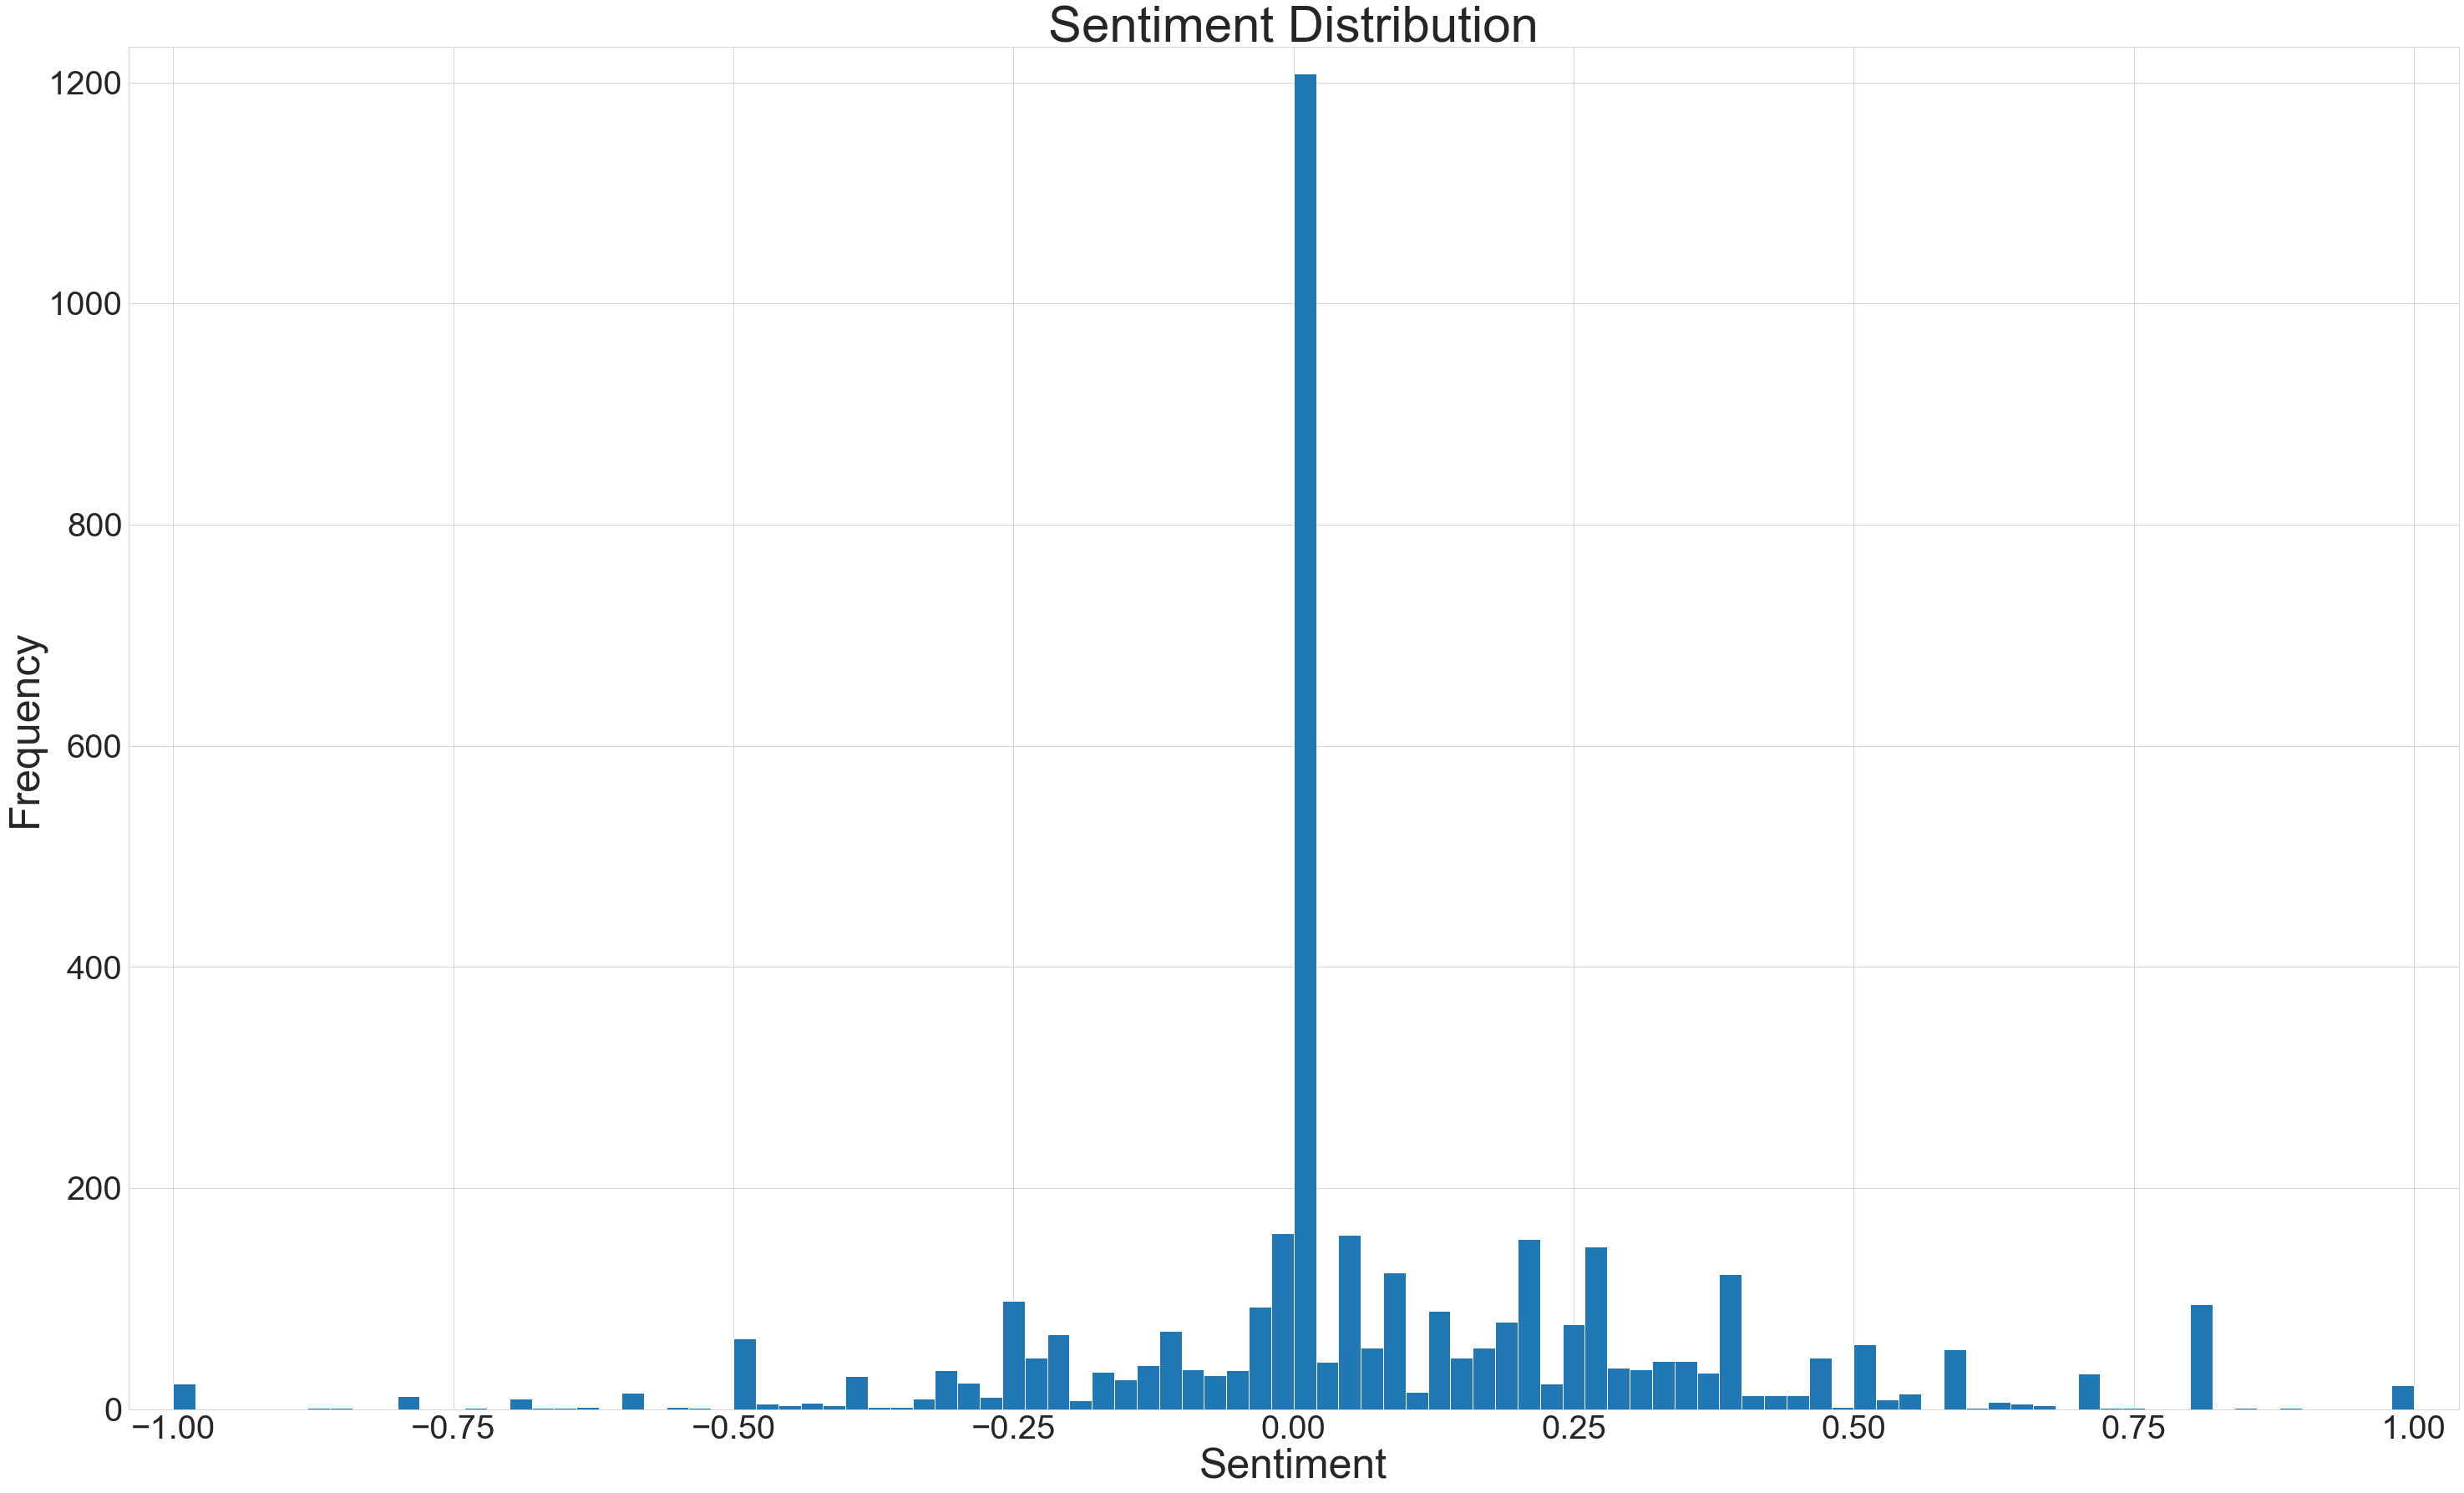

In [17]:
labeled_ctweets_df = ctweets_df[:4002]

plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(labeled_ctweets_df['sentiment'], bins=100)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

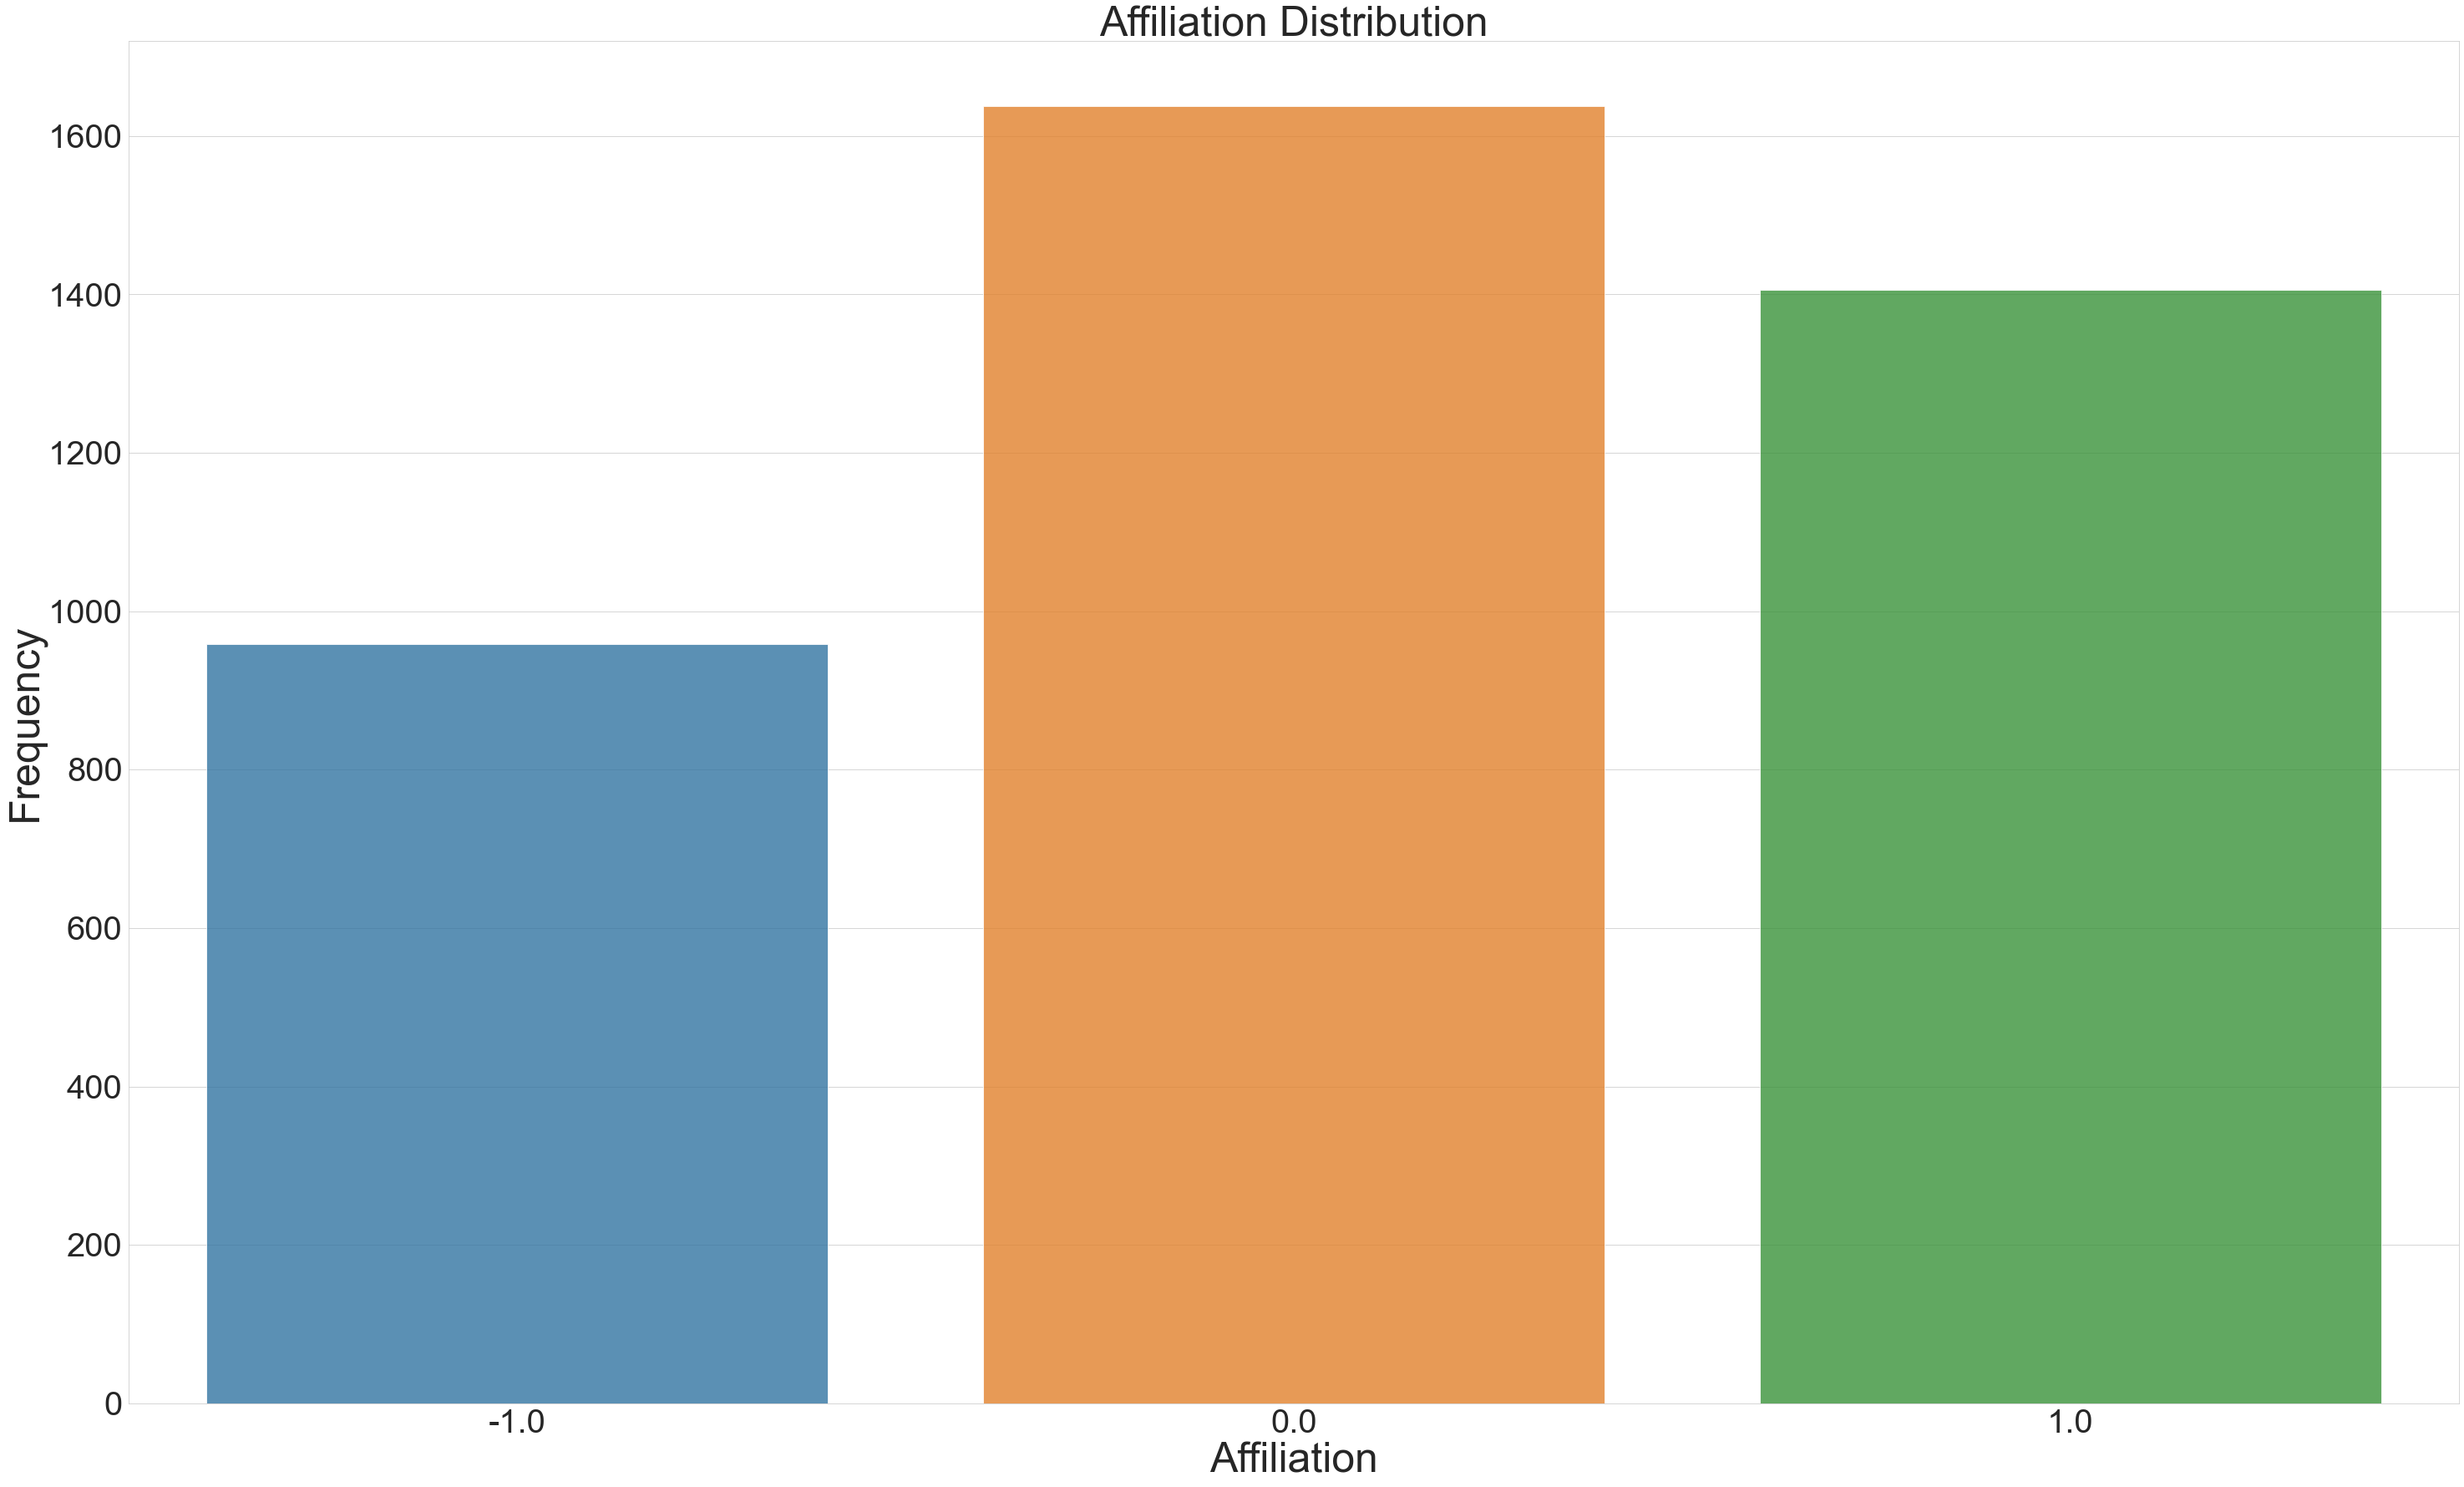

In [18]:
x_affiliation = labeled_ctweets_df.Affiliation.value_counts()
y_affiliation = x_affiliation.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x_affiliation.index, x_affiliation.values, alpha=0.8)
plt.title("Affiliation Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Affiliation', fontsize=50)
plt.xticks(fontsize=40)

In [19]:
# Here we can see the sentiment analysis seems to match the affiliation: with a slight skew towards support for
# Trump, we see a slight skew towards positive sentiment. This doesn't mean the tweets in support of Trump are
# moreso positive than those in support of Biden, but it's possible. Both also show that the overwhelming
# majority of tweets have neutral affiliation and neutral sentiment.

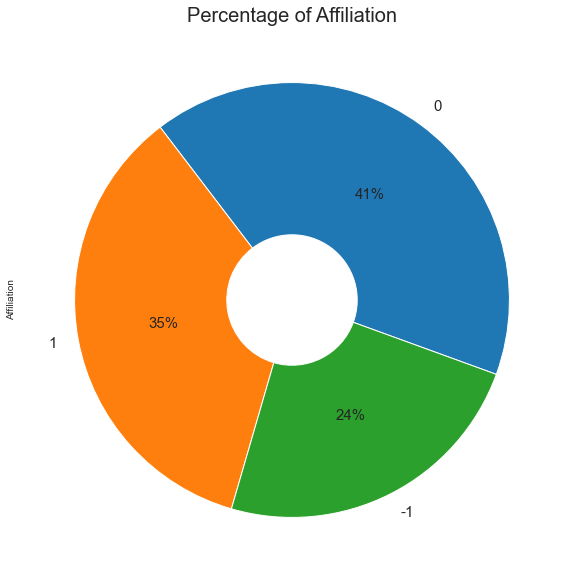

In [20]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Affiliation', fontsize=20)
labeled_ctweets_df.Affiliation.value_counts().plot(kind='pie', labels=['0','1','-1'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

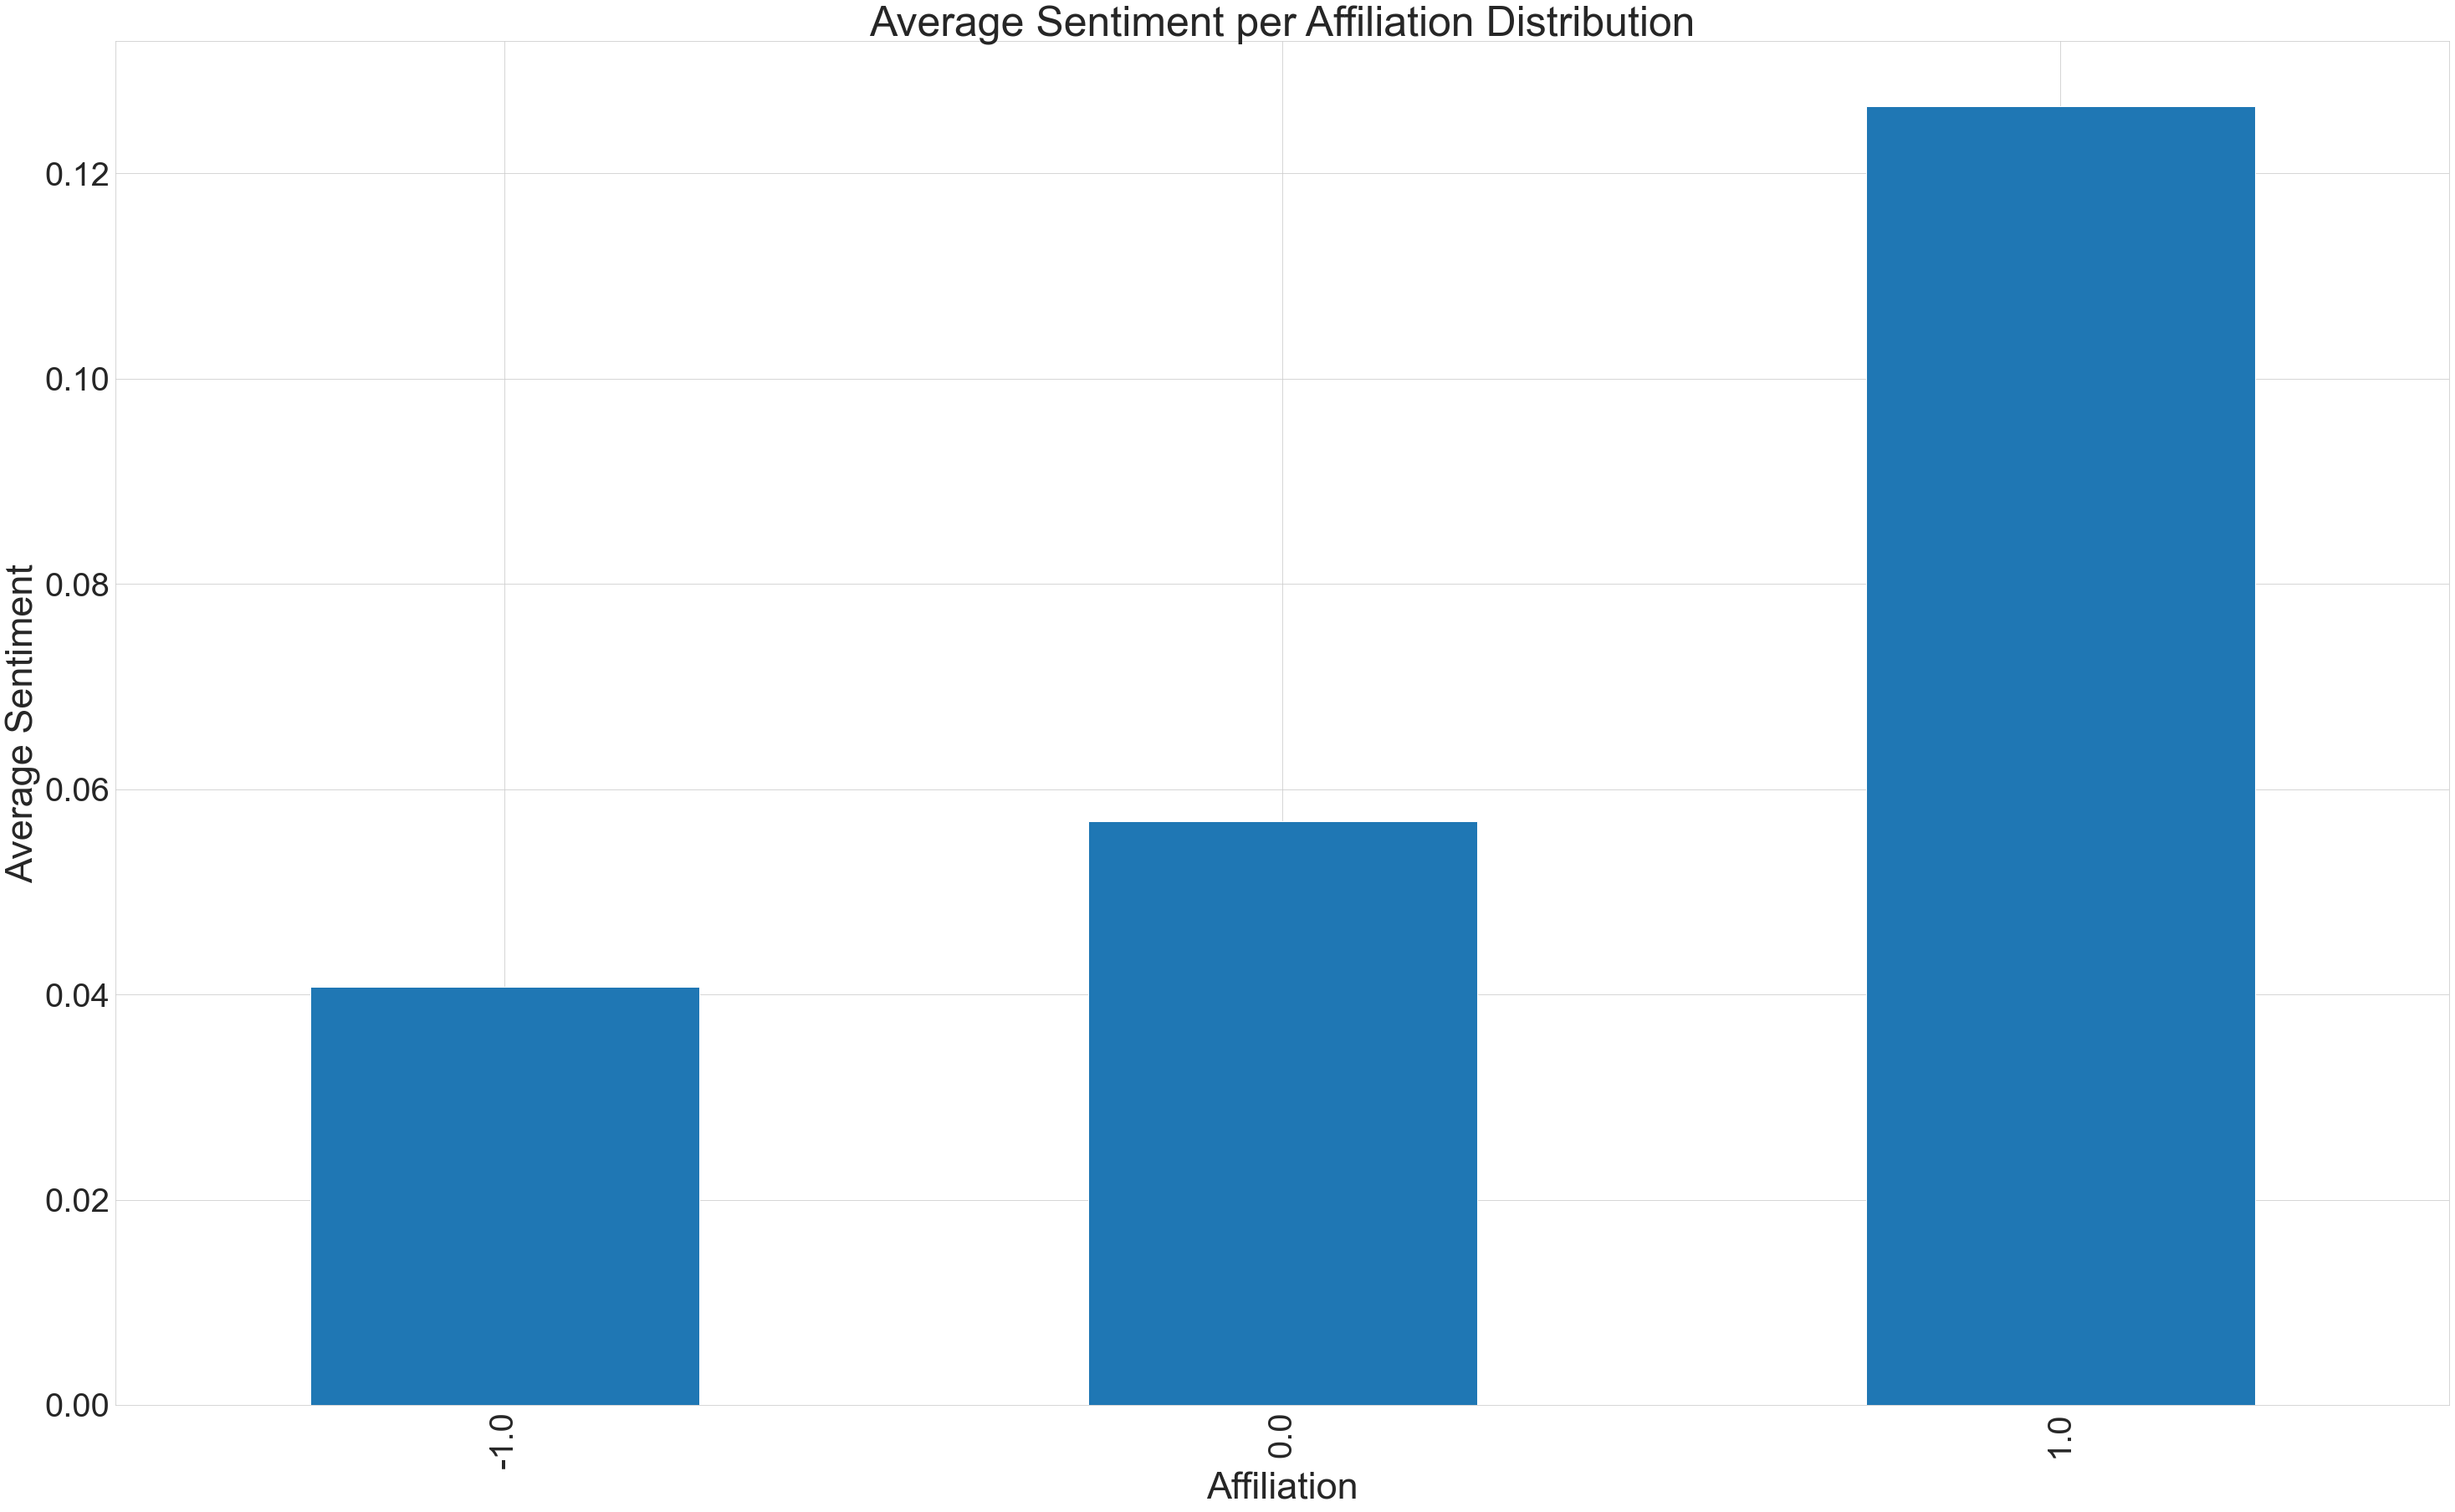

In [21]:
polarity_avg = labeled_ctweets_df.groupby('Affiliation')['sentiment'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Affiliation', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Affiliation Distribution', fontsize=50)
plt.show()

In [22]:
# Here we see that actually, being in support of Trump does result in a slightly higher sentiment. And being in
# support of Biden also results in a slightly lower sentiment than having no affiliation.
# I believe this is due to the fact that the average tweet in support of Trump focuses on his positives (i.e., is
# in support of Trump rather than bashing Biden) while the average tweet in support of Biden focuses on Trump's
# negatives (i.e., is bashing Trump rather than directly supporting Biden).

In [23]:
ctweets_df['word_count'] = ctweets_df['lemmatized'].apply(lambda x: len(str(x).split()))
ctweets_df['tweet_len'] = ctweets_df['lemma_str'].astype(str).apply(len)
ctweets_df.head()

id                      created_at    screen_name  \
0  1325981321957675008  Tue Nov 10 01:59:17 +0000 2020  LimaCharlie88   
1  1325981321991217153  Tue Nov 10 01:59:17 +0000 2020  TurnItRed2020   
2  1325981321760530432  Tue Nov 10 01:59:17 +0000 2020    DeansherryS   
3  1325981322054021120  Tue Nov 10 01:59:17 +0000 2020       JJDianeM   
4  1325981322062430208  Tue Nov 10 01:59:17 +0000 2020  justbeyou_100   

                                          lemmatized  Affiliation  \
0  [point, take, biden, election, fairly, convinc...         -1.0   
1  [white, liberal, go, black, city, find, black,...          1.0   
2  [trump's, election, challenge, continue, campa...         -1.0   
3  [six, jones, day, lawyer, say, give, small, nu...         -1.0   
4  [try, best, david, actually, relieve, happy, g...          0.0   

                                           lemma_str  sentiment  word_count  \
0      point take biden election fairly convincingly   0.500000           6   
1  white liberal go black city find black folk st...  -0.095238          28   
2  trump's election challenge continue campaign a...   0.000000           9   
3  six jones day lawyer say give small number lat...  -0.027778          24   
4  try best david actually relieve happy get sooo...   0.539286          15   

   tweet_len  
0         45  
1        173  
2         67  
3        168  
4         88

In [24]:
# reset this since we've added new columns to ctweets_df:
labeled_ctweets_df = ctweets_df[:4002]

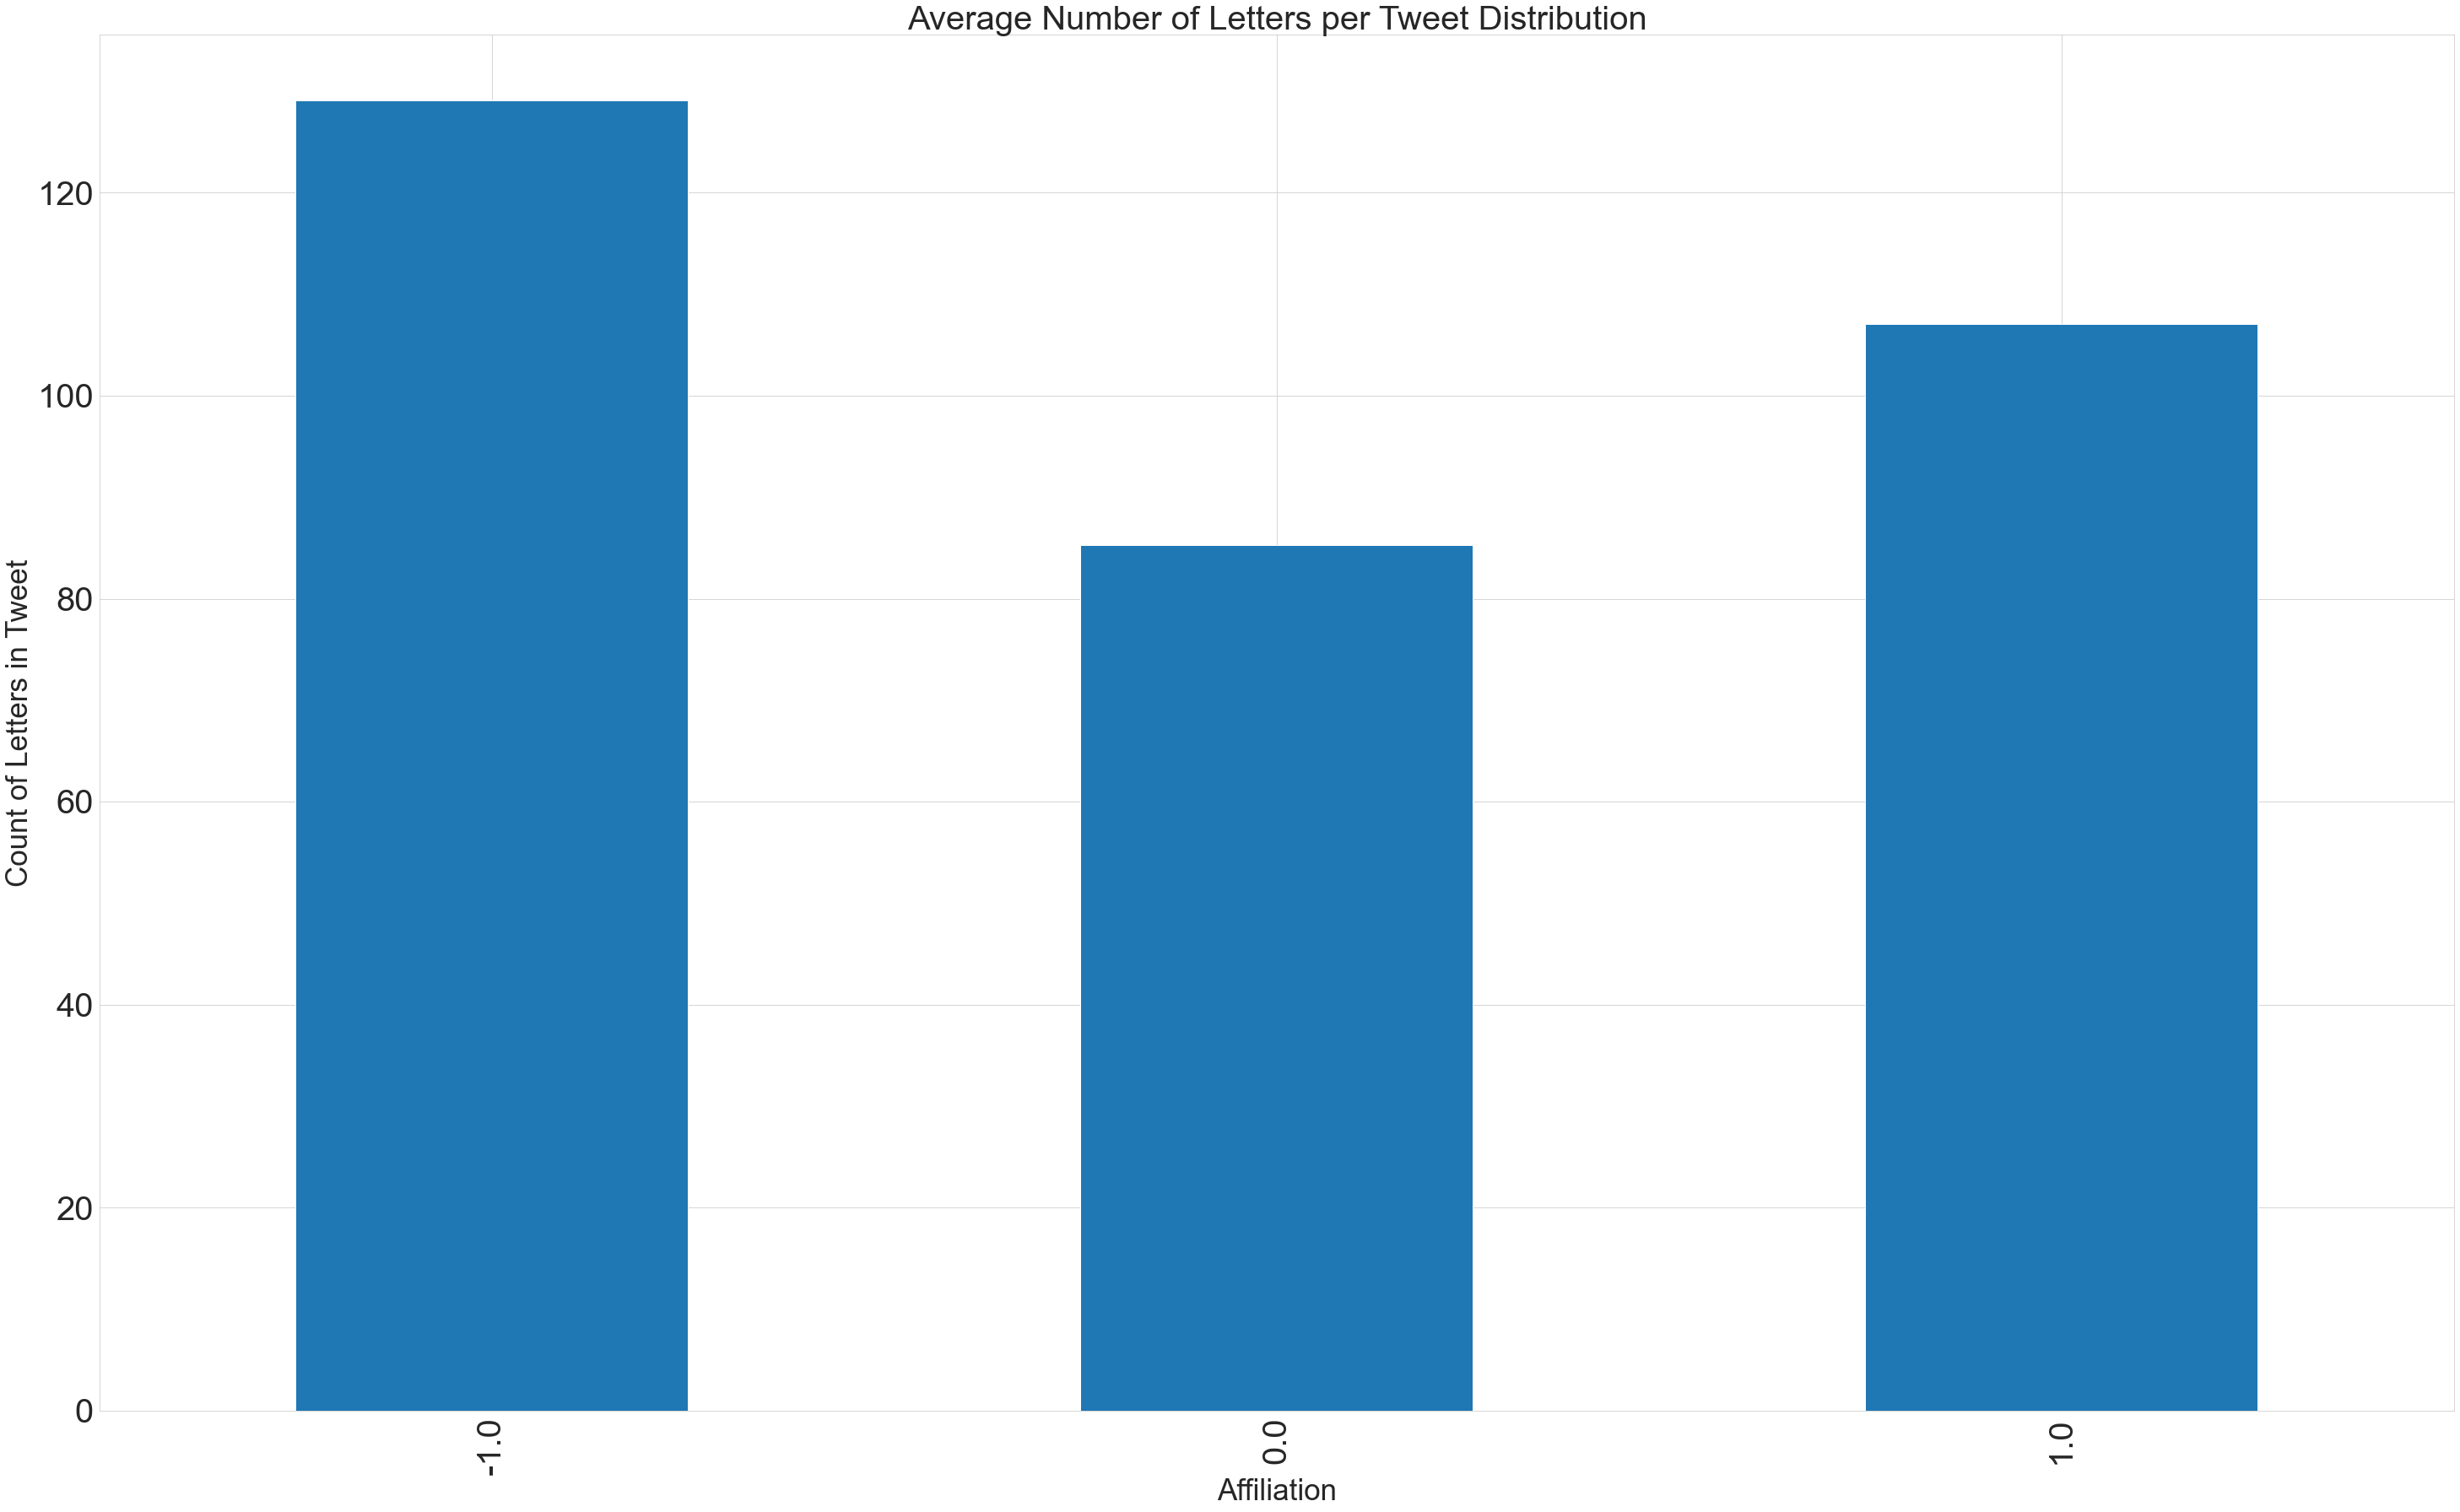

In [25]:
letter_avg = labeled_ctweets_df.groupby('Affiliation')['tweet_len'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Affiliation', fontsize=35)
plt.ylabel('Count of Letters in Tweet', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters per Tweet Distribution', fontsize=40)
plt.show()

In [26]:
# Again, this seems to echo the earlier results about sentiment. Affiliation with Biden (score of -1) seems to
# be tied to being negative about Trump, and negative thoughts probably go into more detail than positive ones.
# I'm not sure why the unaffiliated tweets would average so much lower in average # of letters than the other two.


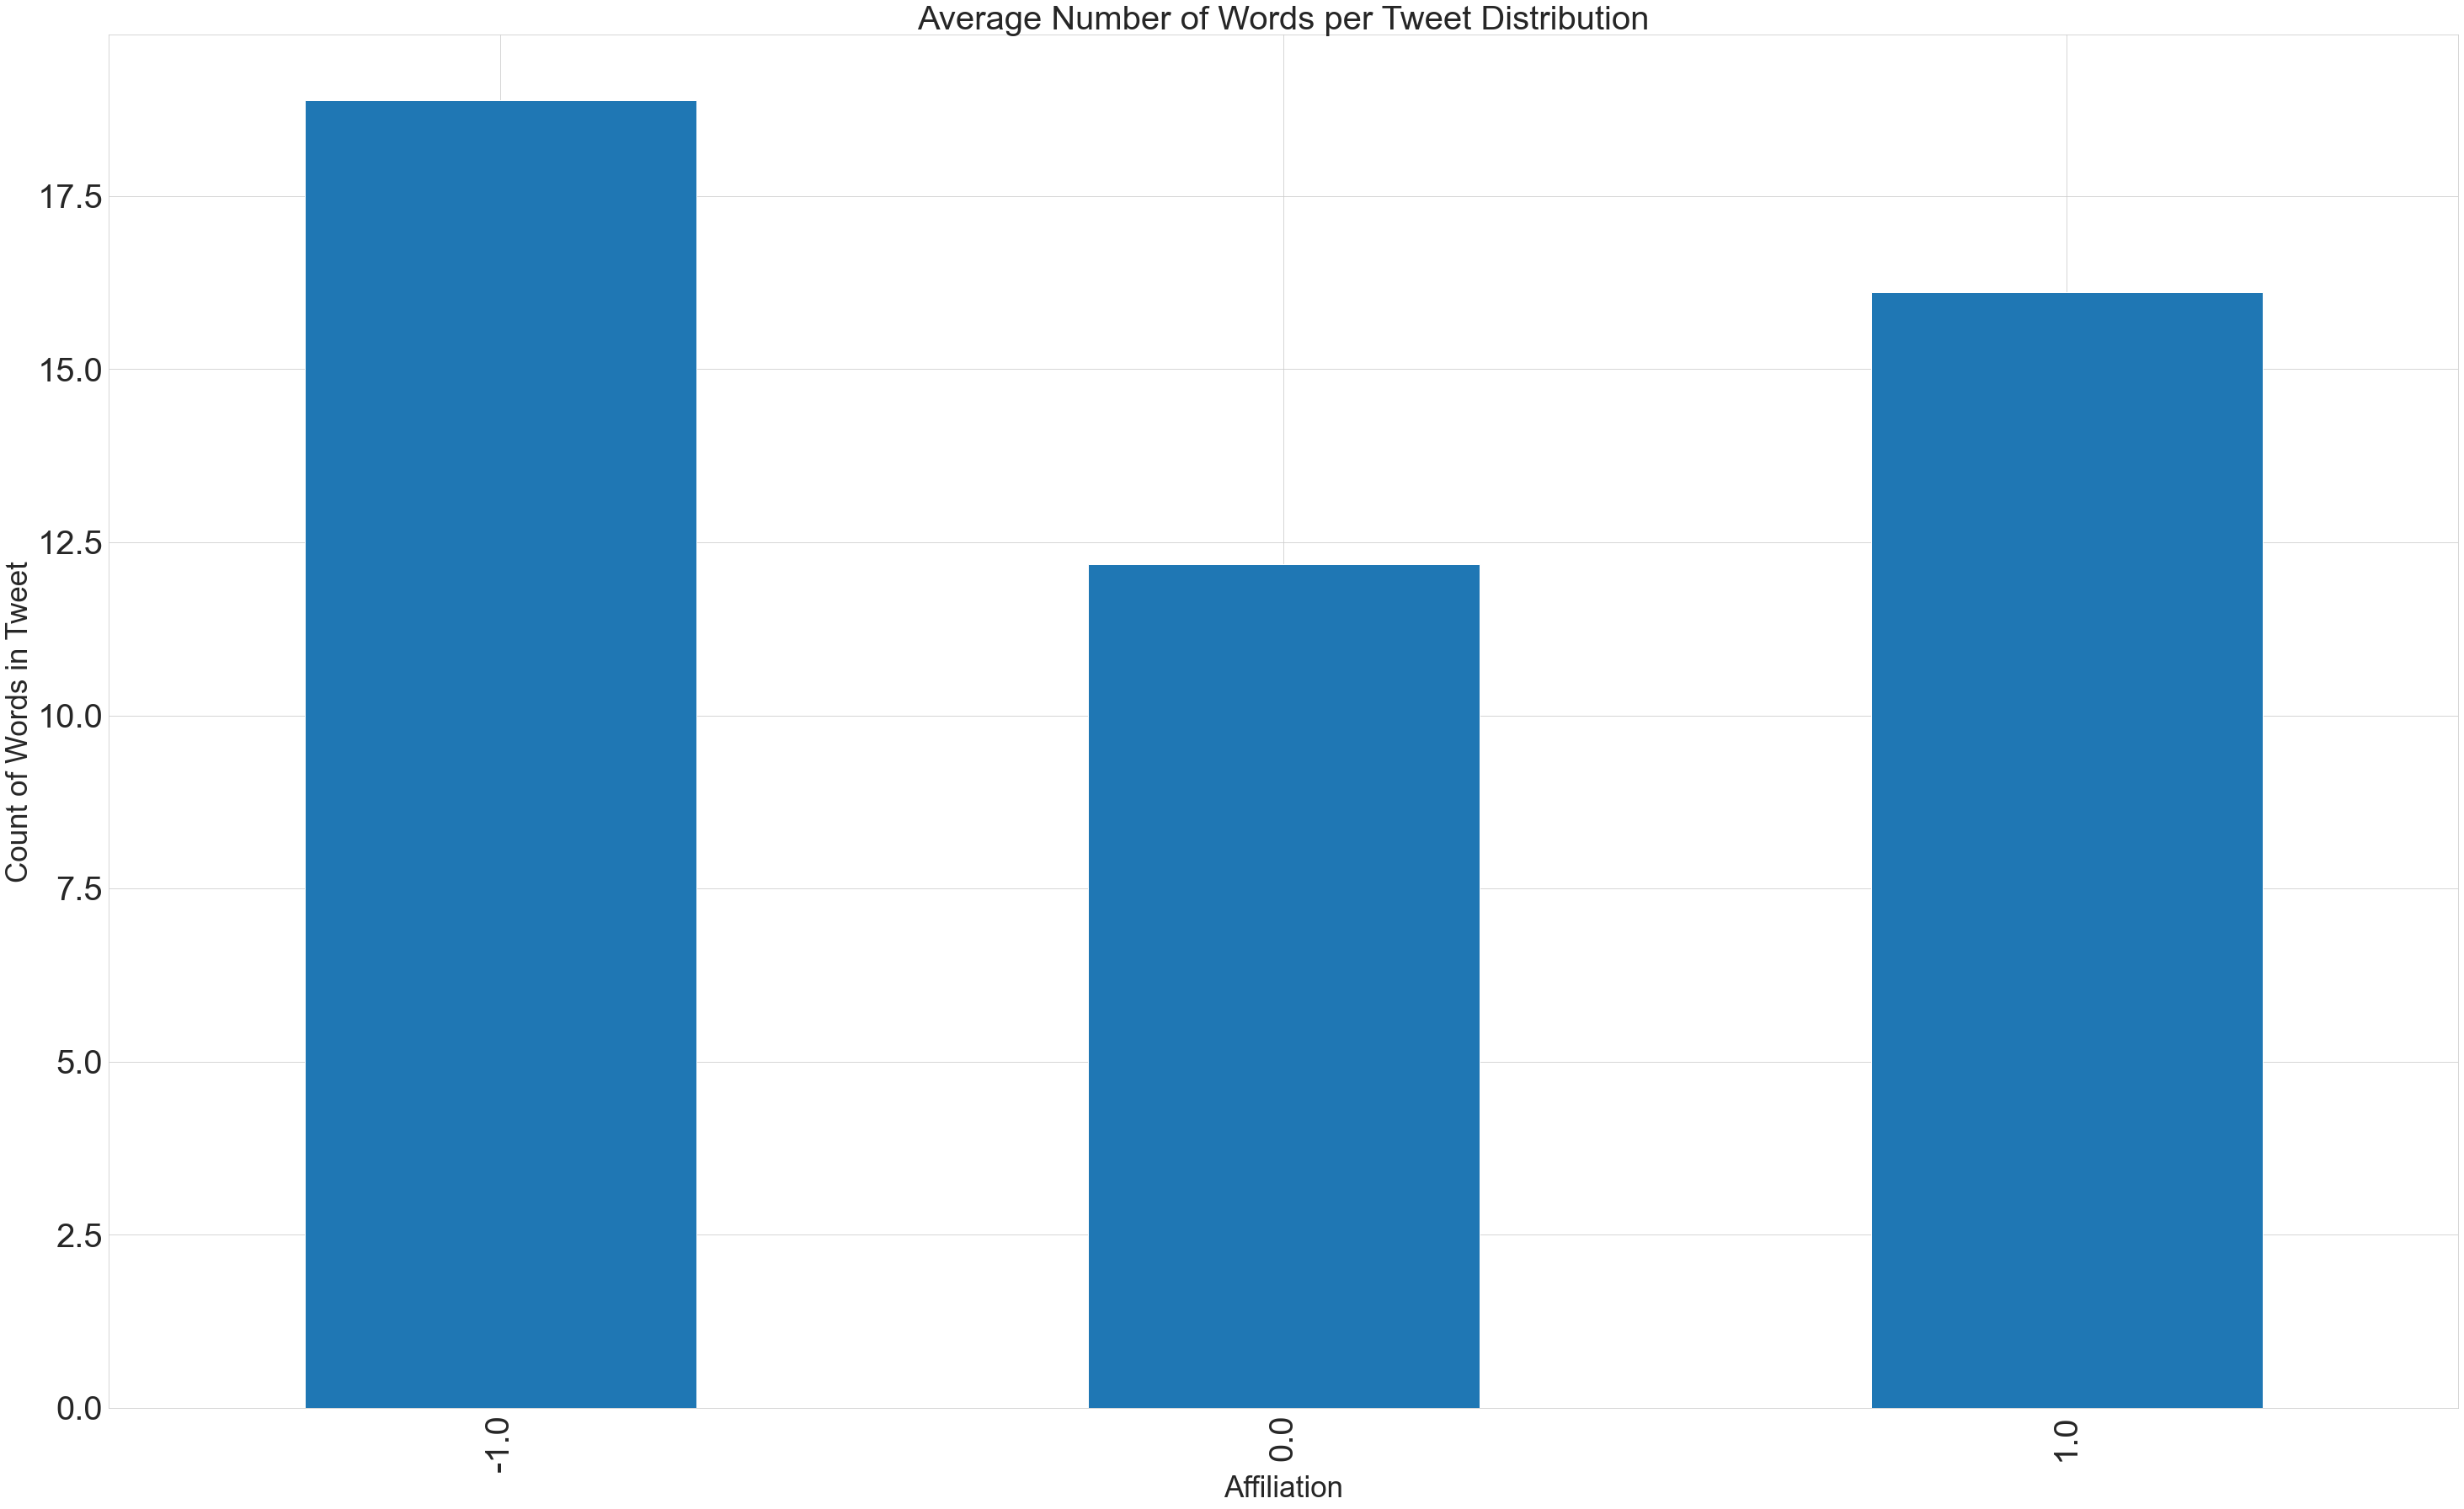

In [27]:
word_avg = labeled_ctweets_df.groupby('Affiliation')['word_count'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Affiliation', fontsize=35)
plt.ylabel('Count of Words in Tweet', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Words per Tweet Distribution', fontsize=40)
plt.show()

In [28]:
# These results echo the above results about average number of letters per tweet.

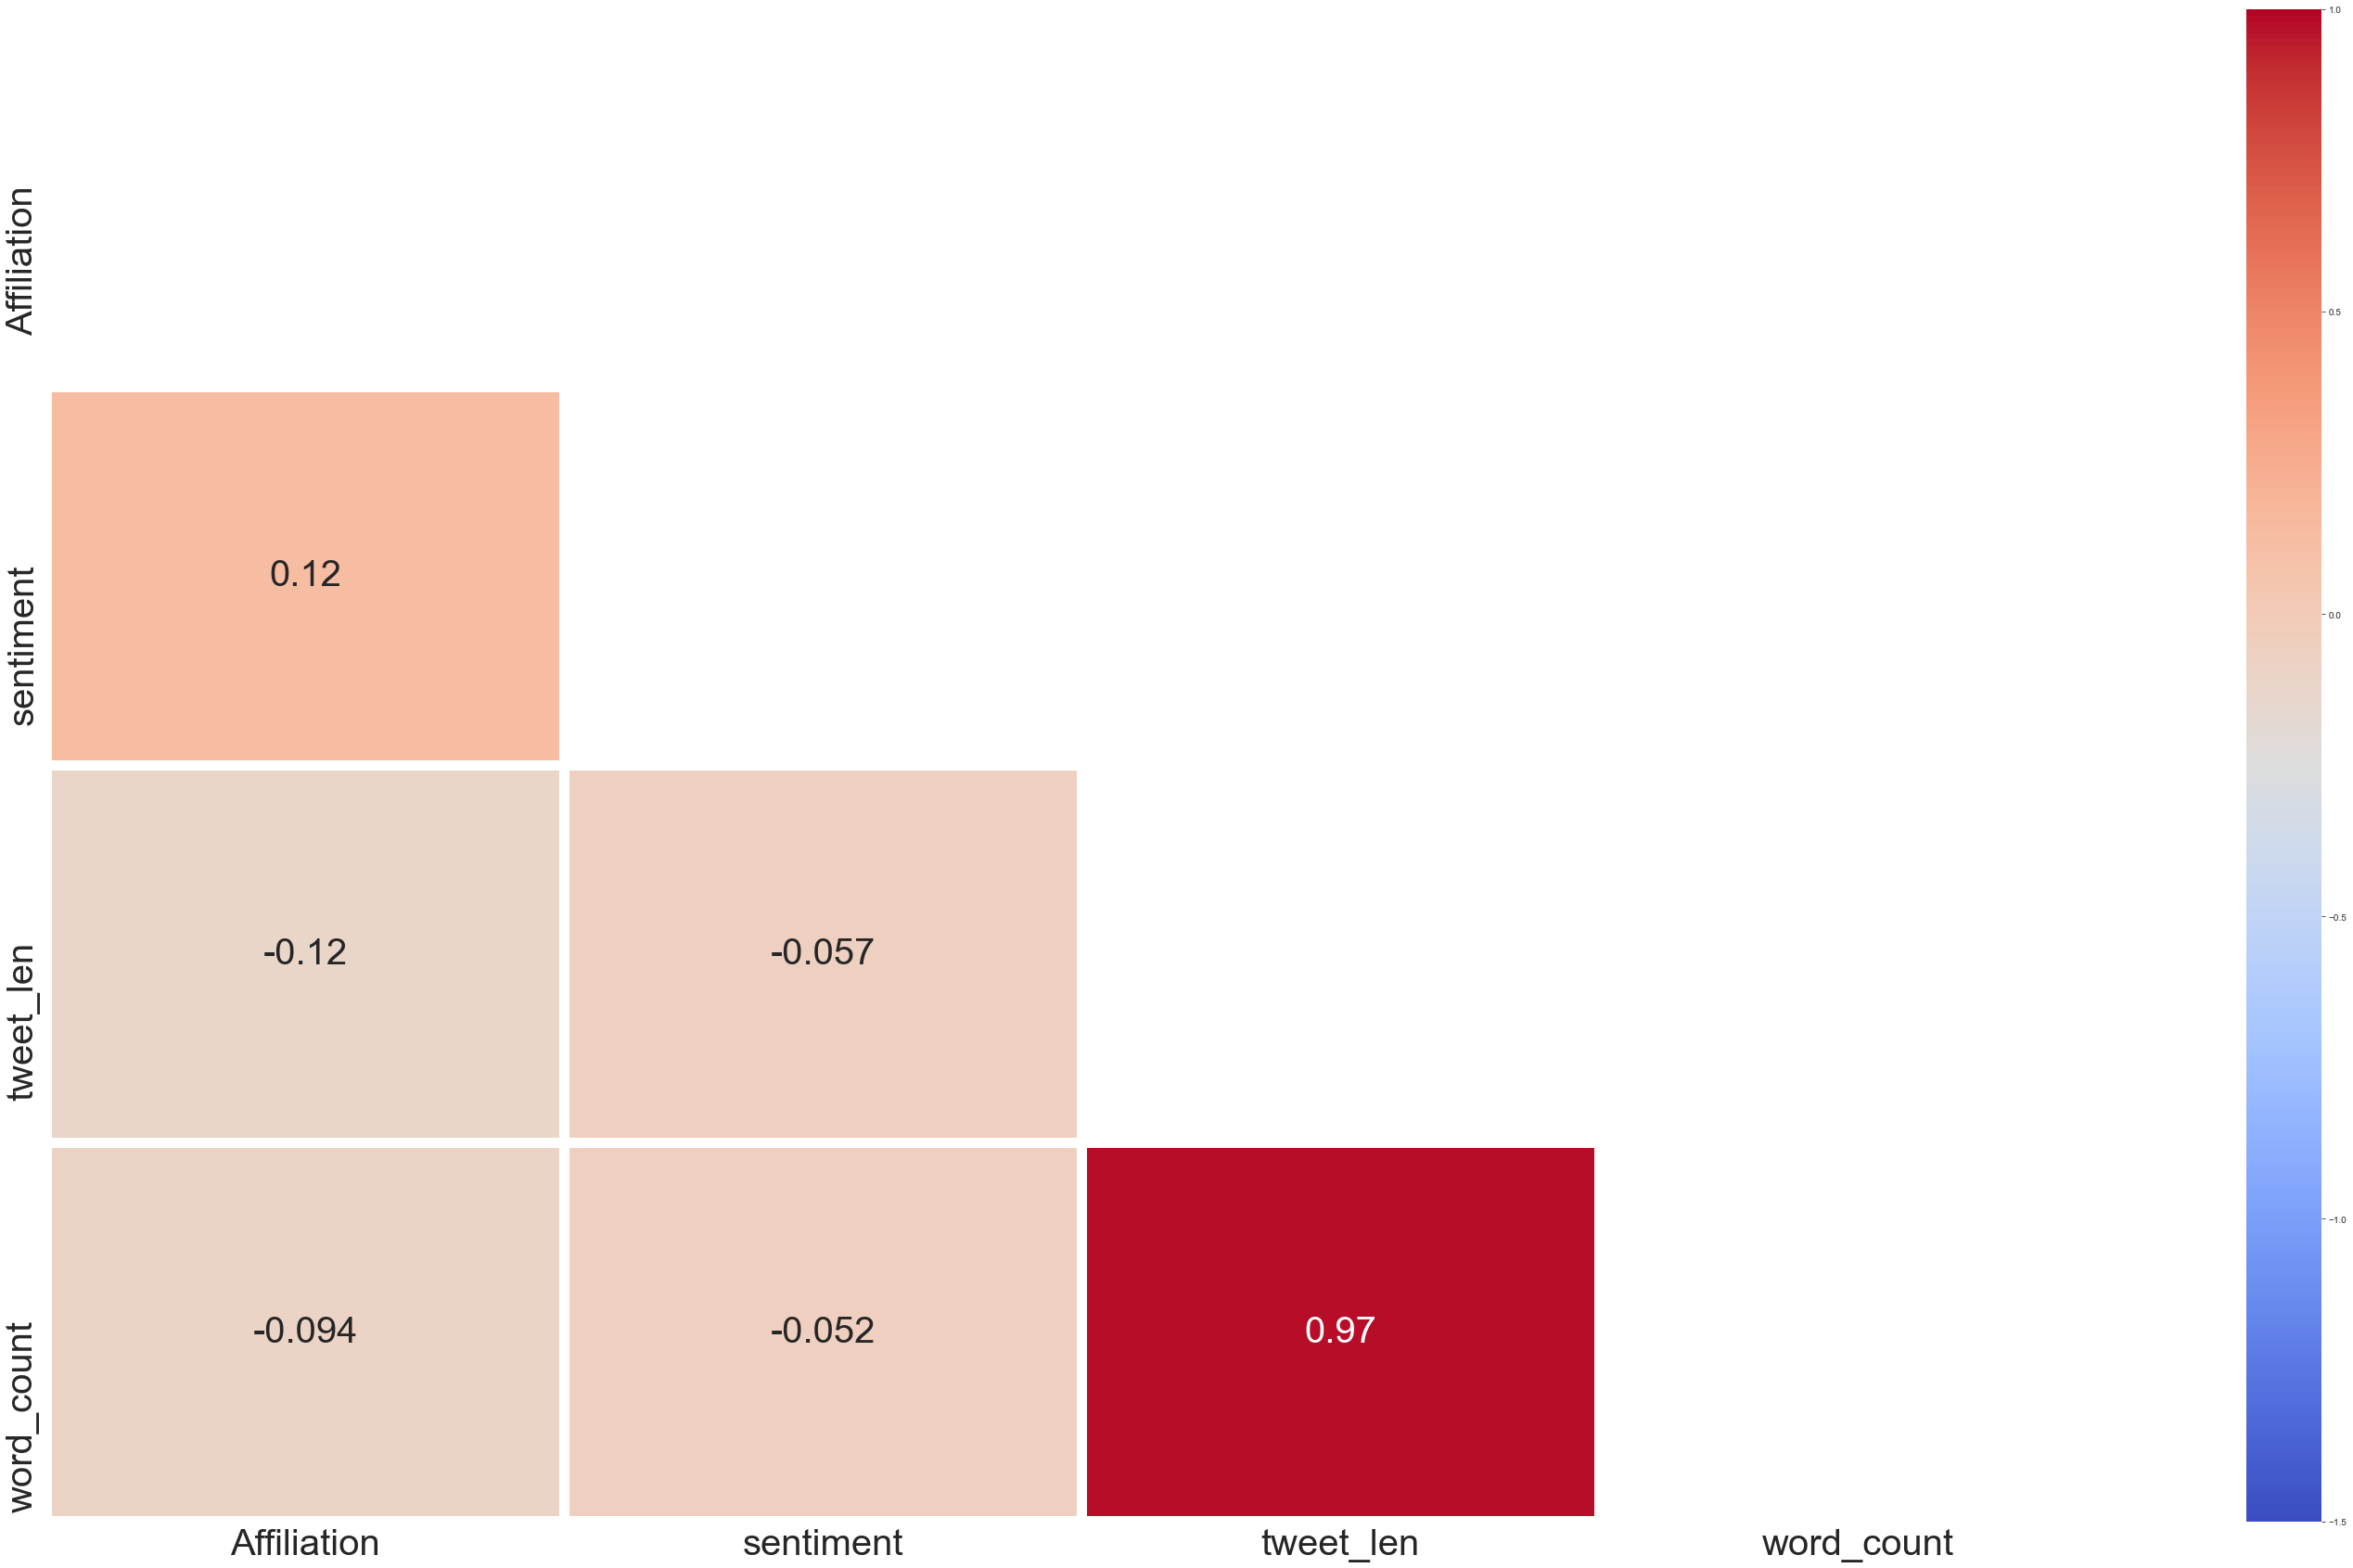

In [29]:
correlation = labeled_ctweets_df[['Affiliation','sentiment', 'tweet_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,30))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)

In [30]:
# The above negative correlations between Affiliation, sentiment and tweet_len, word_count prove what we guessed
# at earlier. These correlations are very small though.

In [31]:
words = ctweets_df['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist
    
print(allwords[:50])

['point', 'take', 'biden', 'election', 'fairly', 'convincingly', 'white', 'liberal', 'go', 'black', 'city', 'find', 'black', 'folk', 'struggle', 'dangle', 'carrot', 'front', 'coax', 'coached', 'steal', 'election', 'go', 'prison', 'single', 'white', 'liberal', 'show', 'defend', 'democrat', 'still', 'use', 'black', 'folk', "trump's", 'election', 'challenge', 'continue', 'campaign', 'already', 'shed', 'staff', 'via', 'six', 'jones', 'day', 'lawyer', 'say', 'give', 'small']


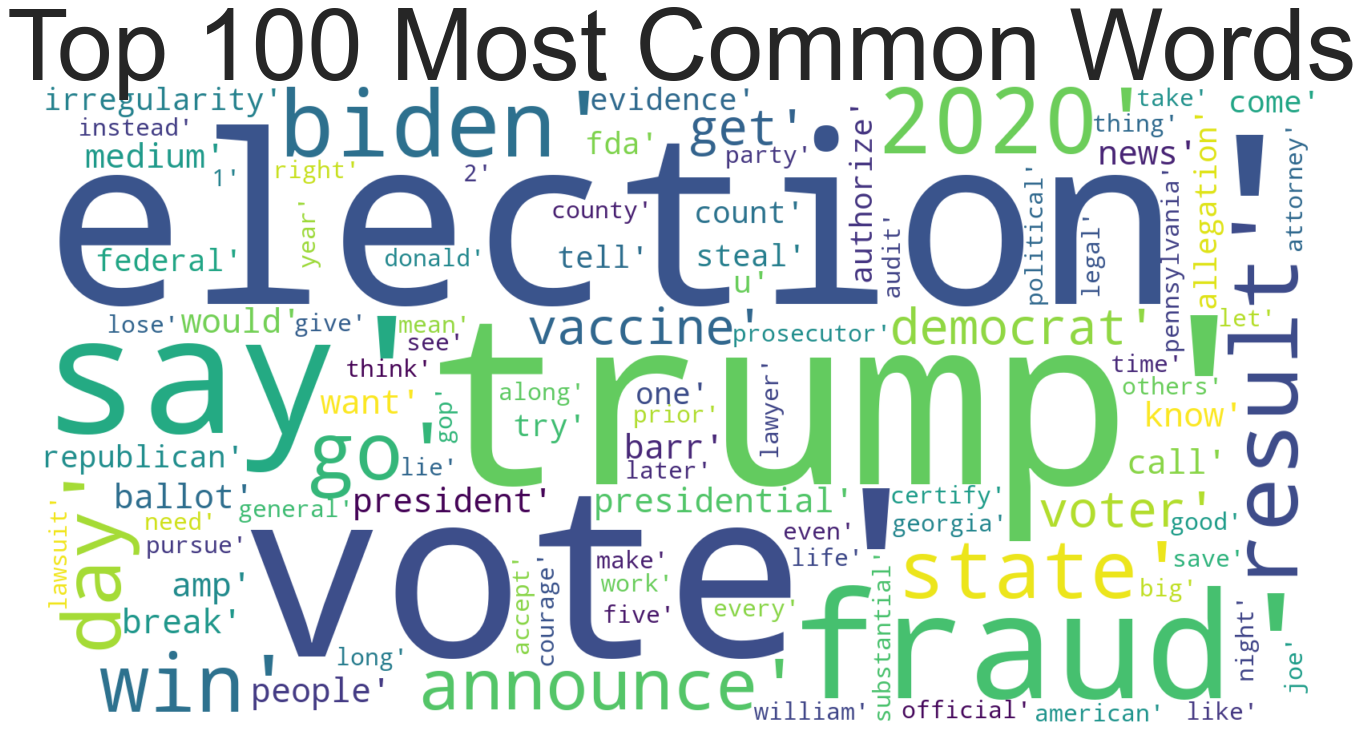

In [32]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

In [33]:
# Most of these words seem to be neutral, 'fraud', 'good', and 'steal' seem to be the only emotionally 
# charged words.

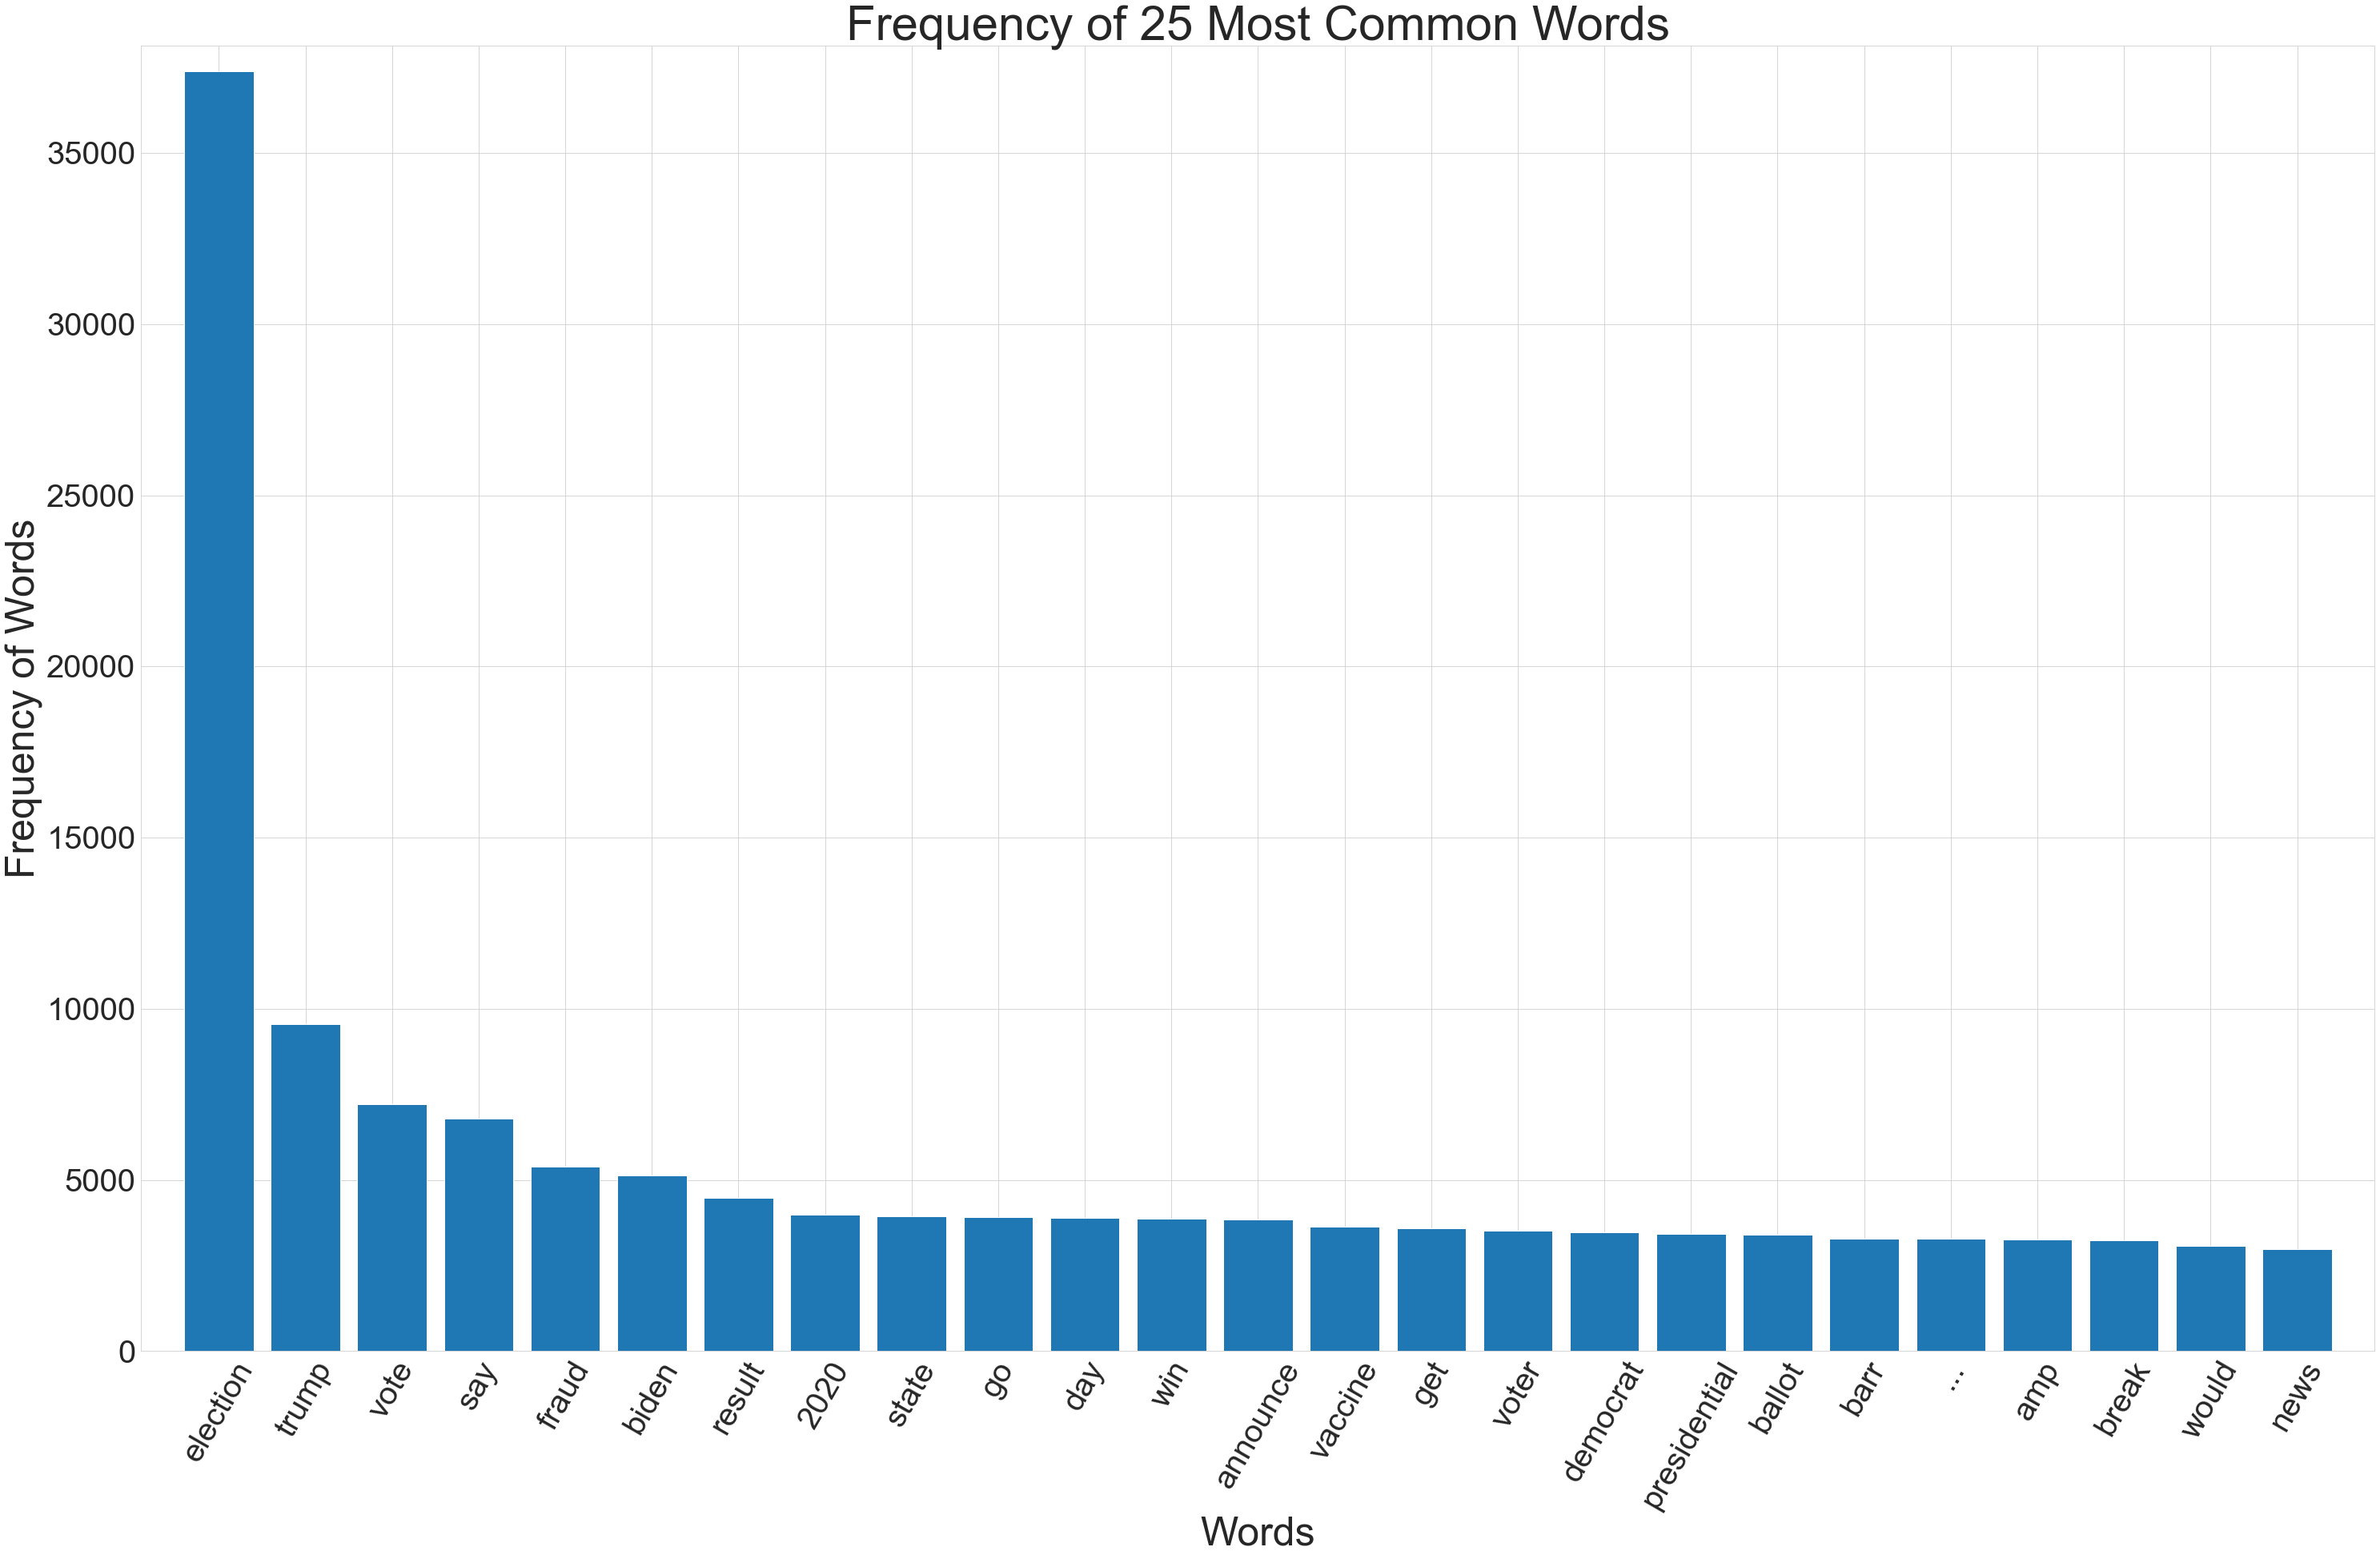

In [34]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

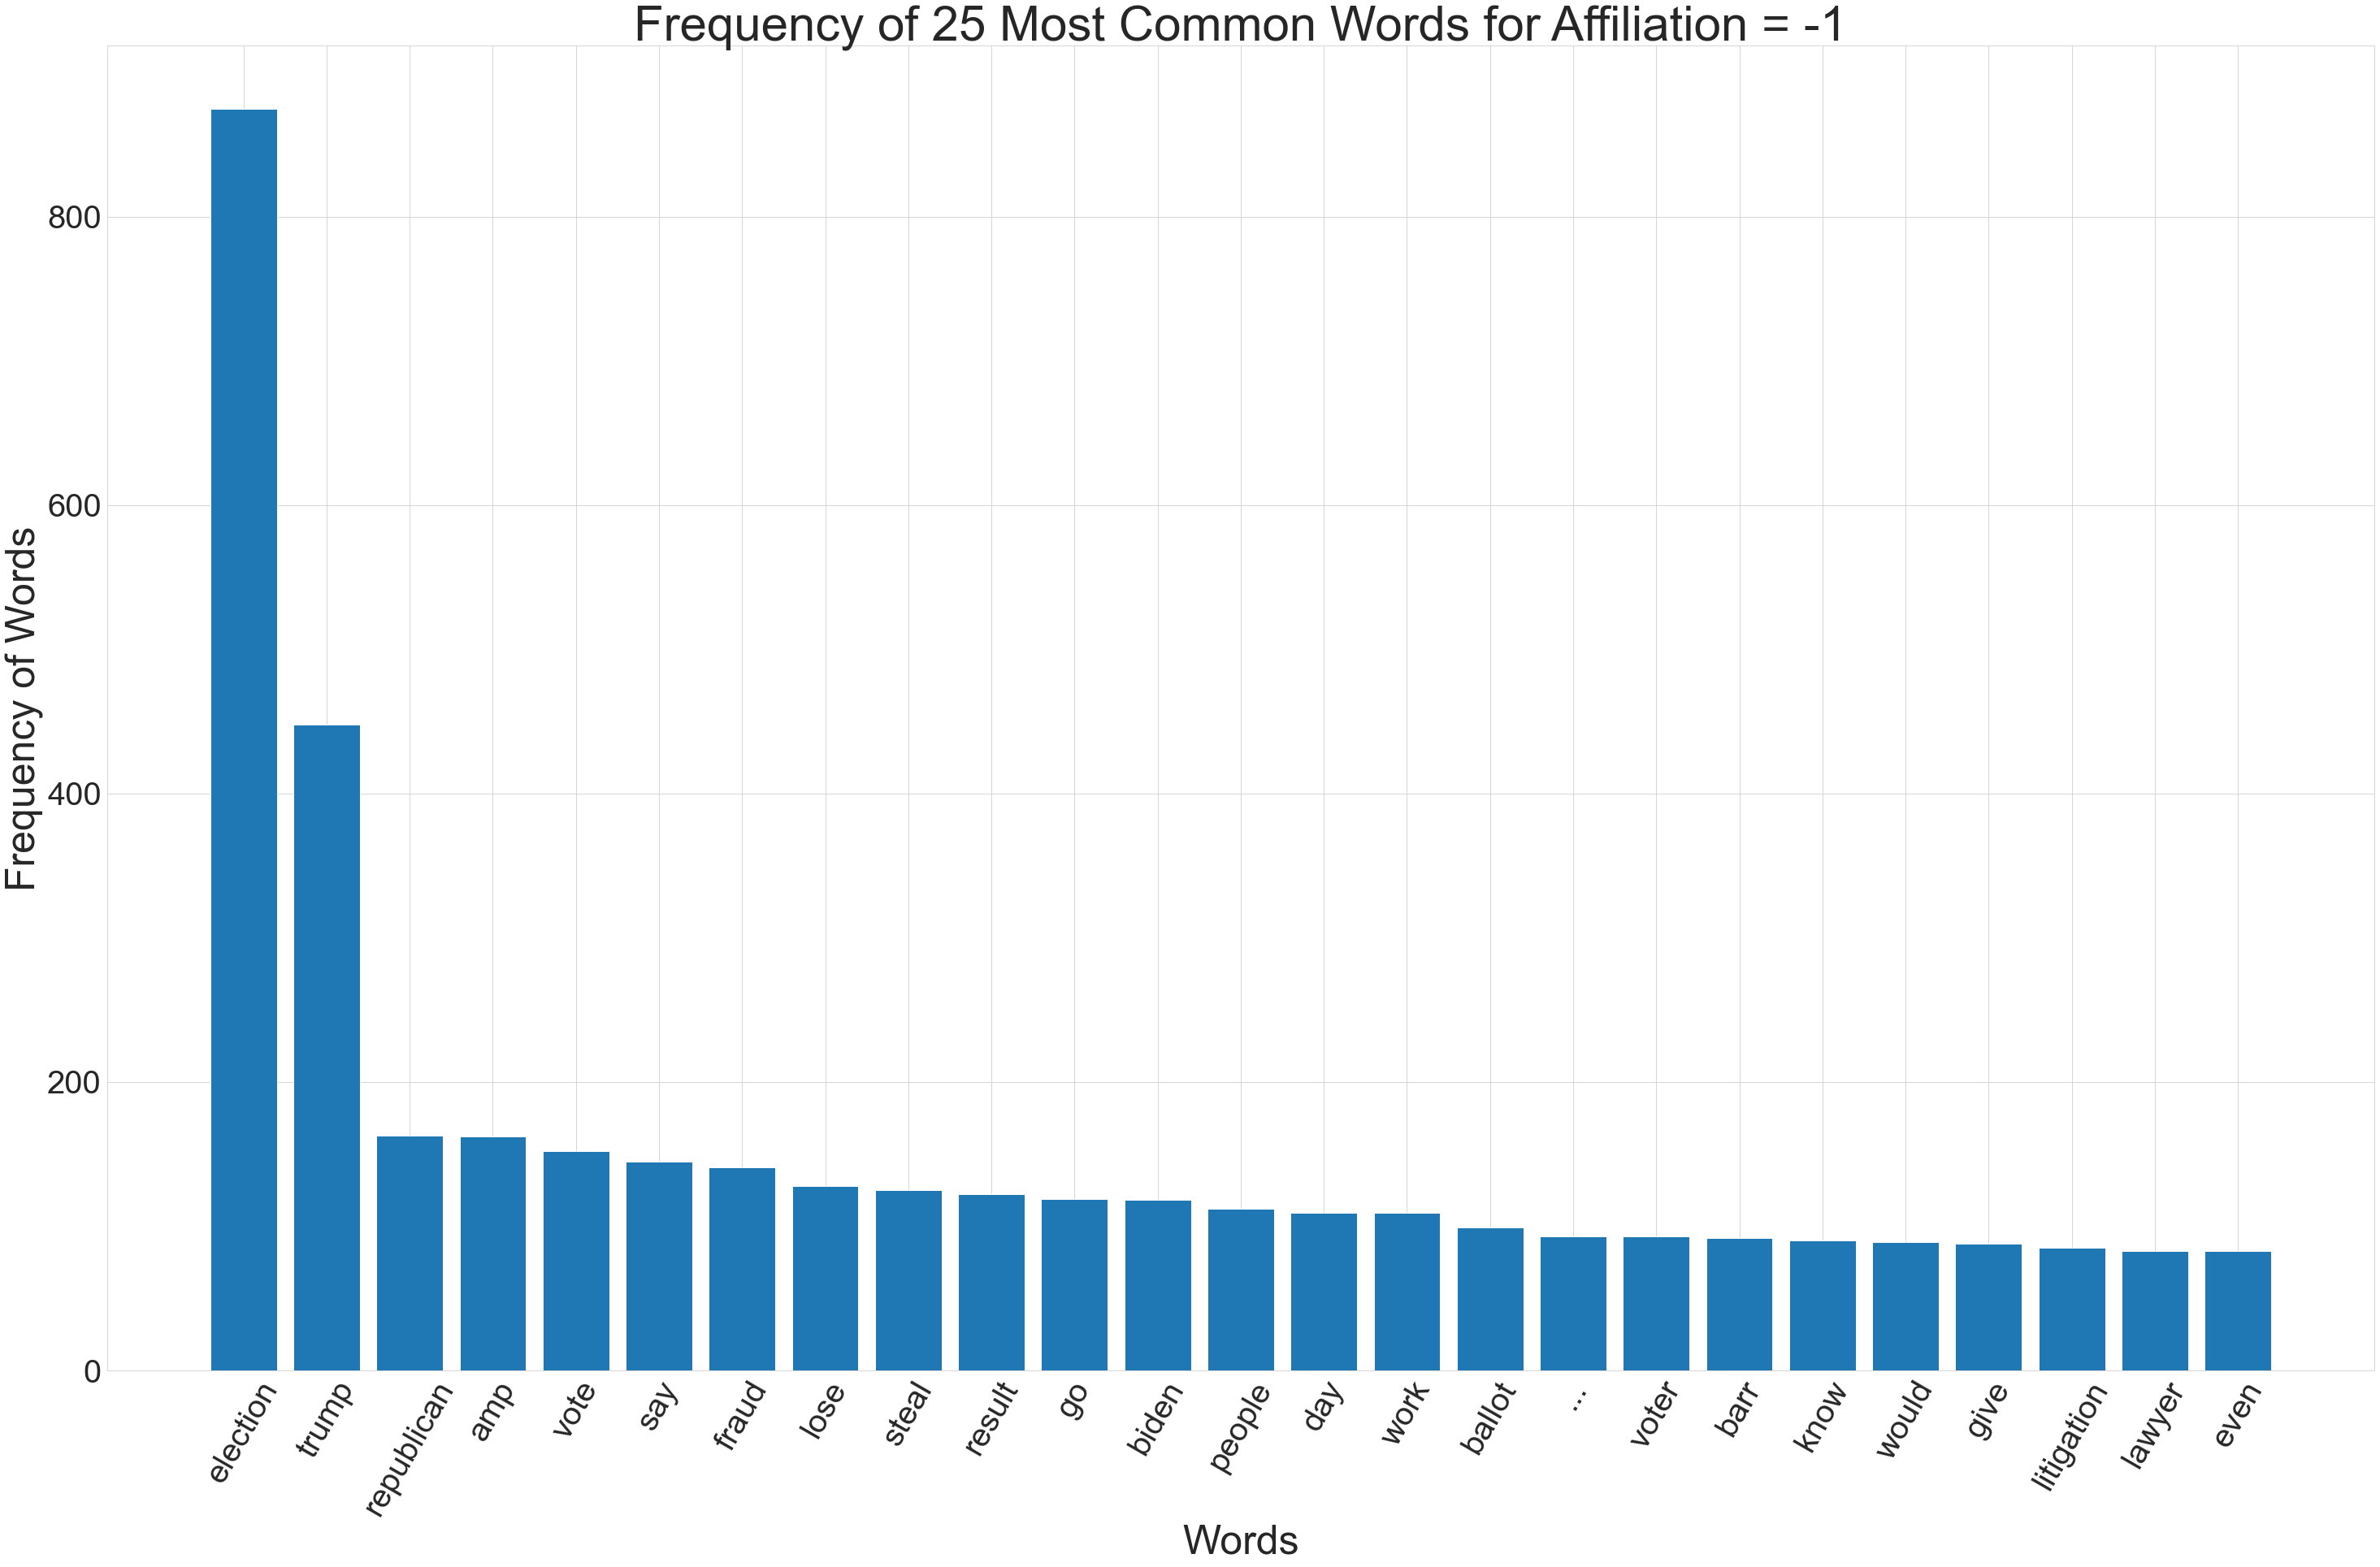

In [35]:
group_by = labeled_ctweets_df.groupby('Affiliation')['lemma_str'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
plt.figure(figsize=(50,30))
plt.bar(words0, freq0)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Affiliation = -1', fontsize=60)
plt.show()

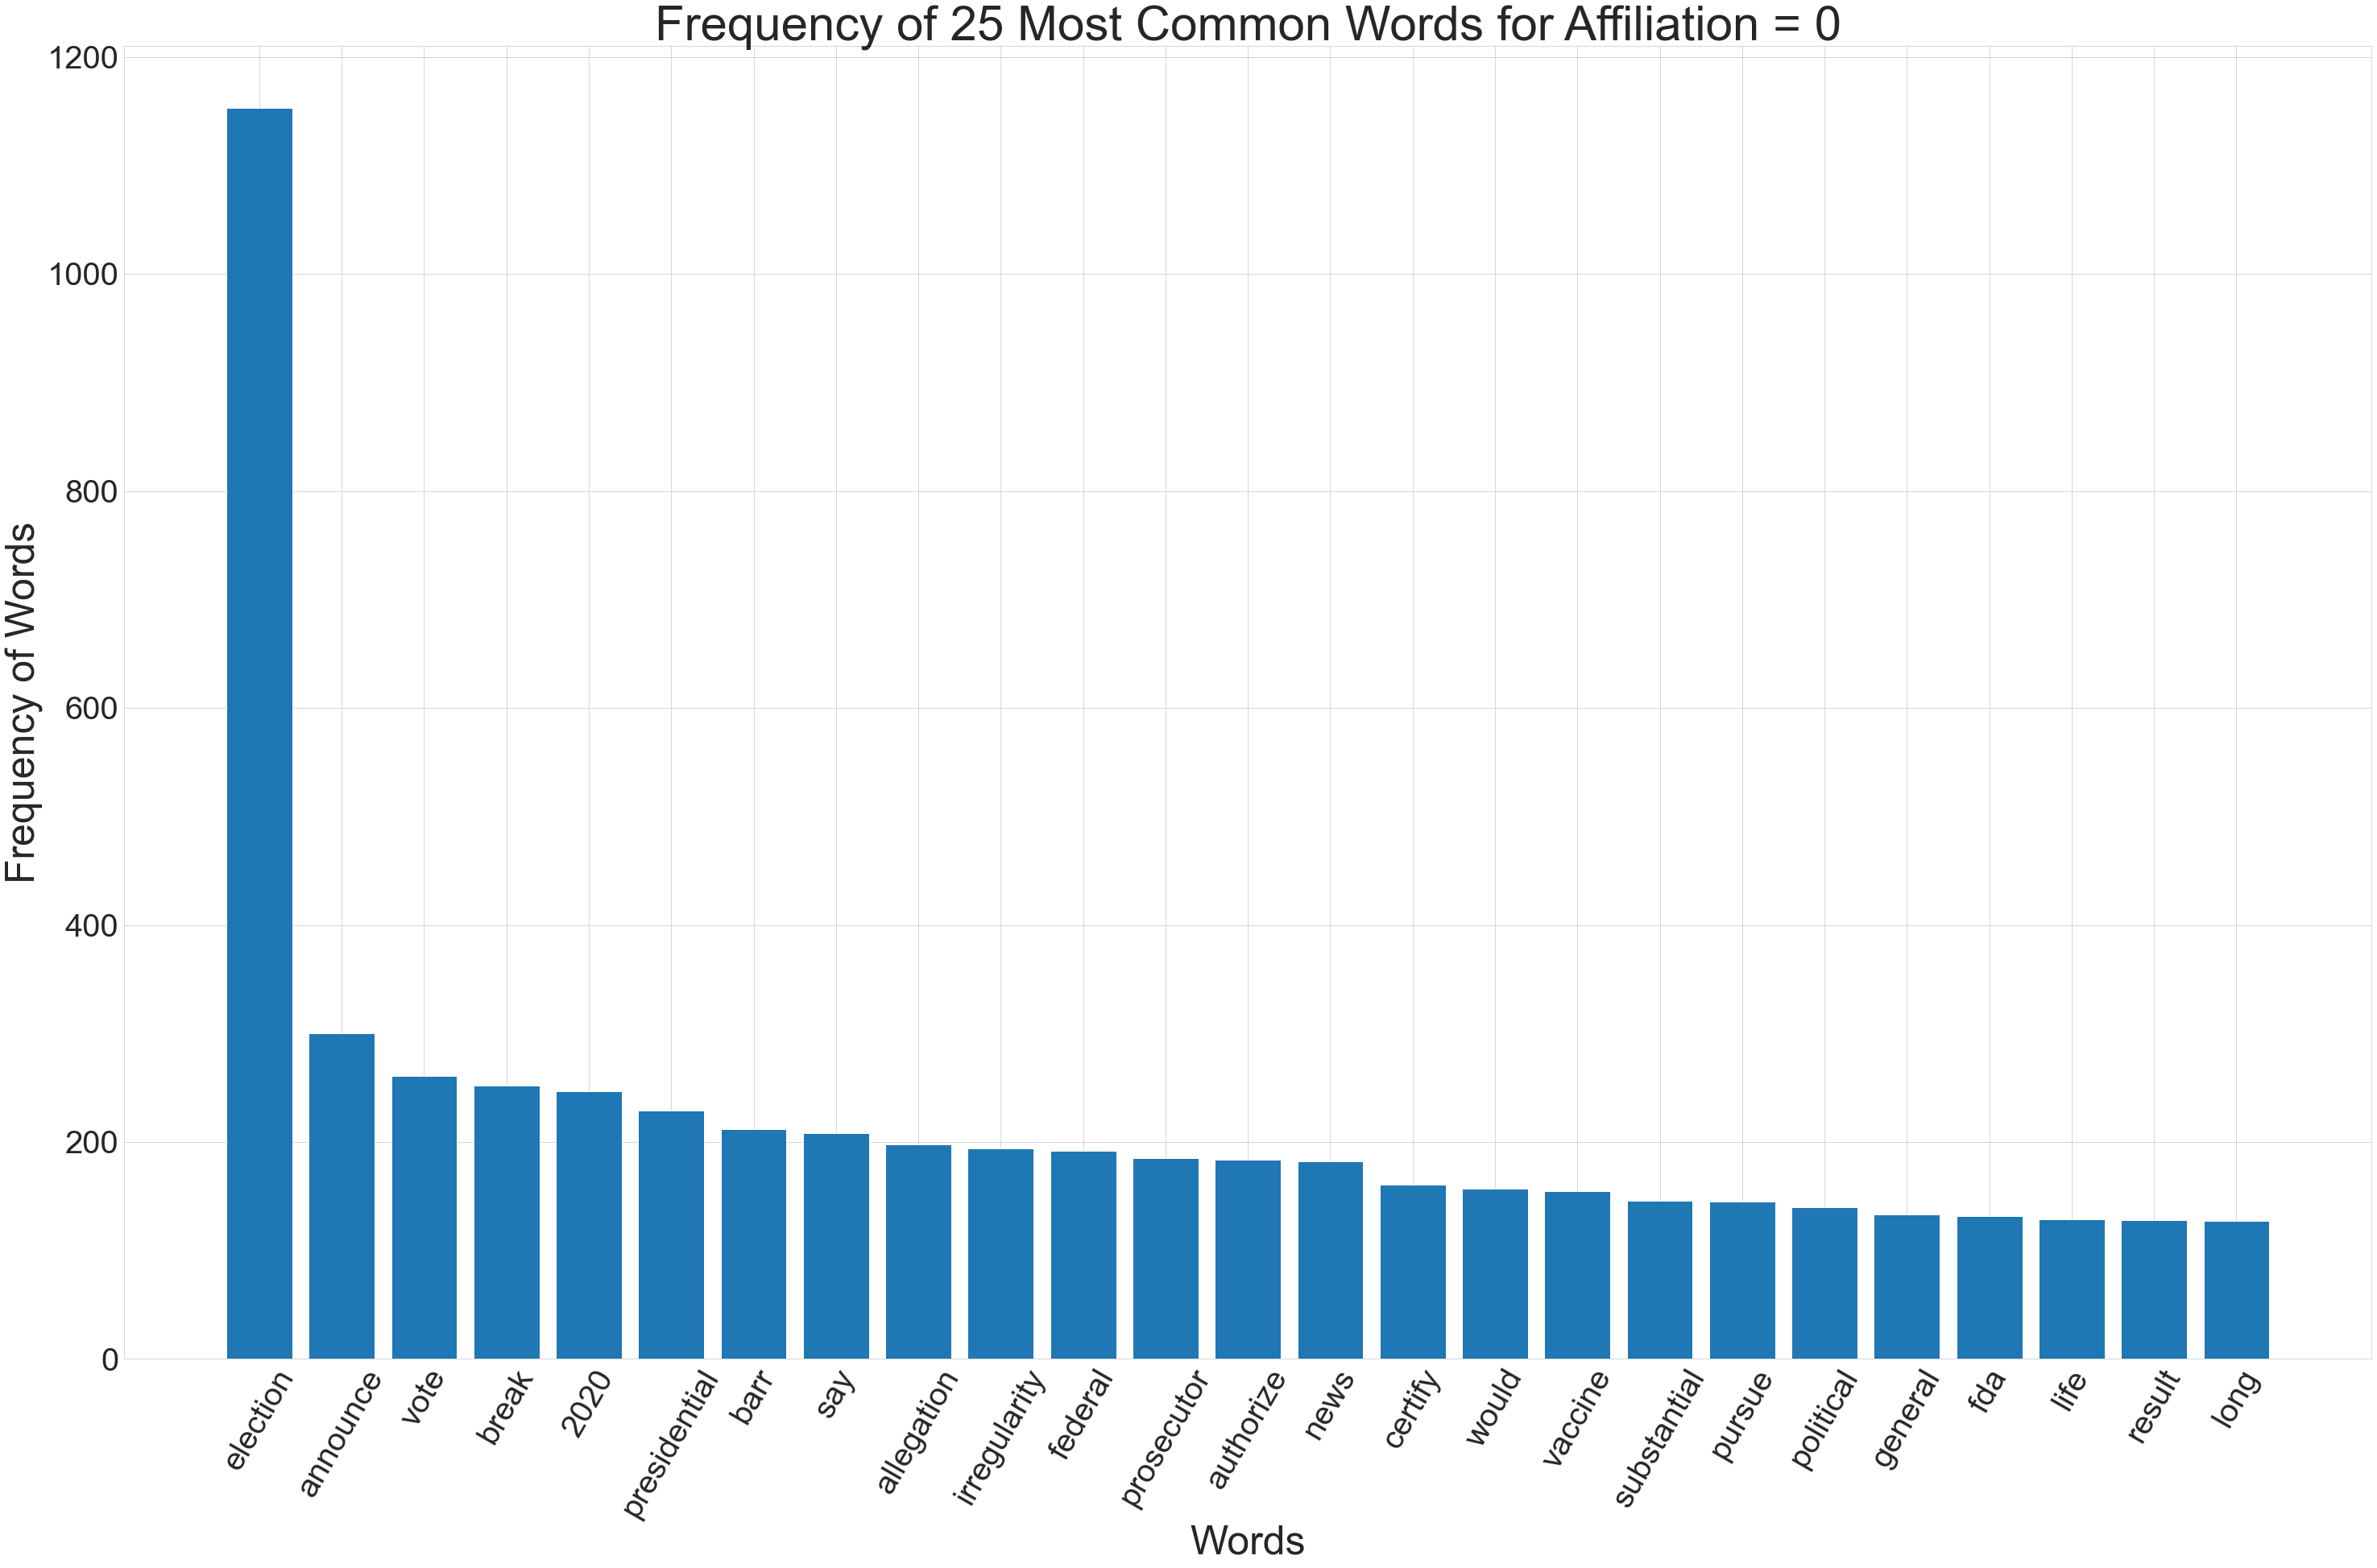

In [36]:
group_by_1 = group_by.iloc[1]
words1 = list(zip(*group_by_1))[0]
freq1 = list(zip(*group_by_1))[1]
plt.figure(figsize=(50,30))
plt.bar(words1, freq1)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Affiliation = 0', fontsize=60)
plt.show()

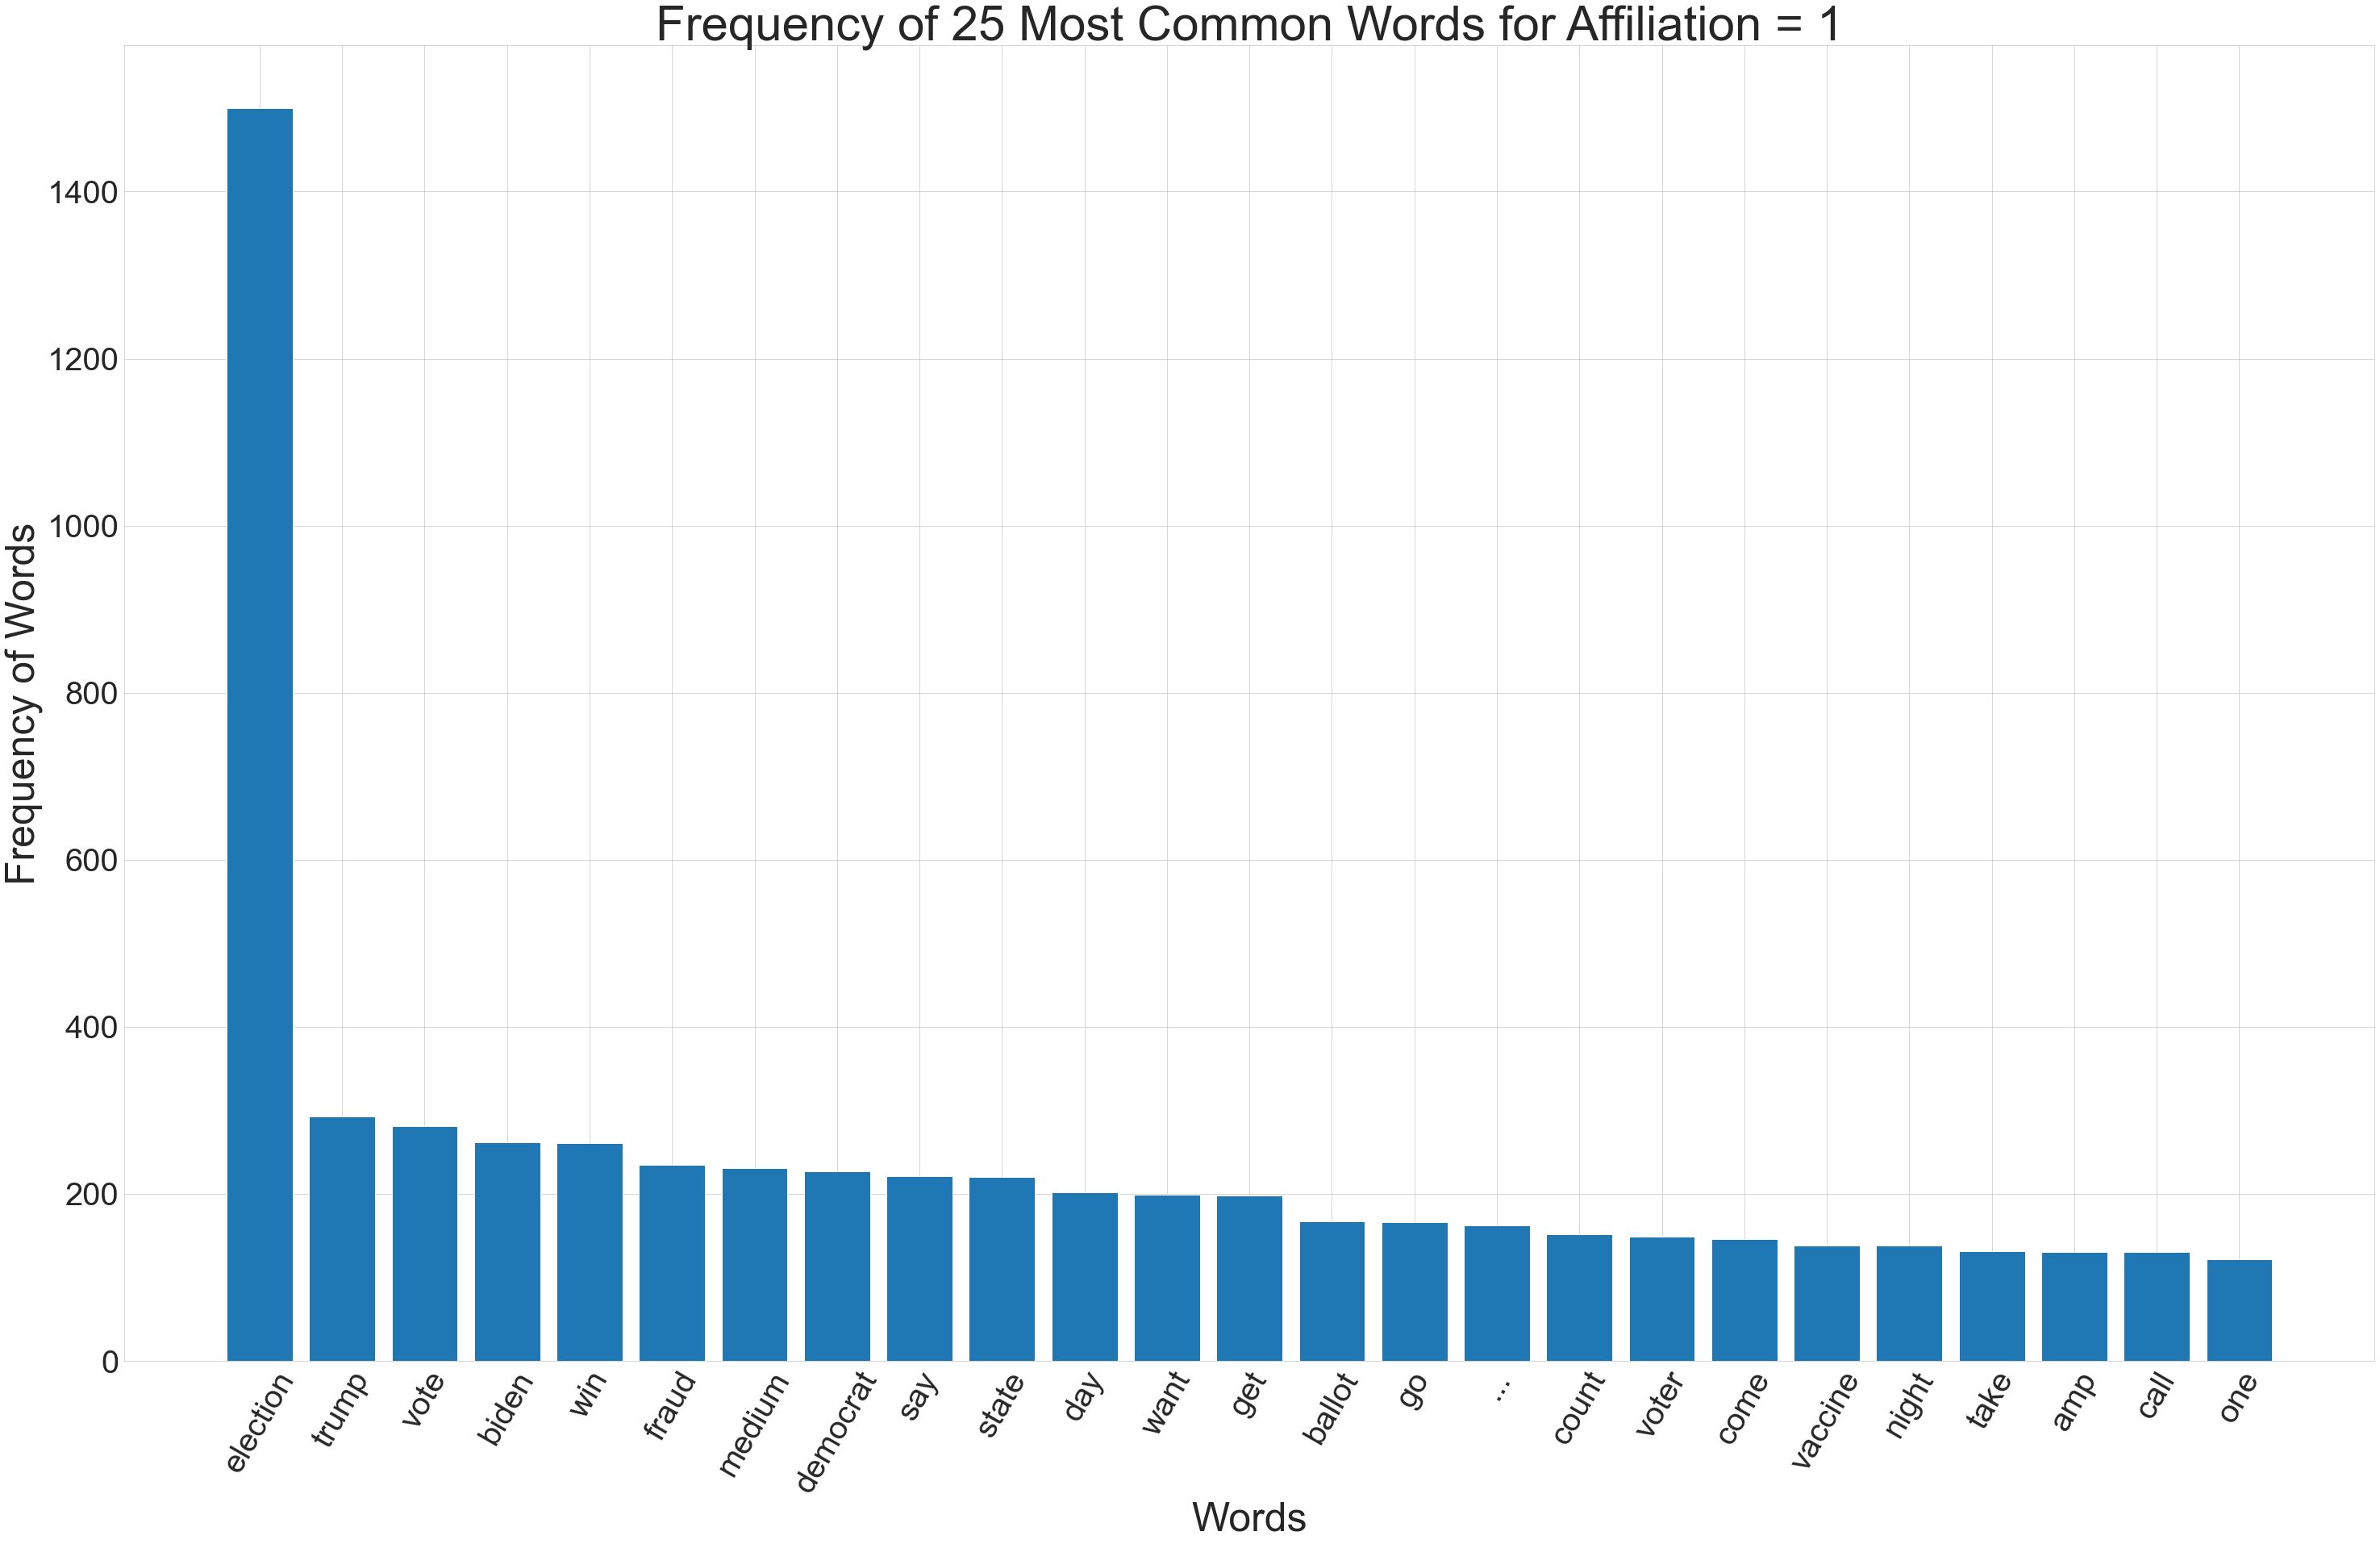

In [37]:
group_by_2 = group_by.iloc[2]
words2 = list(zip(*group_by_2))[0]
freq2 = list(zip(*group_by_2))[1]
plt.figure(figsize=(50,30))
plt.bar(words2, freq2)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Affiliation = 1', fontsize=60)
plt.show()

In [38]:
# Obviously, most tweets regardless of affiliation mention the election. Interestingly, those tweets with 
# affiliation = -1 (Biden-supporting/Trump-bashing) mention Trump more than any other affiliation does. Also
# of note, those with affiliation = 1 (Trump-supporting/Biden-bashing) mention Biden more than affiliation = -1
# does. Again, it seems the affiliation tracks which candidate the user dislikes more than which candidate they
# like. 
# Note that "lose" appears high in the words used by affiliation = -1, but doesn't appear at all elsewhere.
# 

In [39]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=15, max_features=5000)

tf = tf_vectorizer.fit_transform(ctweets_df['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()

doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

00  000  09  10  100  1000  109  10m  11  118  ...  york  you  young  \
0       0    0   0   0    0     0    0    0   0    0  ...     0    0      0   
1       0    0   0   0    0     0    0    0   0    0  ...     0    0      0   
2       0    0   0   0    0     0    0    0   0    0  ...     0    0      0   
3       0    0   0   0    0     0    0    0   0    0  ...     0    0      0   
4       0    0   0   0    0     0    0    0   0    0  ...     0    0      0   
...    ..  ...  ..  ..  ...   ...  ...  ...  ..  ...  ...   ...  ...    ...   
43038   1    0   0   0    0     0    0    0   0    0  ...     0    0      0   
43039   0    0   0   0    0     0    0    0   0    0  ...     0    0      0   
43040   0    0   0   0    0     0    0    0   0    0  ...     0    0      0   
43041   0    0   0   0    0     0    0    0   0    0  ...     0    0      0   
43042   0    0   0   0    0     0    0    0   0    0  ...     0    0      0   

       youth  youtube  yr  zero  zoom  zuckerberg  zuckerbooger  
0          0        0   0     0     0           0             0  
1          0        0   0     0     0           0             0  
2          0        0   0     0     0           0             0  
3          0        0   0     0     0           0             0  
4          0        0   0     0     0           0             0  
...      ...      ...  ..   ...   ...         ...           ...  
43038      0        0   0     0     0           0             0  
43039      0        0   0     0     0           0             0  
43040      0        0   0     0     0           0             0  
43041      0        0   0     0     0           0             0  
43042      0        0   0     0     0           0             0  

[43043 rows x 2907 columns]

In [40]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0)
lda_model.fit(tf)

no_top_words = 10

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
announce election vaccine would say political courage long life fda
Topic 1:
election one trump vote count ballot try take amp want
Topic 2:
election barr irregularity vote federal authorize allegation 2020 prosecutor break
Topic 3:
election tell state ballot 10 00 let pennsylvania night call
Topic 4:
election fraud voter go trump president find amp vote system
Topic 5:
election presidential big georgia biden vote know win would audit
Topic 6:
election say trump need american lie covid medium thing day
Topic 7:
election trump biden president republican joe call win elect lose
Topic 8:
election day say democrat get come want win instead vaccine
Topic 9:
election good news mean fraud trump cc senate know go


In [41]:
# The above took ~1 hr to run. The topics are hard to distinguish, but some stand out. 
# We will (very subjectively) interpret the topics here:
# topic 0: FDA announcing vaccine on election night
# topic 1: Count ballots (Trump will try to take election?)
# topic 2: Alleged vote irregularity, Barr & prosecutors
# topic 3: Pennsylvania state called, night of Nov 10th
# topic 4: Finding voting fraud in the system (for Pres. Trump)
# topic 5: Auditing of Georgia election if Biden wins
# topic 6: Trump needs Americans, covid is a lie(?)
# topic 7: Election called; Biden elected president
# topic 8: Vaccine reported near election day (wanted win, got vaccine instead?)
# topic 9: Senate knew, good news means fraud

In [42]:
# Next we will try NMF topic modeling.

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df =15, max_features=5000, use_idf=True)
tfidf = tfidf_vectorizer.fit_transform(ctweets_df['lemma_str'])

tfidf_feature_names = tfidf_vectorizer.get_feature_names()
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

00  000   09   10  100  1000  109  10m   11  118  ...  york  you  \
0      0.00000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
1      0.00000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
2      0.00000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
3      0.00000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
4      0.00000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
...        ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   ...  ...   
43038  0.21049  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
43039  0.00000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
43040  0.00000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
43041  0.00000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
43042  0.00000  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   

       young  youth  youtube   yr  zero  zoom  zuckerberg  zuckerbooger  
0        0.0    0.0      0.0  0.0   0.0   0.0         0.0           0.0  
1        0.0    0.0      0.0  0.0   0.0   0.0         0.0           0.0  
2        0.0    0.0      0.0  0.0   0.0   0.0         0.0           0.0  
3        0.0    0.0      0.0  0.0   0.0   0.0         0.0           0.0  
4        0.0    0.0      0.0  0.0   0.0   0.0         0.0           0.0  
...      ...    ...      ...  ...   ...   ...         ...           ...  
43038    0.0    0.0      0.0  0.0   0.0   0.0         0.0           0.0  
43039    0.0    0.0      0.0  0.0   0.0   0.0         0.0           0.0  
43040    0.0    0.0      0.0  0.0   0.0   0.0         0.0           0.0  
43041    0.0    0.0      0.0  0.0   0.0   0.0         0.0           0.0  
43042    0.0    0.0      0.0  0.0   0.0   0.0         0.0           0.0  

[43043 rows x 2907 columns]

In [44]:
nmf = NMF(n_components=10, random_state=0, alpha=.1, init='nndsvd')
nmf.fit(tfidf)

display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
authorize prosecutor irregularity barr federal allegation substantial pursue certify break
Topic 1:
five later prior instead along come want democrat fda get
Topic 2:
announce likewise purpose earlier save life others courage political long
Topic 3:
biden call rescind pennsylvania realclearpolitics win election president result live
Topic 4:
cc good mean news cruz ted decide medium fox election
Topic 5:
trump donald go election steal lose try attempt accept openly
Topic 6:
count ballot observer state tell arena secret farm shut tabulation
Topic 7:
georgia big win night presidential election donald trump legally cast
Topic 8:
donald disgraceful bureaucracy weaponize totally always ago impossible government lie
Topic 9:
audit orange board california race recount county announce presidential election


In [45]:
# This ran MUCH faster than LDA. Also these are very different topics to what was given by LDA. 

# We will (very subjectively) interpret the topics here:
# topic 0: Allegations of voter irregularities pursued by Barr & prosecutors, authorized to pursue etc.
# topic 1: ???
# topic 2: (Vaccine) could have been announced earlier to save lives
# topic 3: Realclearpolitics rescinds their call of Biden winning Pennsylvania, live
# topic 4: Ted Cruz, Fox News, Medium... something decides the election?
# topic 5: Trump claims election steal due to lose, vs. openly accepting
# topic 6: Vote tabulation and ballot observers
# topic 7: Big win in Georgia on night of Pres. election
# topic 8: ???
# topic 9: Orange county, CA audits race, announces recount 

In [46]:
nmf_topic_values = nmf.transform(tfidf)
ctweets_df['nmf_topics'] = nmf_topic_values.argmax(axis=1)
lda_topic_values = lda_model.transform(tf)
ctweets_df['lda_topics'] = lda_topic_values.argmax(axis=1)

# If we could subjectively determine the LDA or NMF topics from the topics given above, we'd use this remapping,
# replacing the '#?' with the relevant topic names:

lda_remap = {0: 'topic 0', 1: 'topic 1', 2: 'topic 2', 3: 'topic 3', 4: 'topic 4', 5: 'topic 5', 6: 'topic 6', 7: 'topic 7', 8: 'topic 8', 9: 'topic 9'}
ctweets_df['lda_topics'] = ctweets_df['lda_topics'].map(lda_remap)

nmf_remap = {0: 'topic 0', 1: 'topic 1', 2: 'topic 2', 3: 'topic 3', 4: 'topic 4', 5: 'topic 5', 6: 'topic 6', 7: 'topic 7', 8: 'topic 8', 9: 'topic 9'}
ctweets_df['nmf_topics'] = ctweets_df['nmf_topics'].map(nmf_remap)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text major ticklabel objects>)

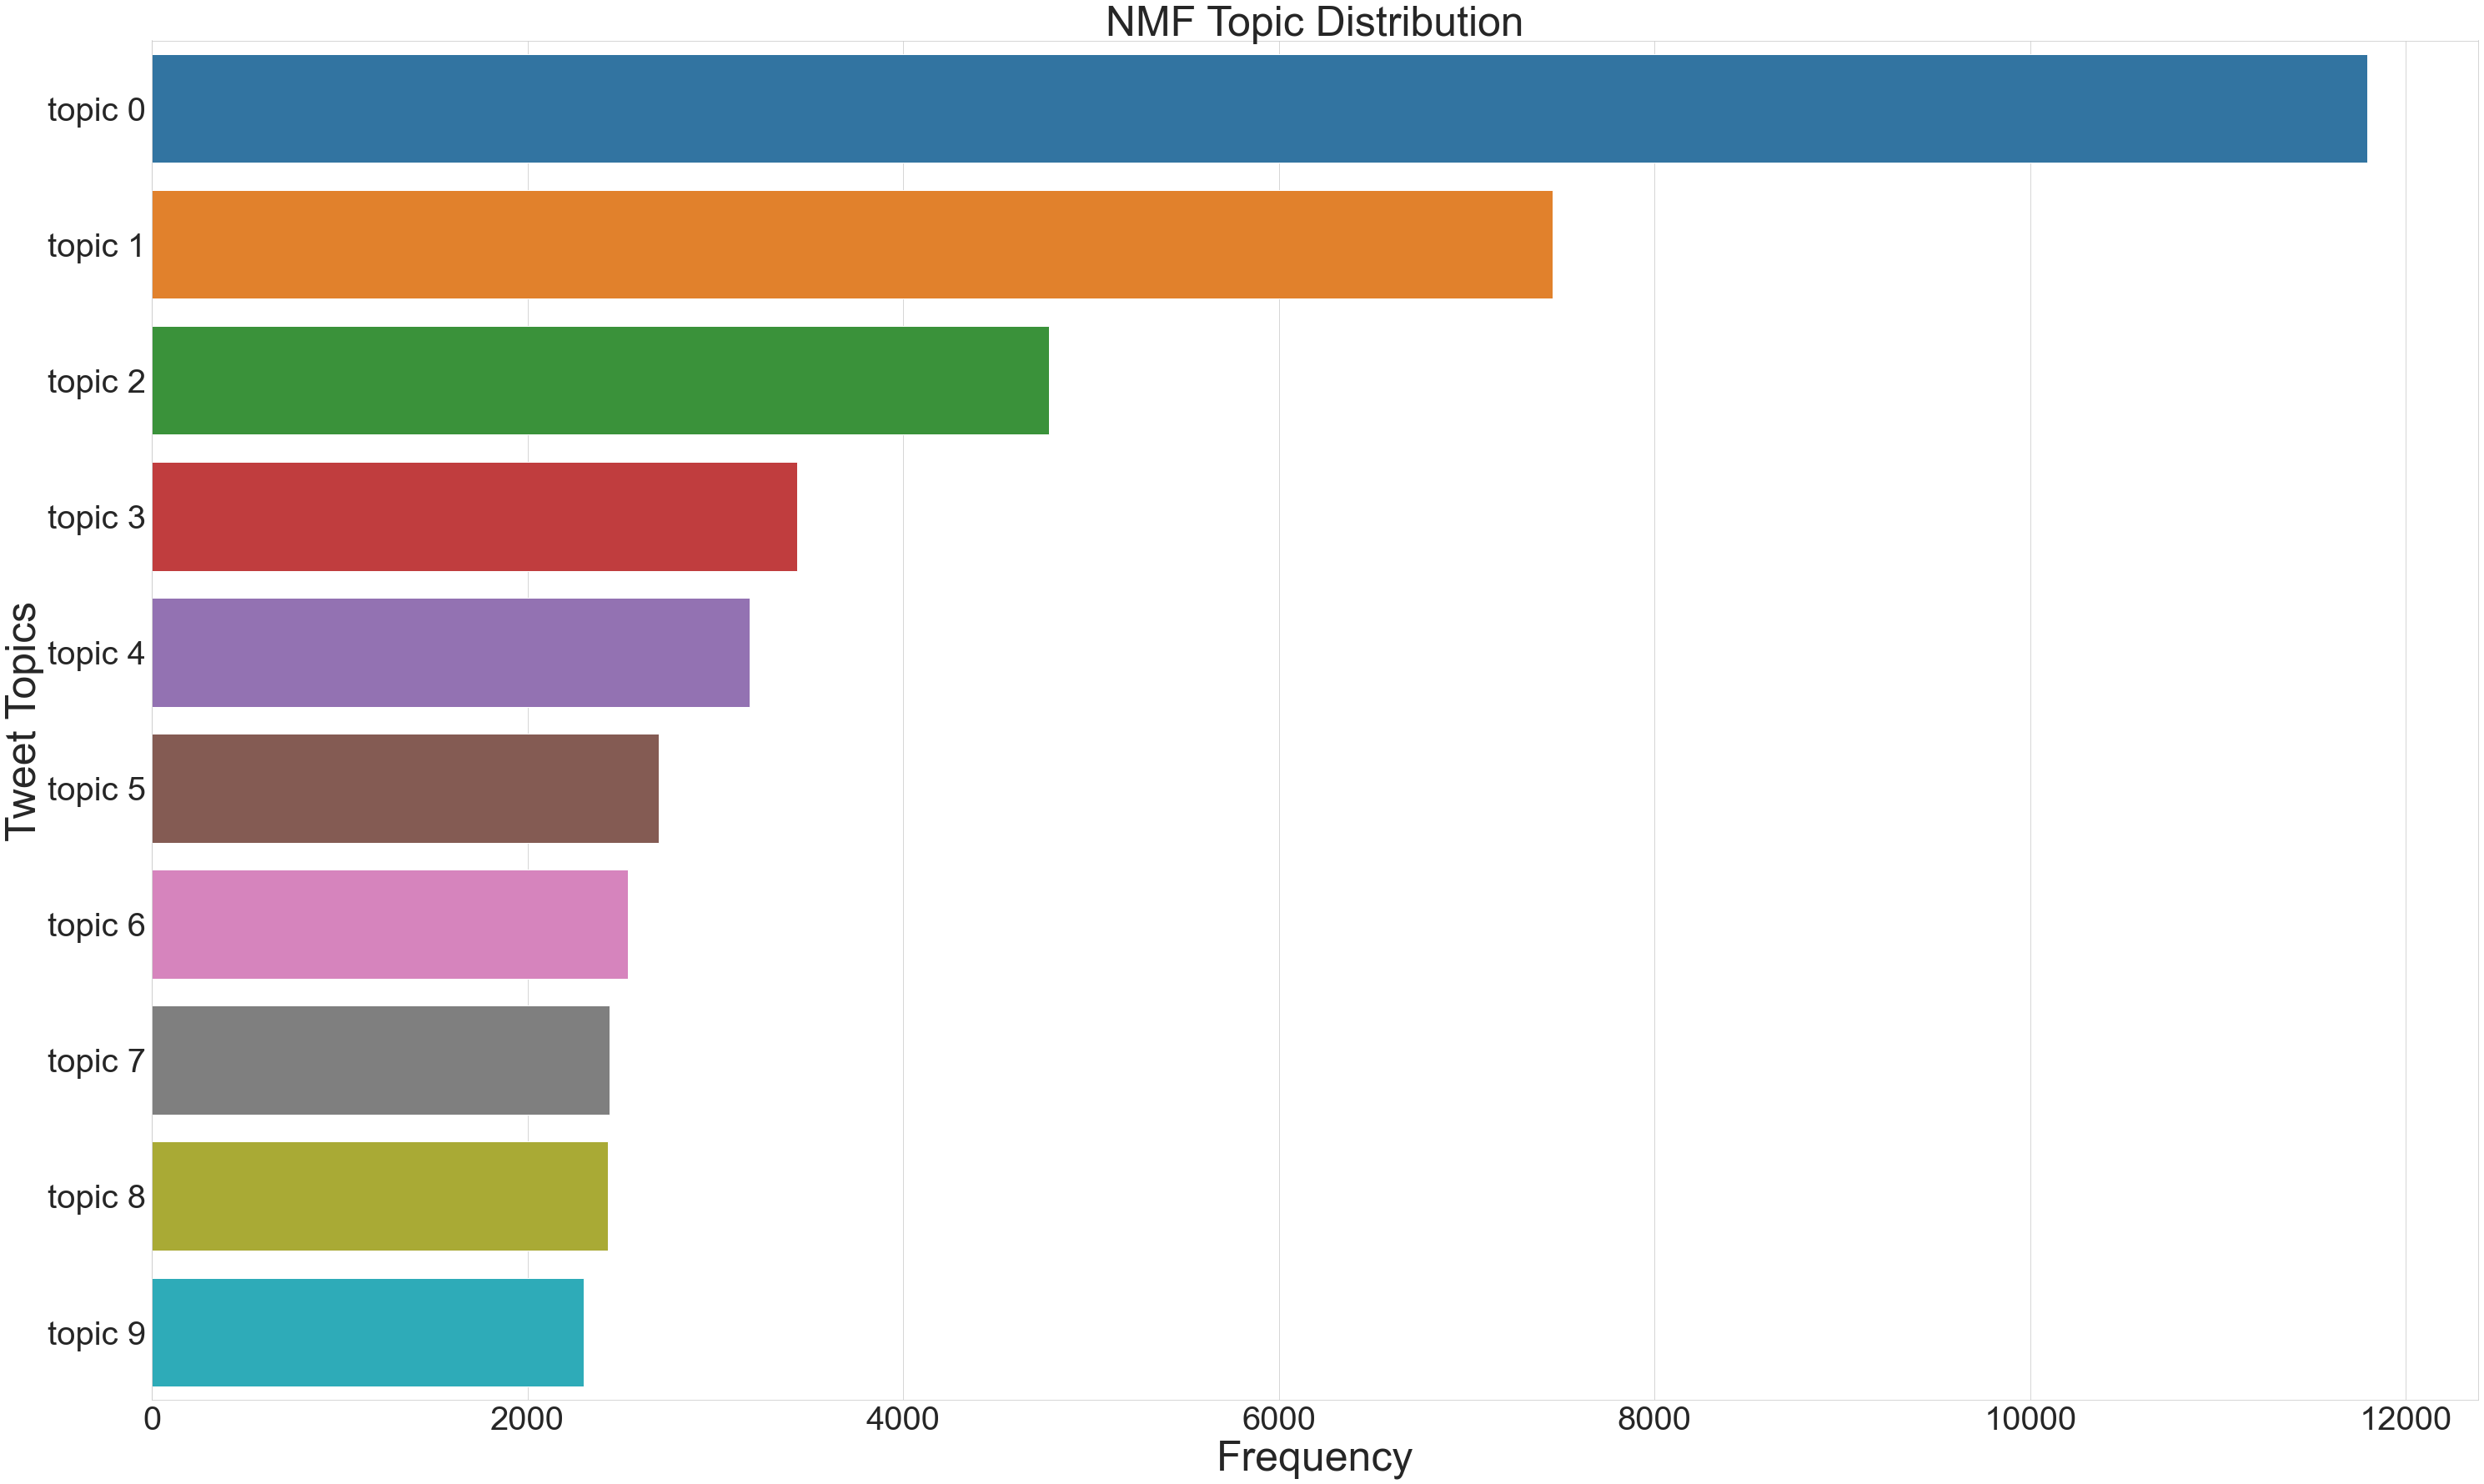

In [47]:
nmf_x = ctweets_df['nmf_topics'].value_counts()
nmf_y = nmf_x.sort_index()

plt.figure(figsize=(50,30))

sns.barplot(nmf_x, nmf_y.index)

plt.title("NMF Topic Distribution", fontsize=50)
plt.ylabel('Tweet Topics', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Frequency', fontsize=50)
plt.xticks(fontsize=40)

(0.0, 500.0)

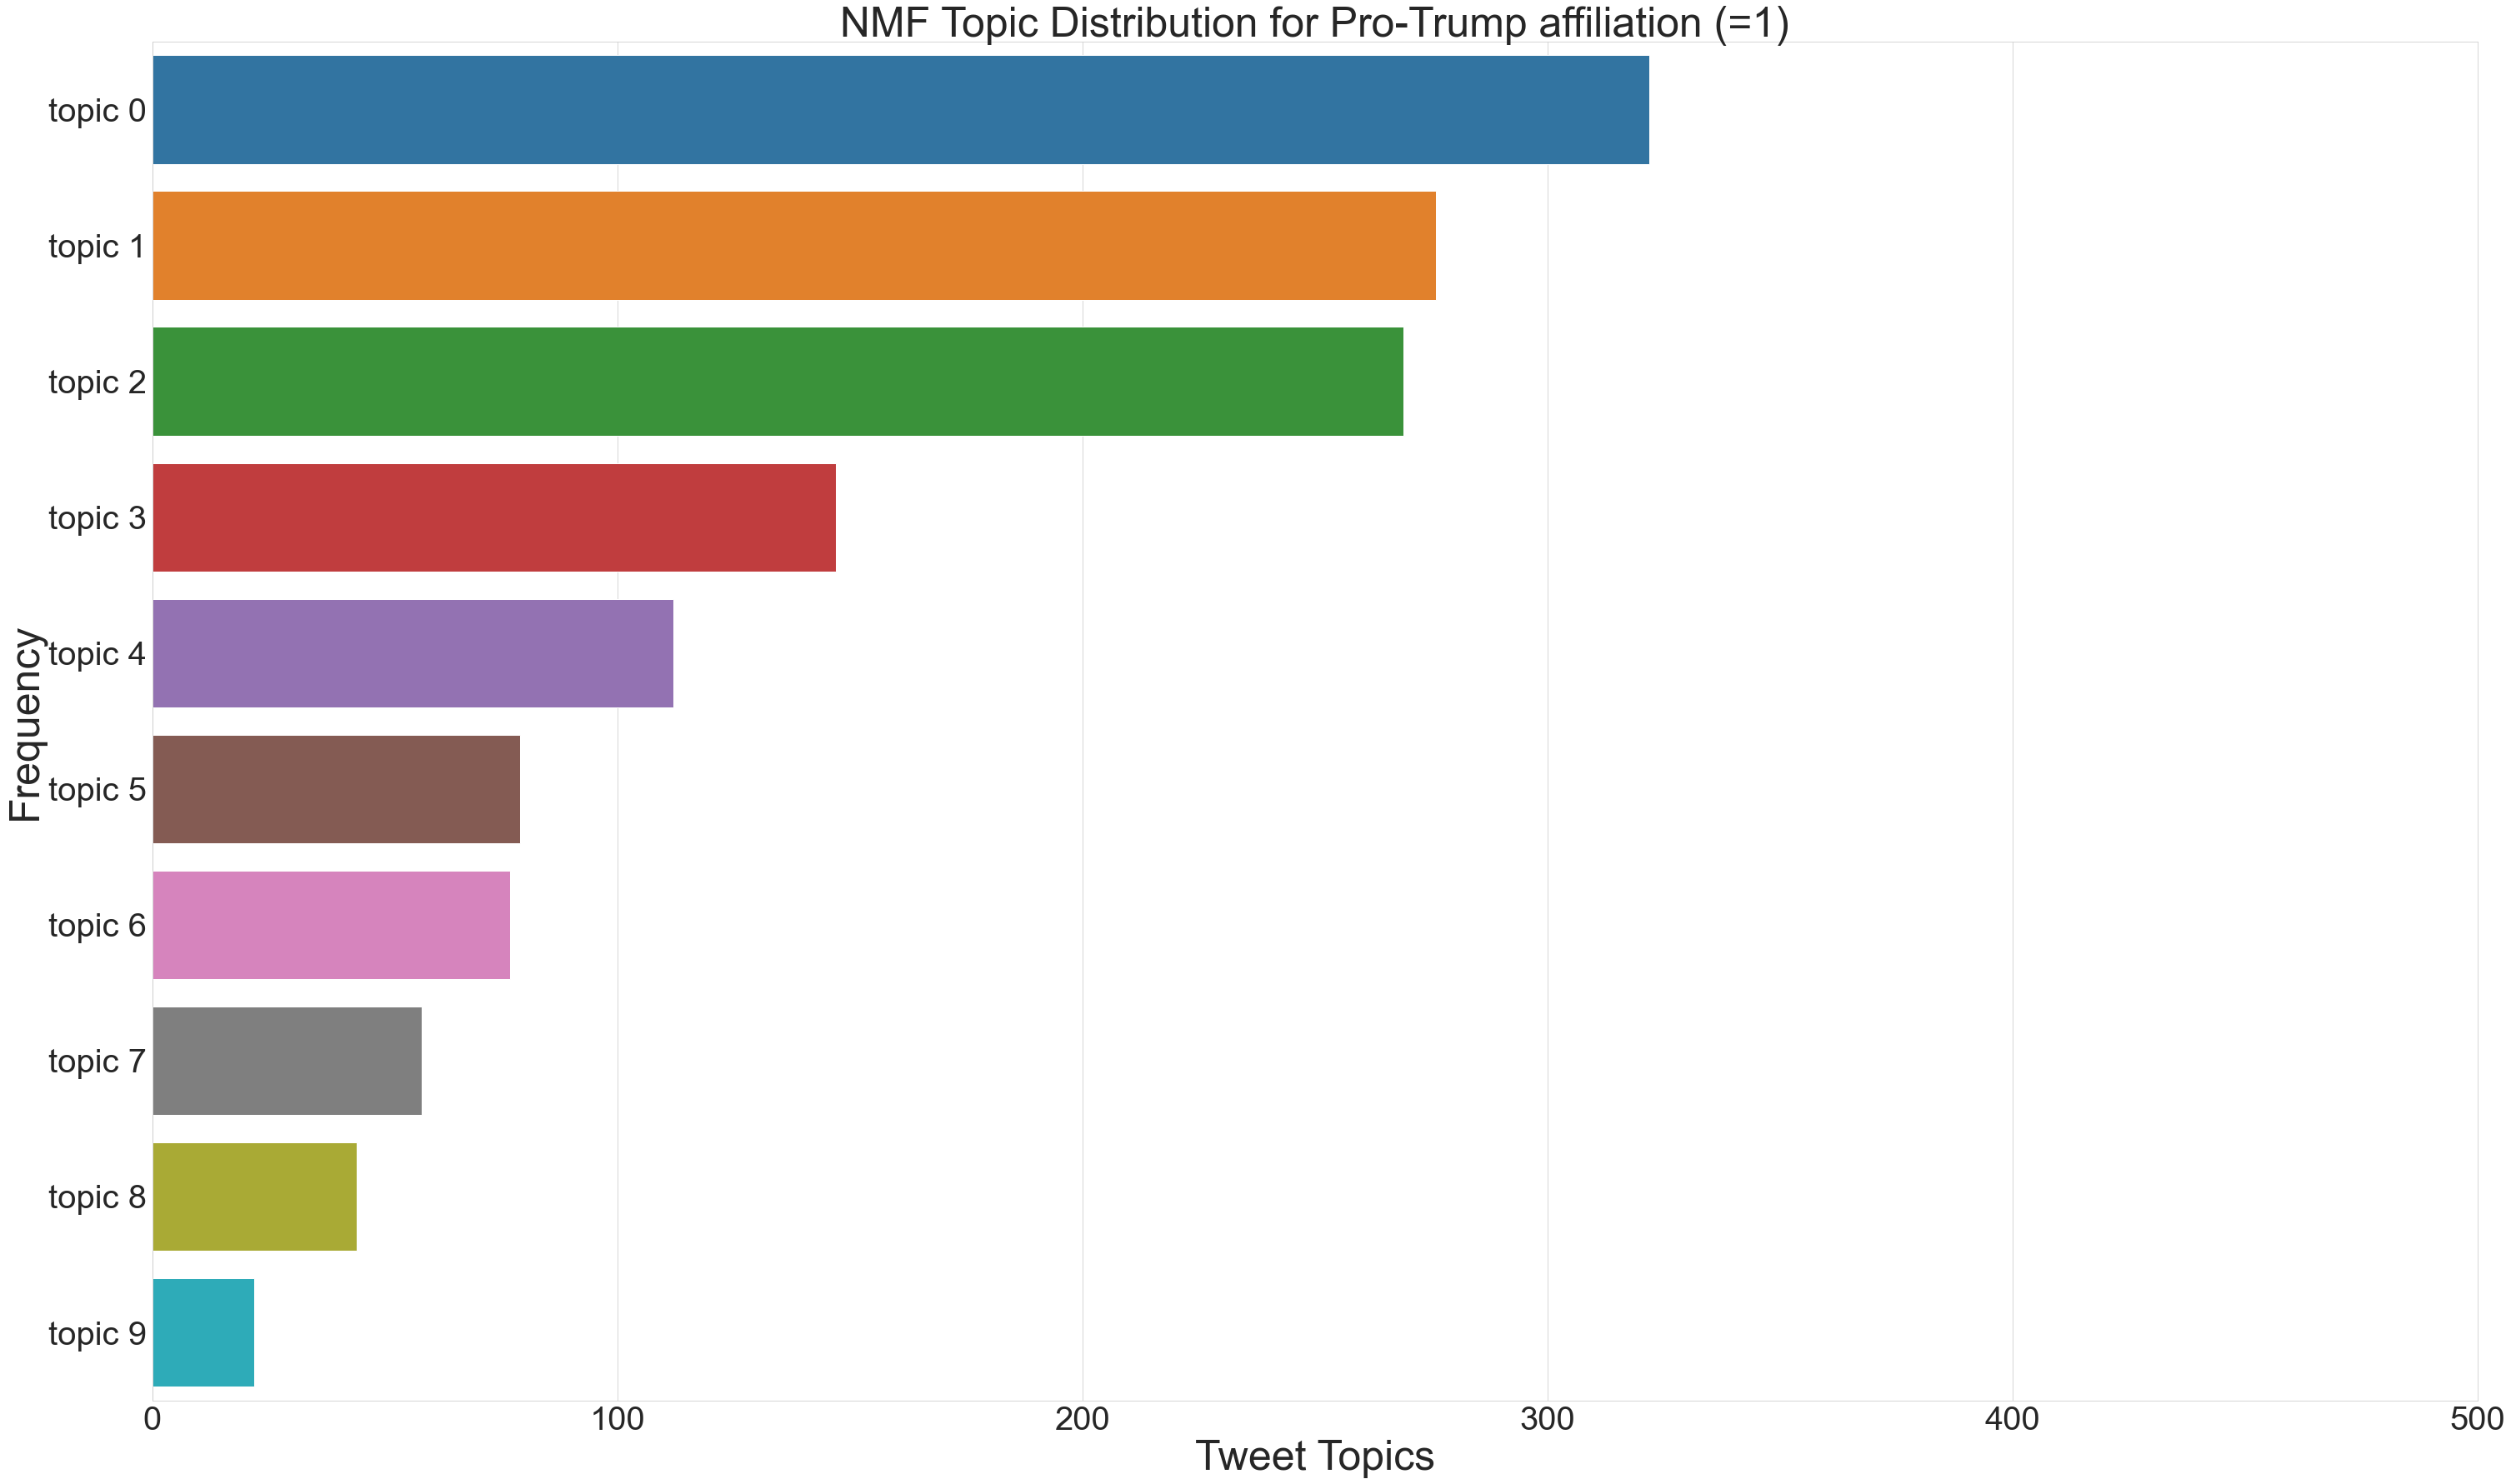

In [48]:
# Let's try to split by Affiliation:

# reset this since we've added new columns to ctweets_df (NMF & LDA topics):
labeled_ctweets_df = ctweets_df[:4002]

ctweets_df_pro_trump = labeled_ctweets_df.loc[labeled_ctweets_df['Affiliation']==1]
nmf_prot_x = ctweets_df_pro_trump['nmf_topics'].value_counts()
nmf_prot_y = nmf_prot_x.sort_index()

plt.figure(figsize=(50,30))

sns.barplot(nmf_prot_x, nmf_prot_y.index)

plt.title("NMF Topic Distribution for Pro-Trump affiliation (=1)", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Tweet Topics', fontsize=50)
plt.xticks(fontsize=40)
plt.xlim([0,500])

(0.0, 500.0)

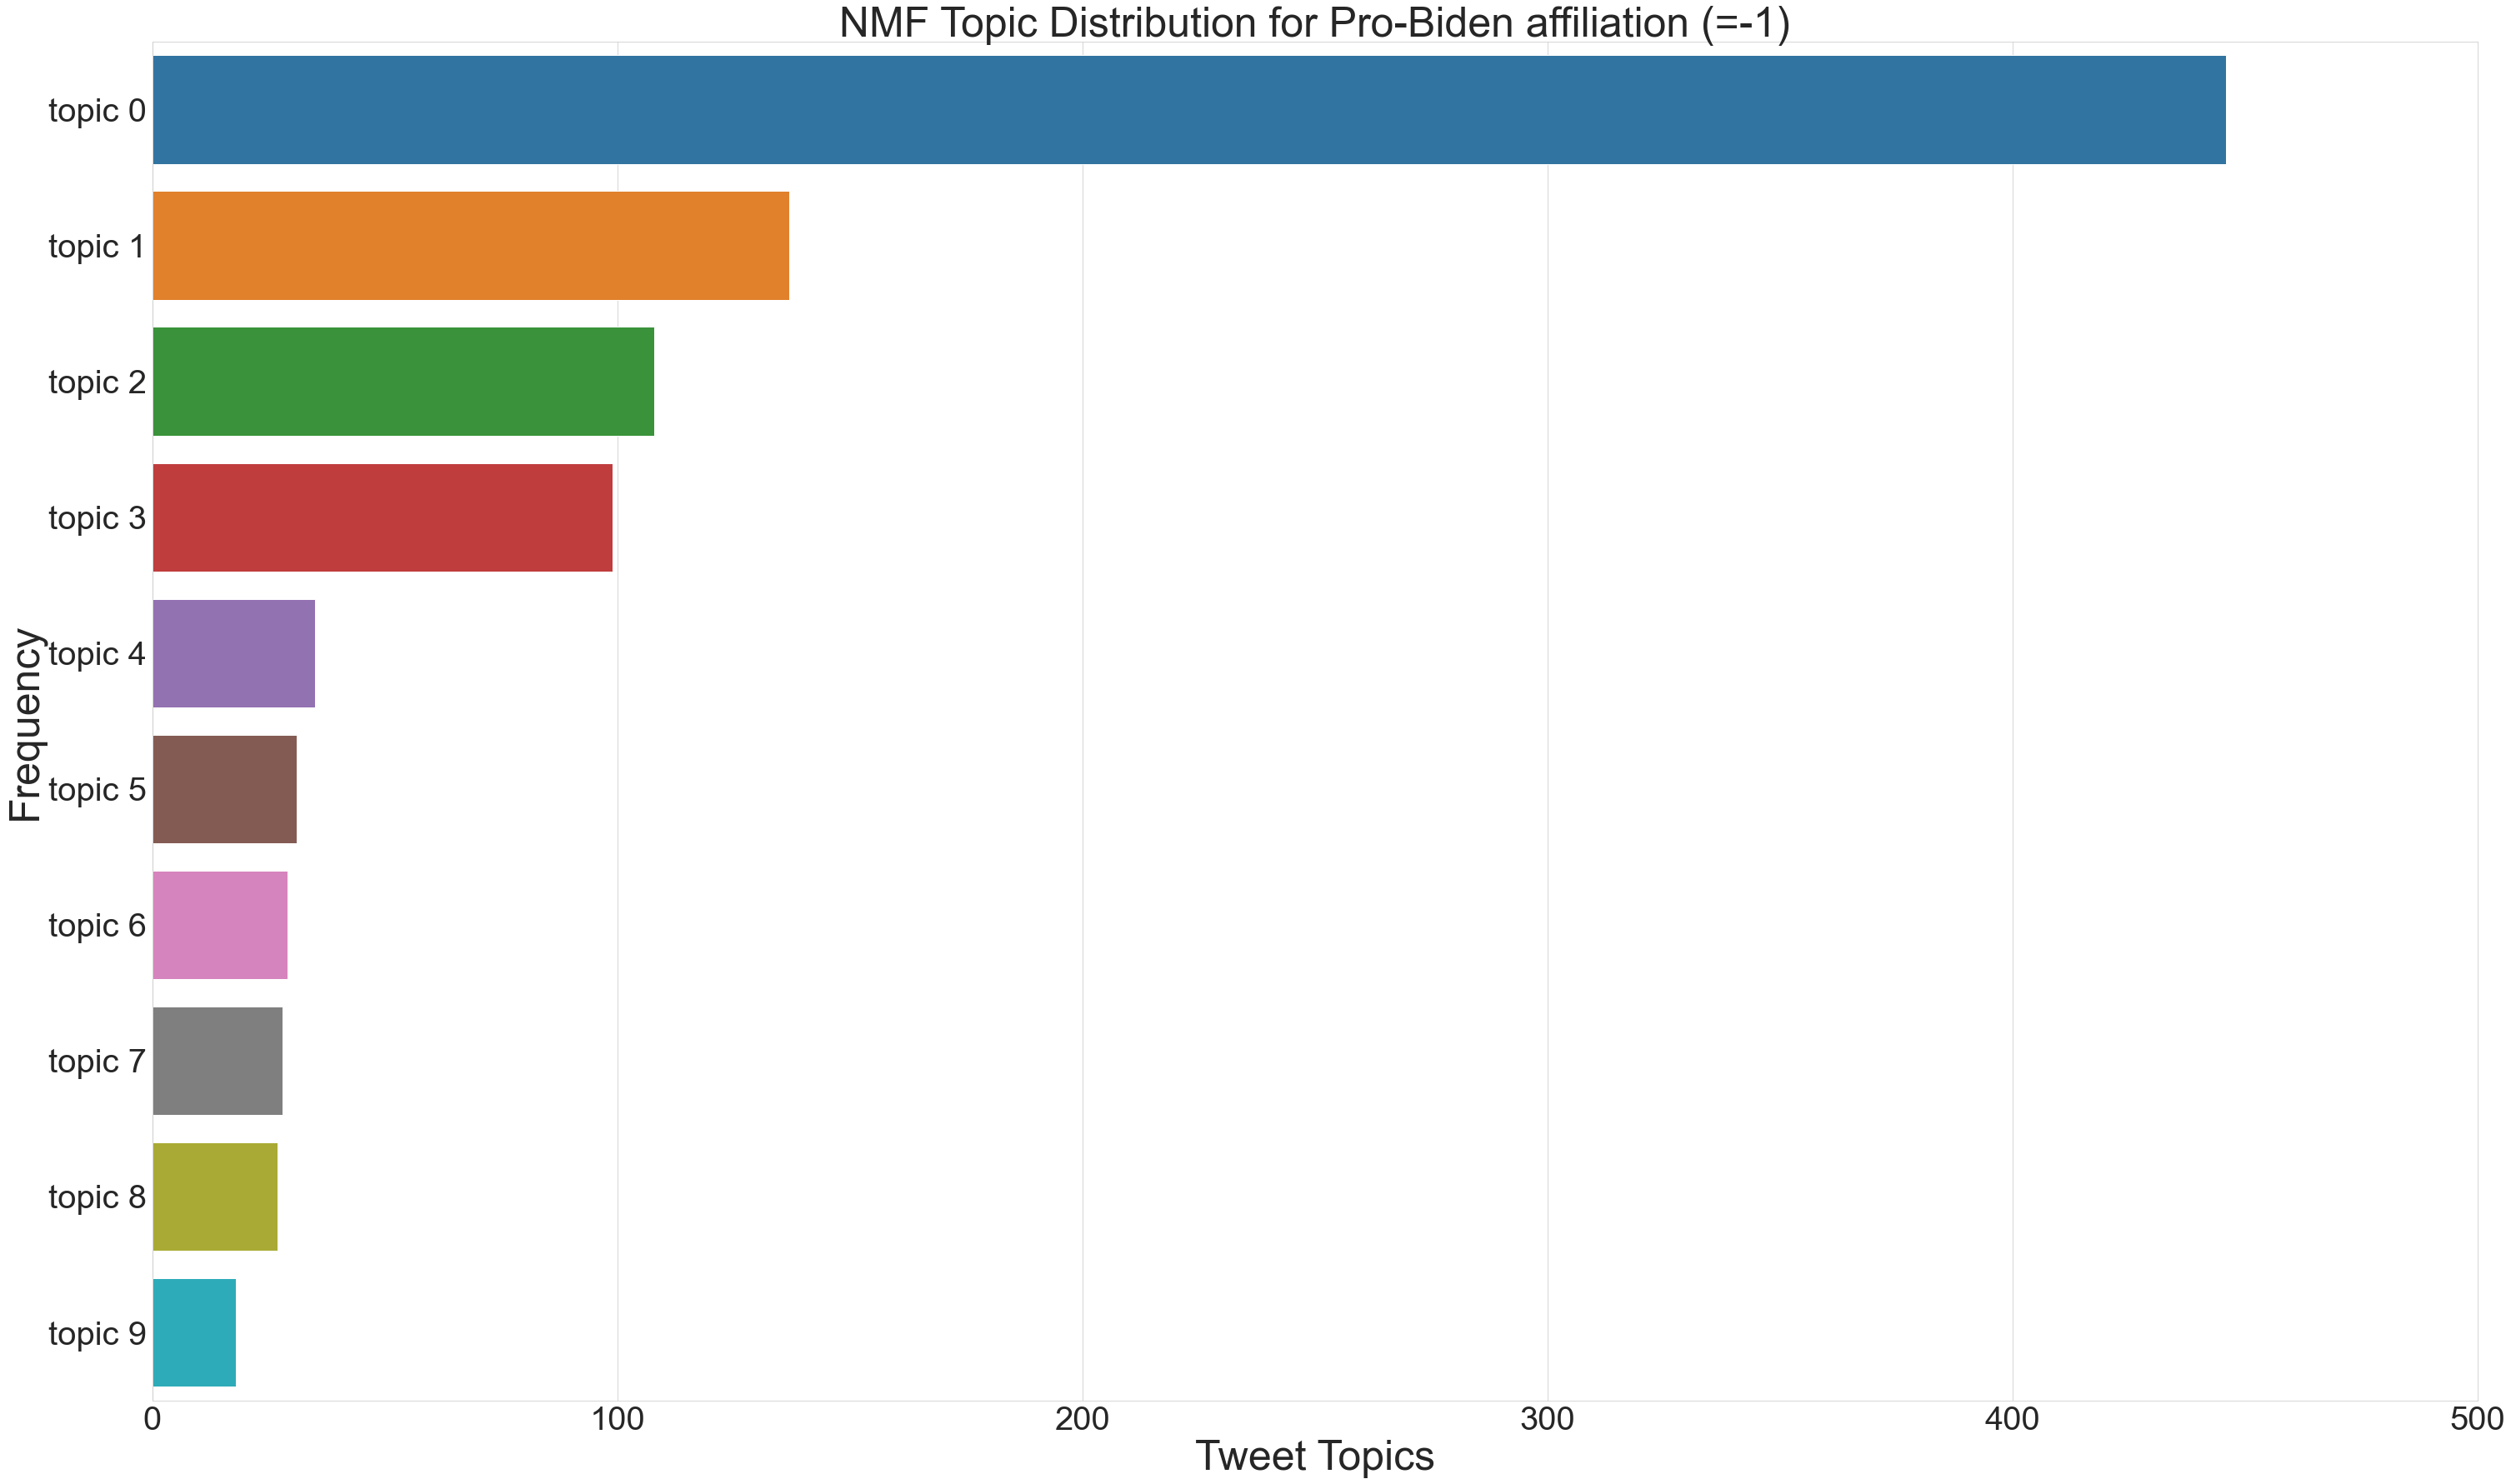

In [49]:
ctweets_df_pro_biden = labeled_ctweets_df.loc[labeled_ctweets_df['Affiliation']==-1]
nmf_prob_x = ctweets_df_pro_biden['nmf_topics'].value_counts()
nmf_prob_y = nmf_prob_x.sort_index()

plt.figure(figsize=(50,30))

sns.barplot(nmf_prob_x, nmf_prob_y.index)

plt.title("NMF Topic Distribution for Pro-Biden affiliation (=-1)", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Tweet Topics', fontsize=50)
plt.xticks(fontsize=40)
plt.xlim([0,500])

In [50]:
# This is very interesting as it shows that Pro-Biden/Anti-Trump tweets largely fell into topics 0-3, while 
# Pro-Trump/Anti-Biden tweets fell into topics 0-4 and the other topics did not trail off as quickly. Also,
# NMF topic number 0 receives a much larger share of the frequency from Pro-Biden/Anti-Trump tweets than it does
# from the Pro-Trump/Anti-Biden tweets.

(0.0, 500.0)

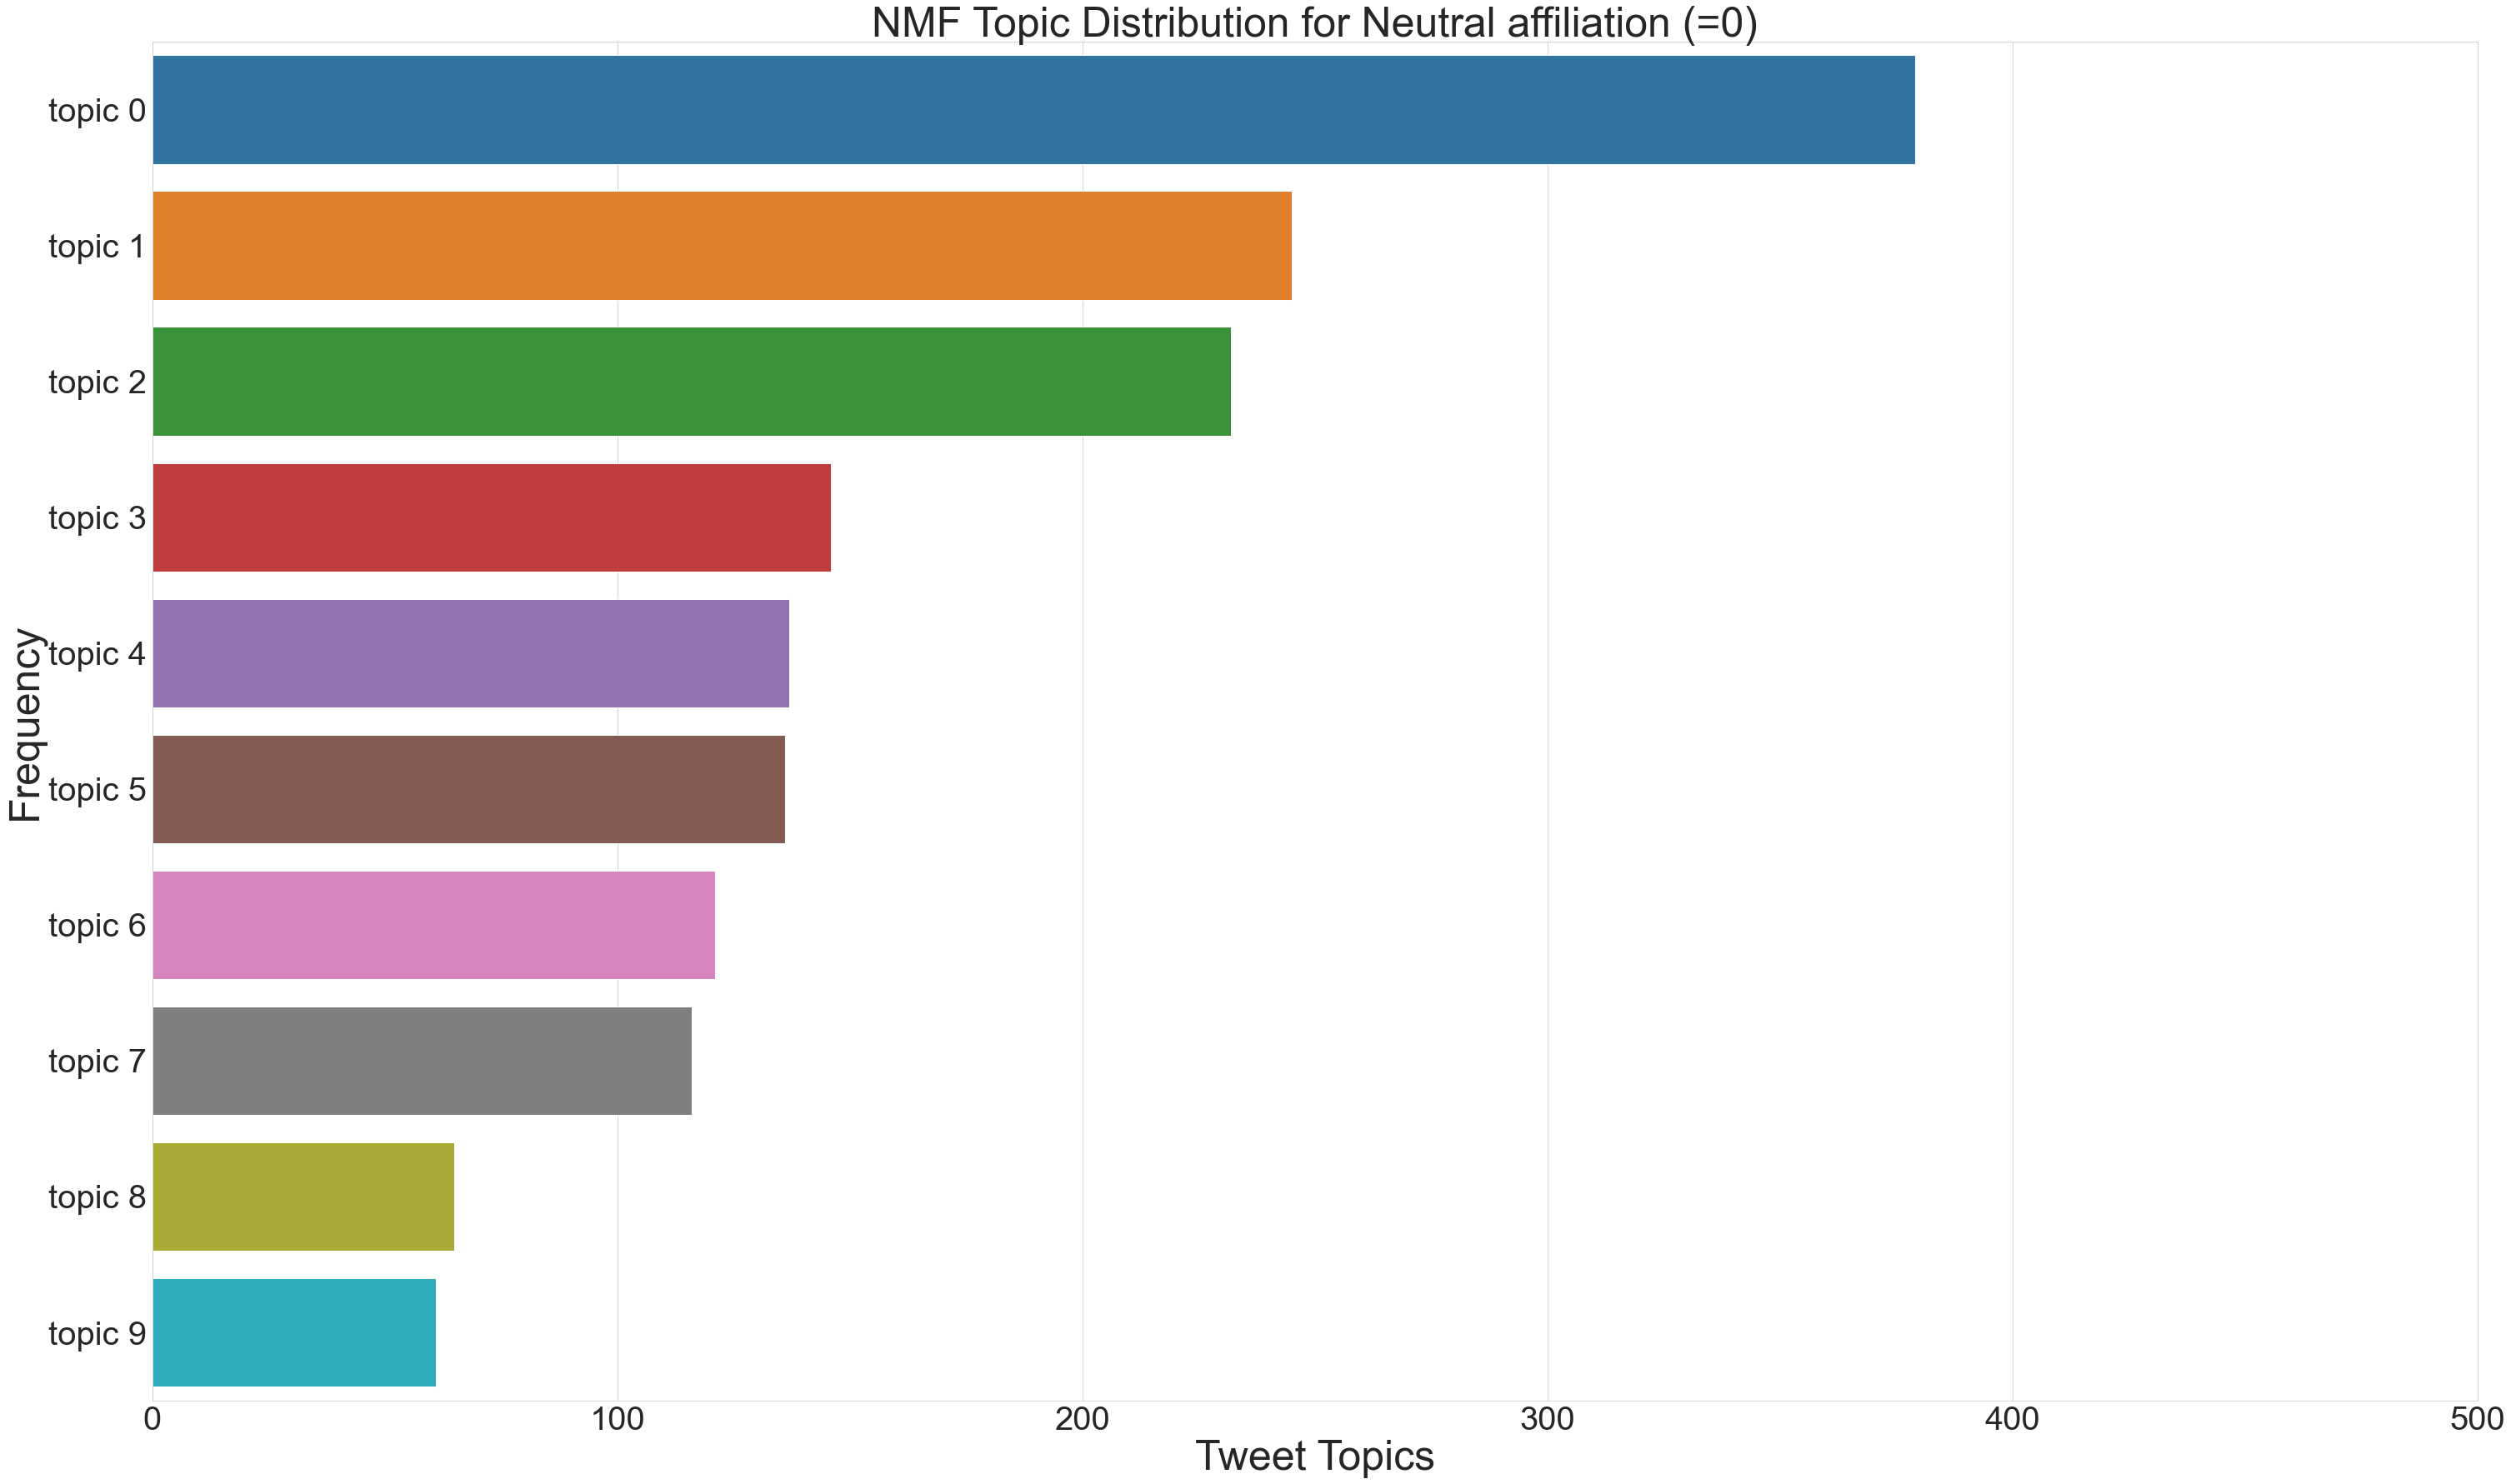

In [51]:
ctweets_df_neut = labeled_ctweets_df.loc[labeled_ctweets_df['Affiliation']==0]
nmf_neut_x = ctweets_df_neut['nmf_topics'].value_counts()
nmf_neut_y = nmf_neut_x.sort_index()

plt.figure(figsize=(50,30))

sns.barplot(nmf_neut_x, nmf_neut_y.index)

plt.title("NMF Topic Distribution for Neutral affiliation (=0)", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Tweet Topics', fontsize=50)
plt.xticks(fontsize=40)
plt.xlim([0,500])

In [52]:
# Here the distribution of neutral affiliation tweets has a larger tail and less bias to topic 0, suggesting
# similarity to the Pro-Trump/Anti-Biden tweet topic distribution.

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

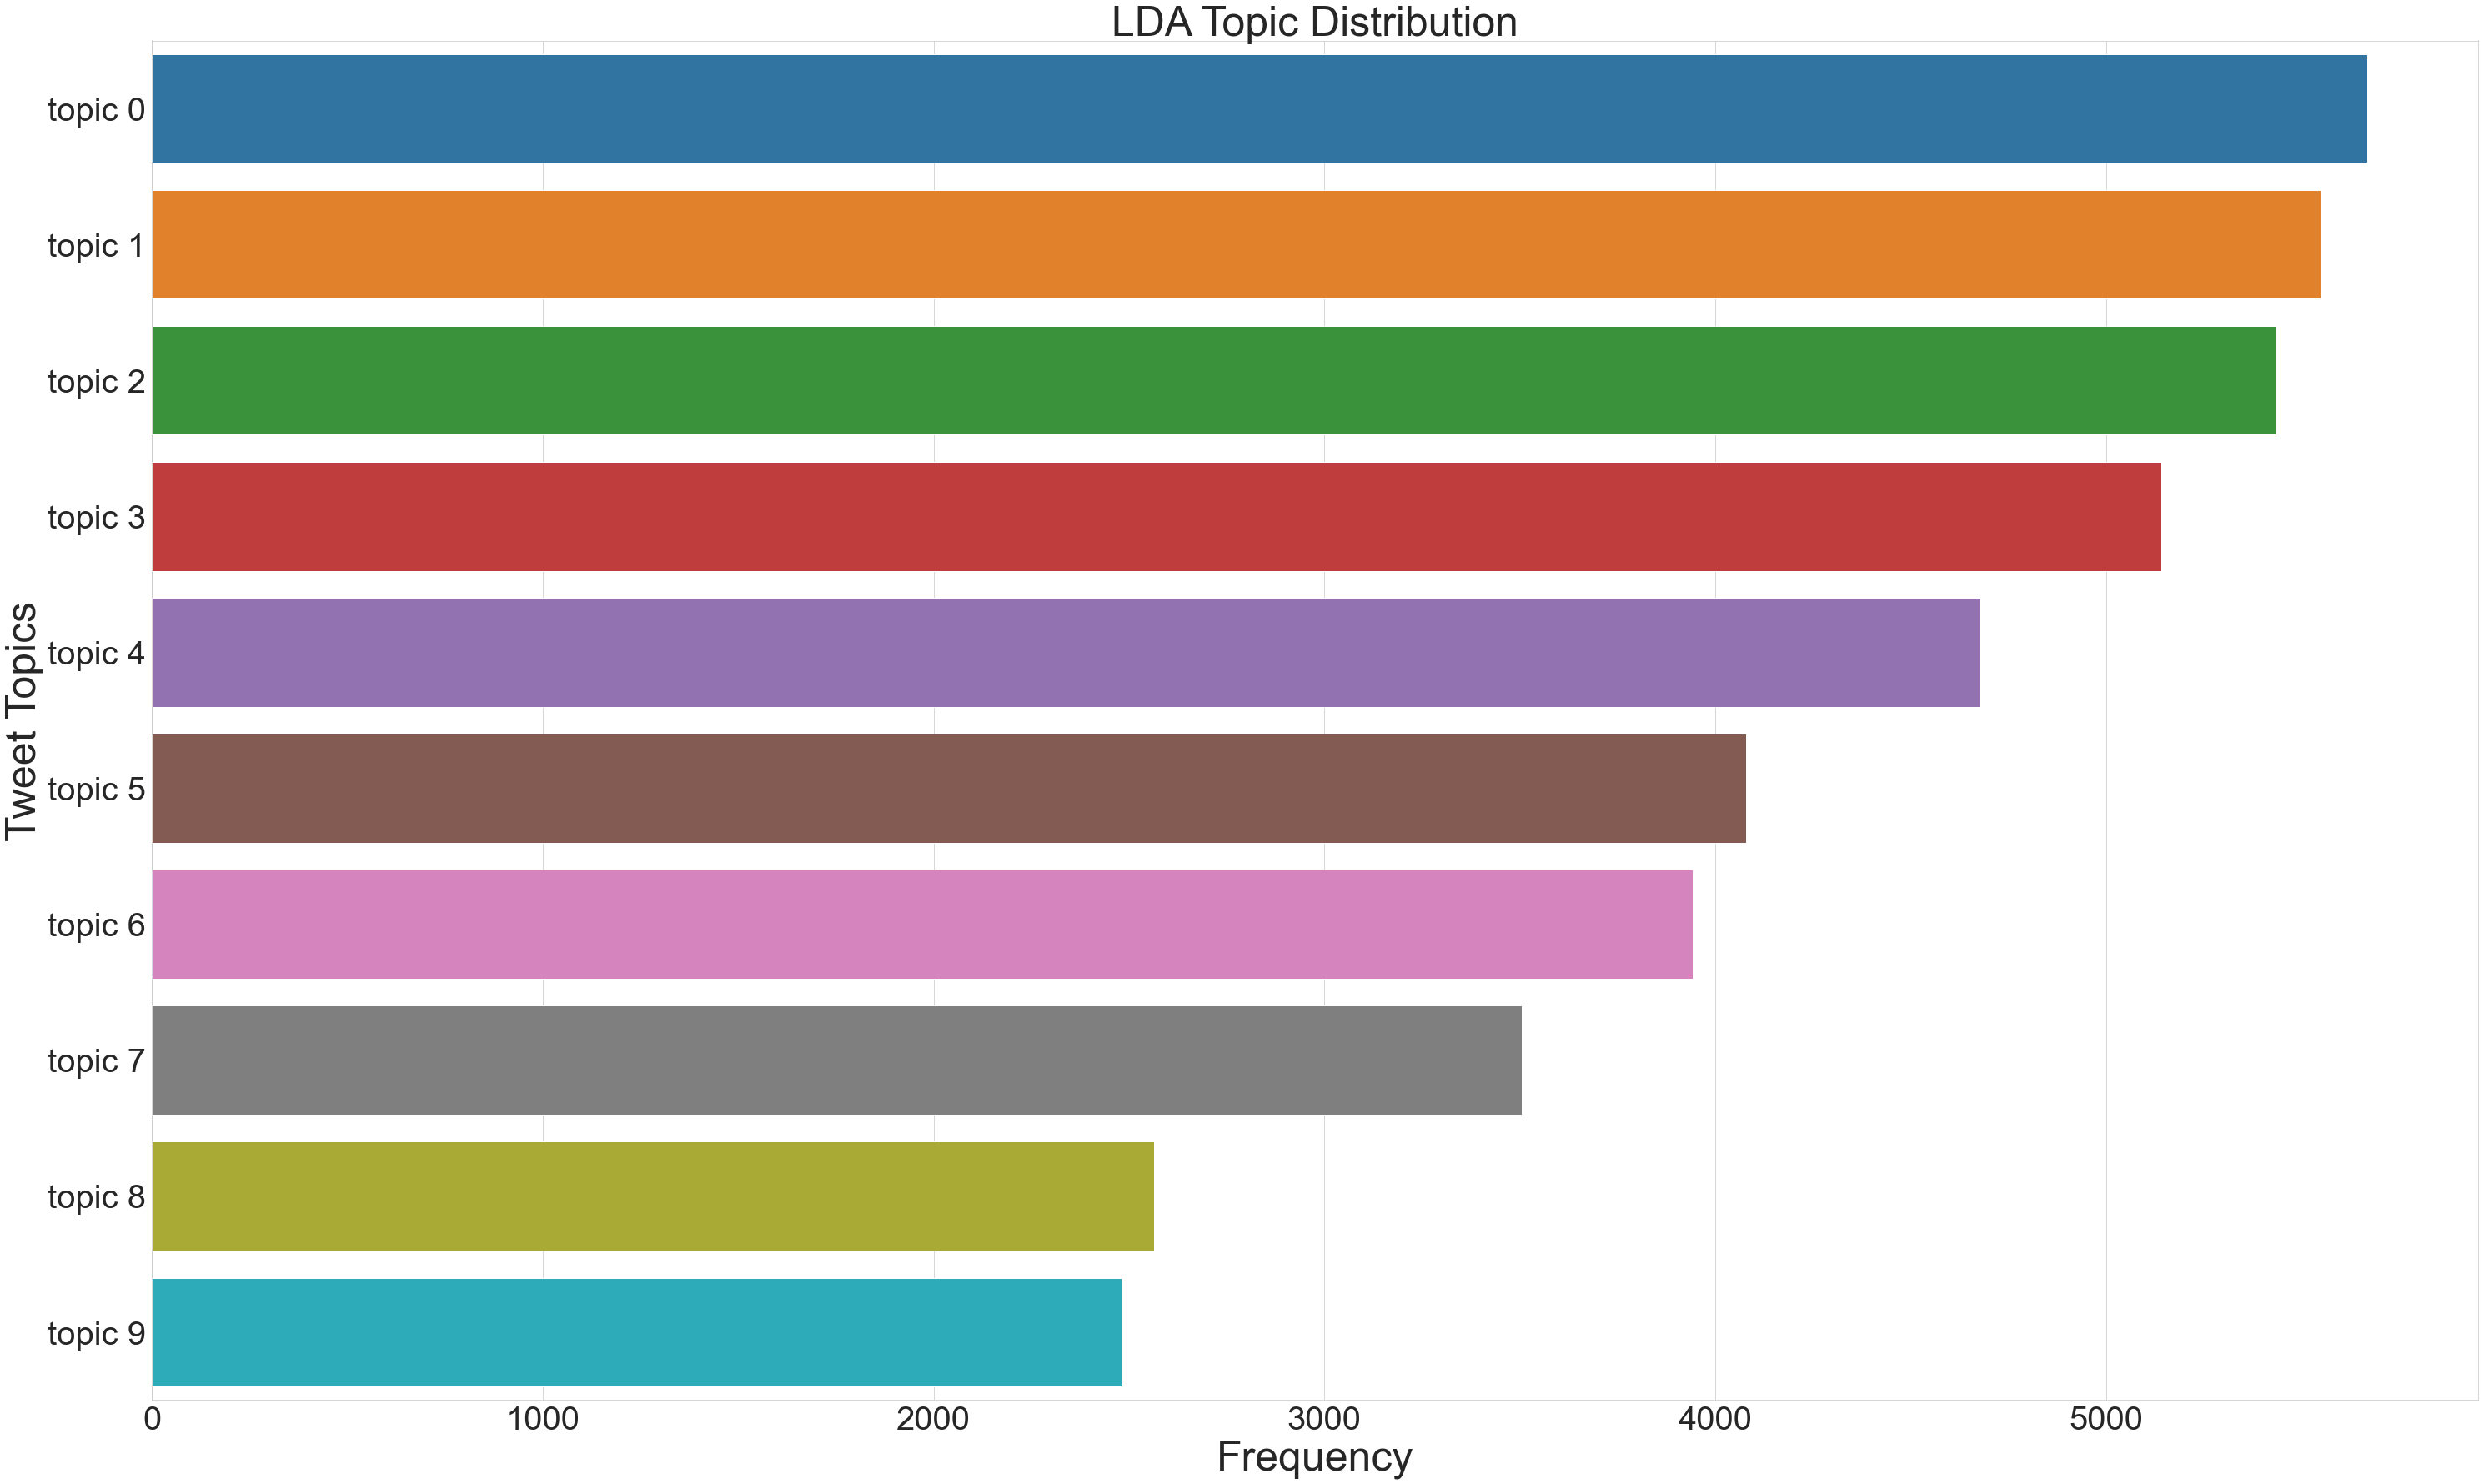

In [53]:
# For completeness, we repeat the same analysis on the LDA topics:

lda_x = ctweets_df['lda_topics'].value_counts()
lda_y = lda_x.sort_index()

plt.figure(figsize=(50,30))

sns.barplot(lda_x, lda_y.index)

plt.title("LDA Topic Distribution", fontsize=50)
plt.ylabel('Tweet Topics', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Frequency', fontsize=50)
plt.xticks(fontsize=40)

In [54]:
# This distribution is much more equitable even down to the 9th topic.

(0.0, 250.0)

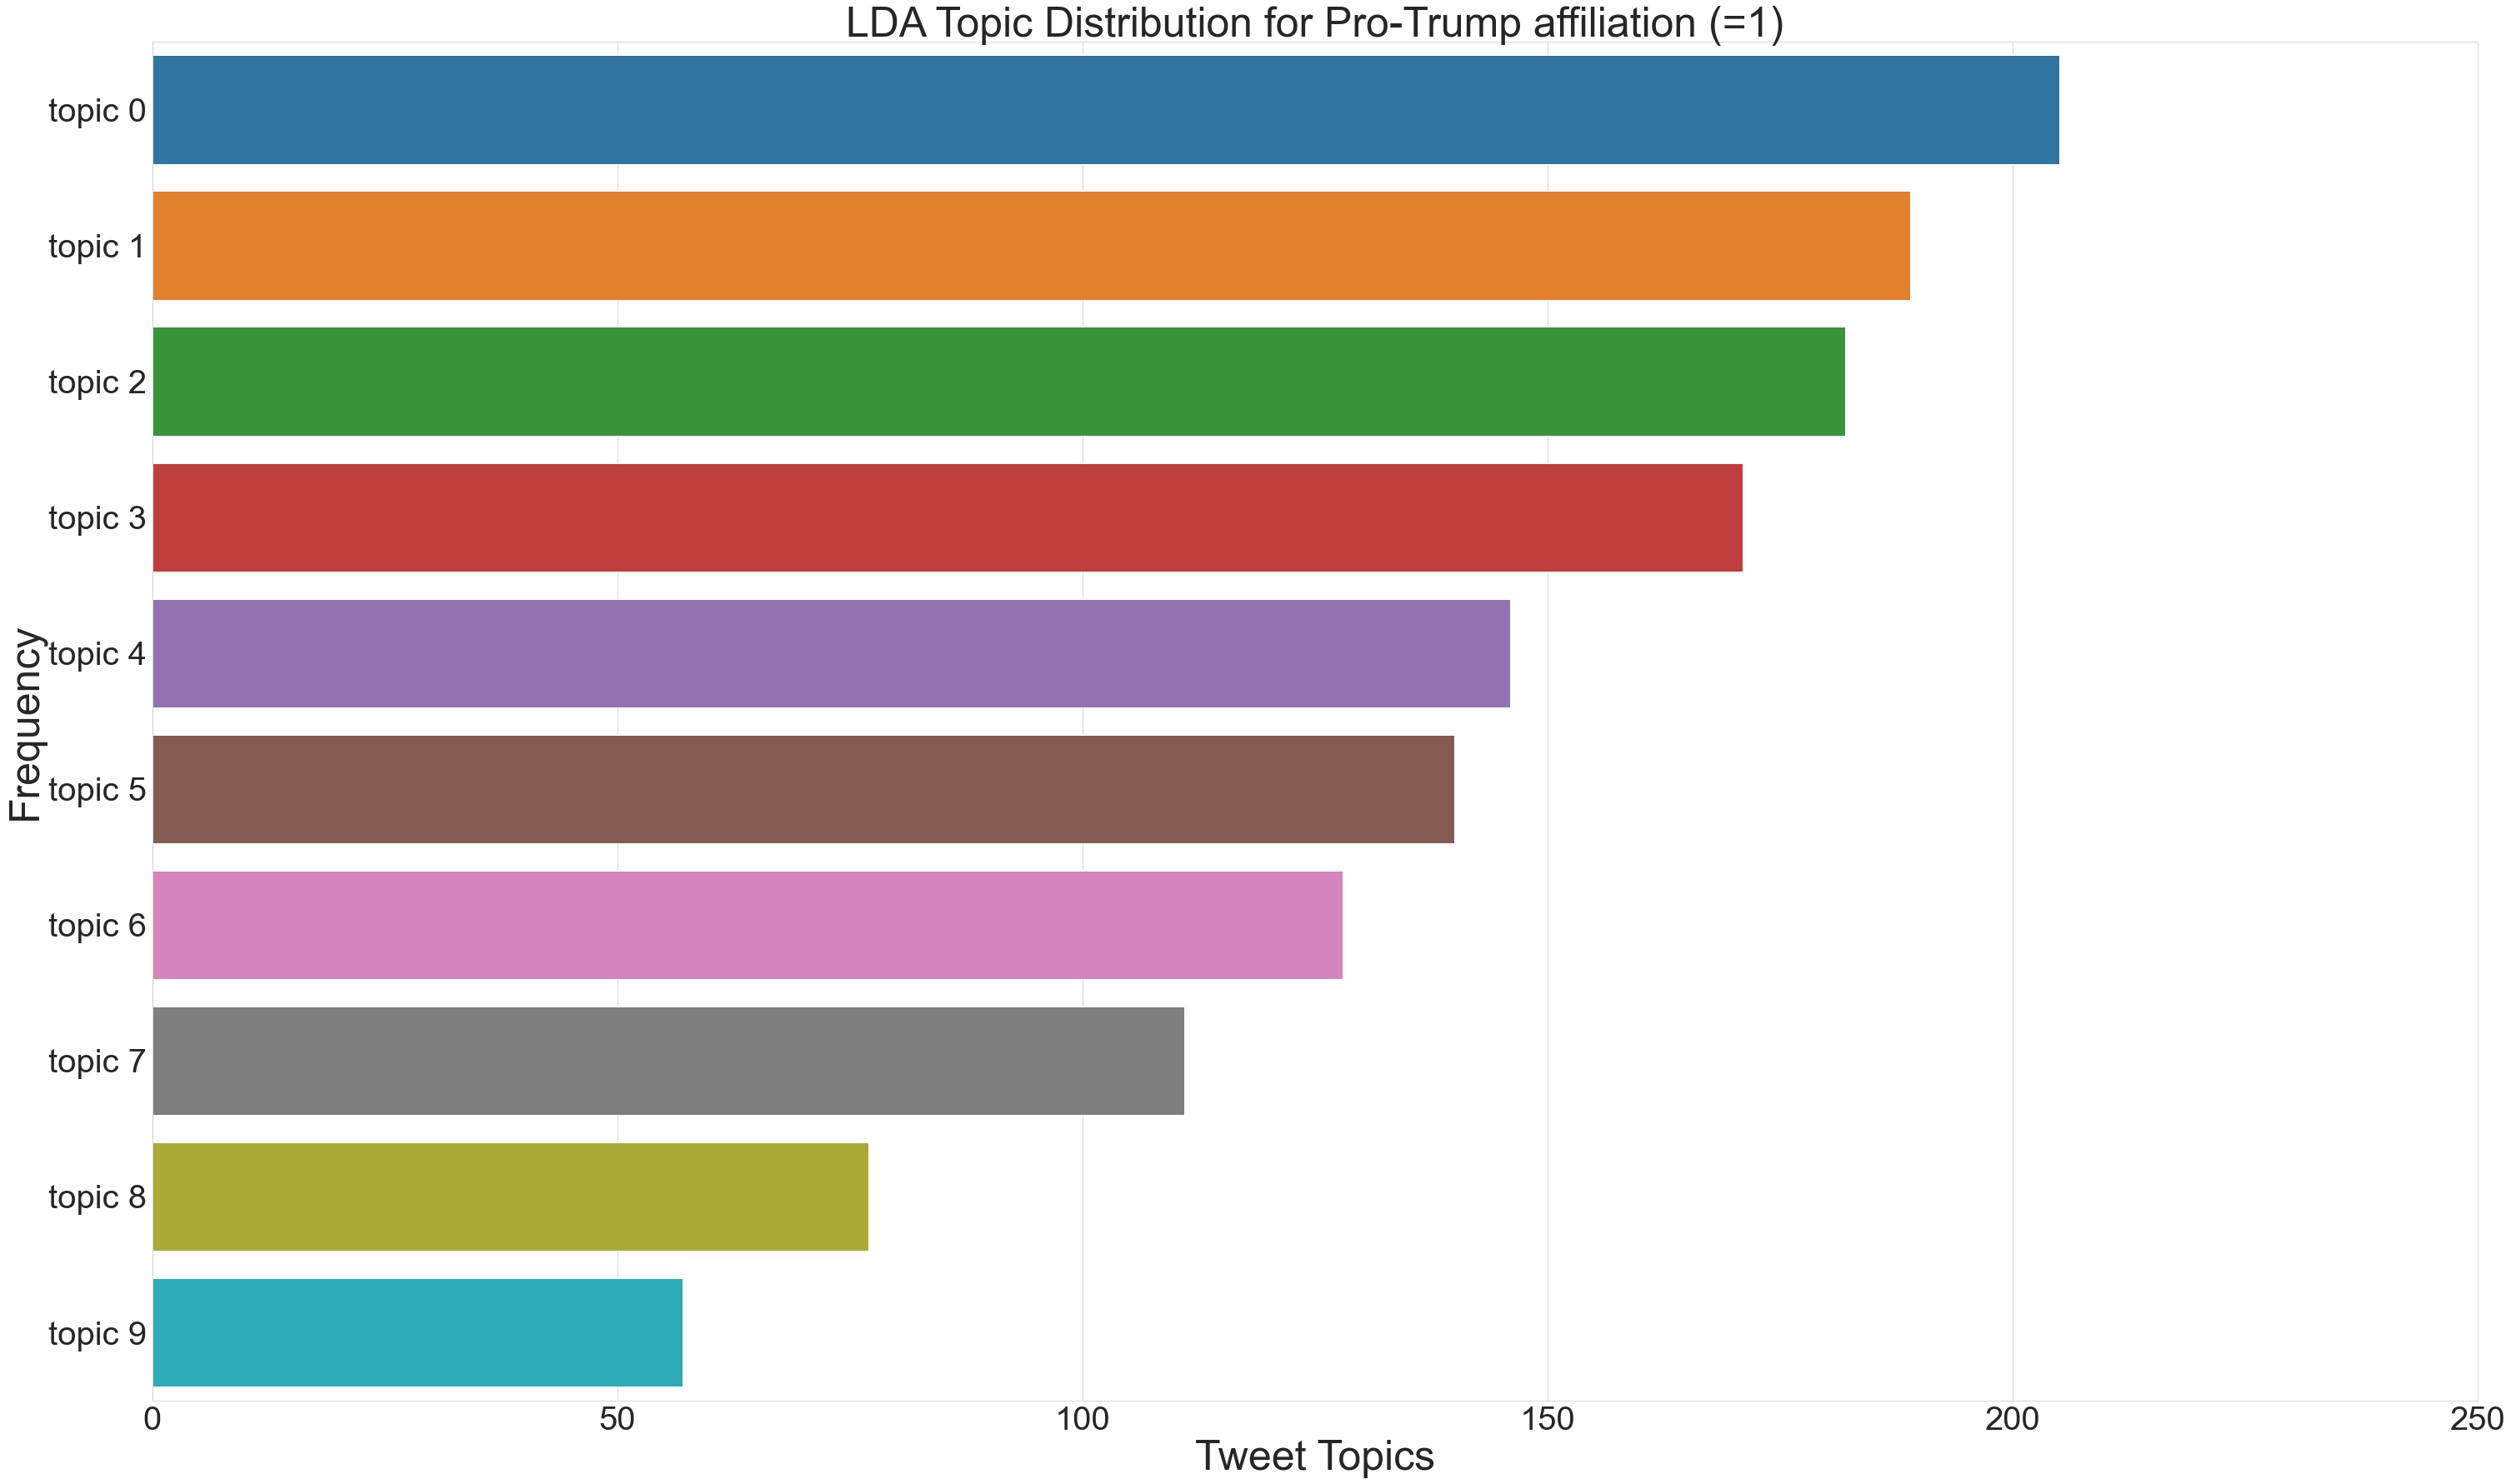

In [55]:
# Let's try to split by Affiliation:

# reset this since we've added new columns to ctweets_df (NMF & LDA topics):
labeled_ctweets_df = ctweets_df[:4002]

ctweets_df_pro_trump = labeled_ctweets_df.loc[labeled_ctweets_df['Affiliation']==1]
lda_prot_x = ctweets_df_pro_trump['lda_topics'].value_counts()
lda_prot_y = lda_prot_x.sort_index()

plt.figure(figsize=(50,30))

sns.barplot(lda_prot_x, lda_prot_y.index)

plt.title("LDA Topic Distribution for Pro-Trump affiliation (=1)", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Tweet Topics', fontsize=50)
plt.xticks(fontsize=40)
plt.xlim([0,250])

(0.0, 250.0)

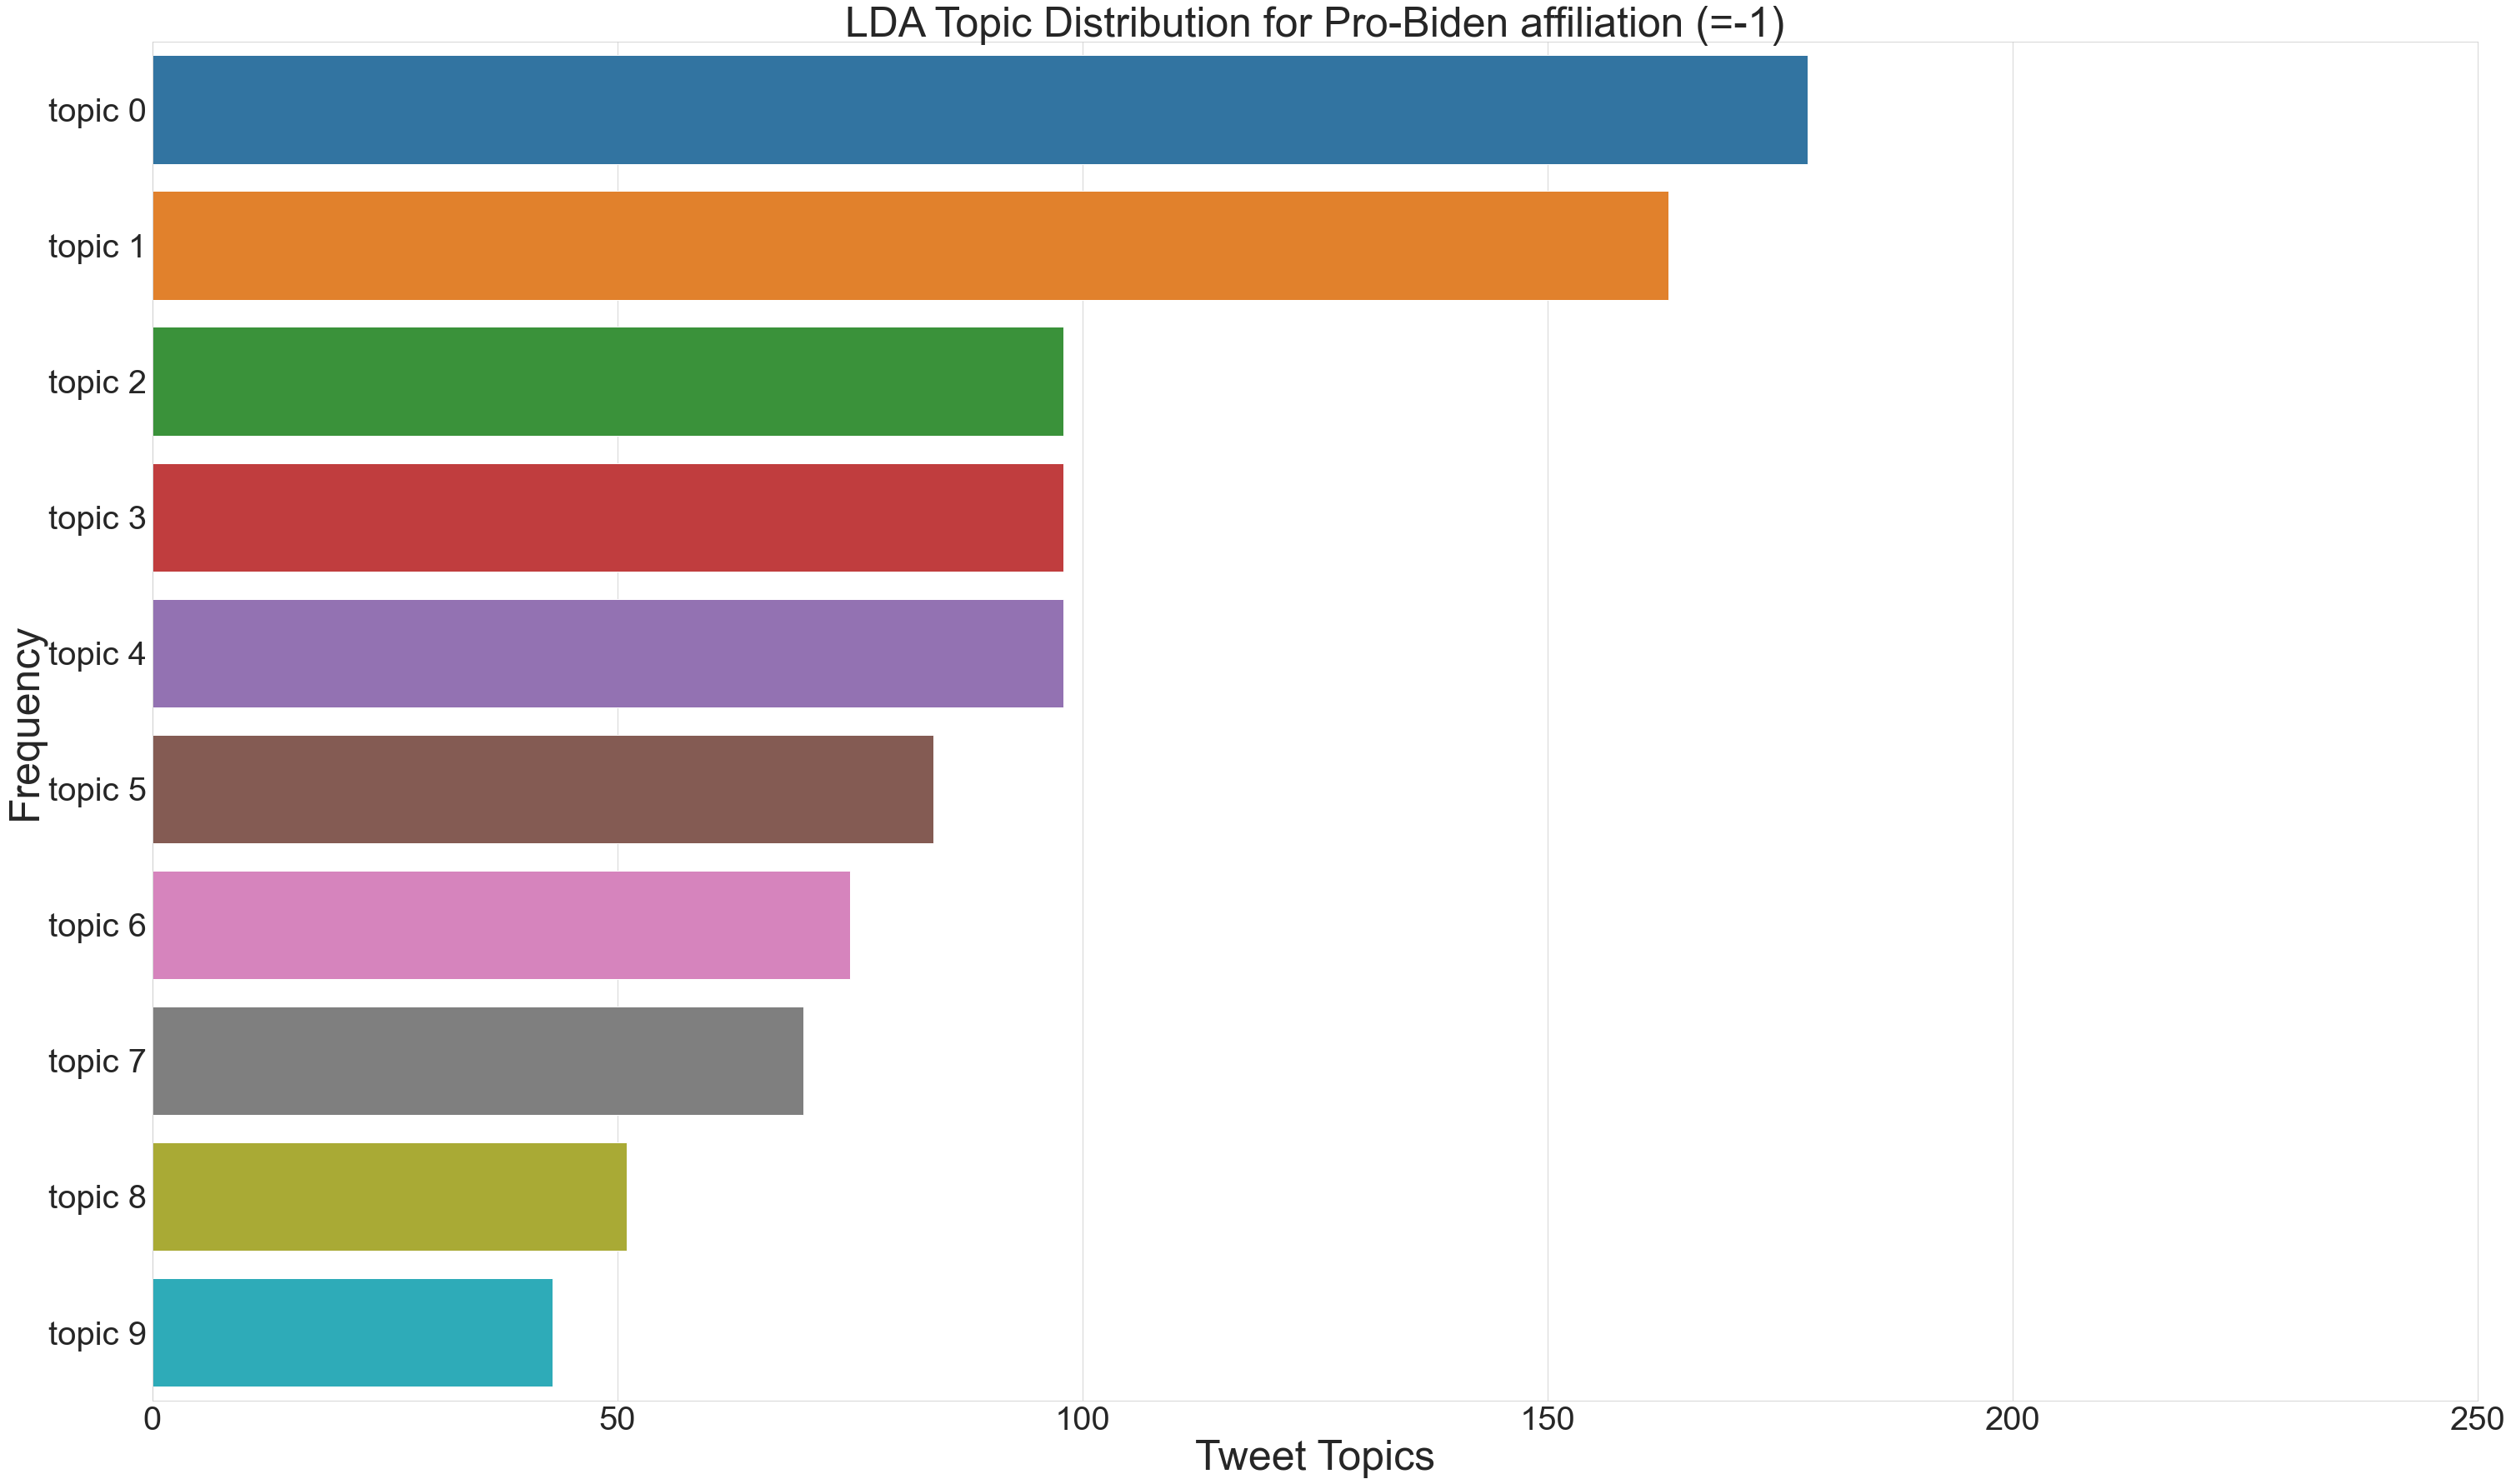

In [56]:
ctweets_df_pro_biden = labeled_ctweets_df.loc[labeled_ctweets_df['Affiliation']==-1]
lda_prob_x = ctweets_df_pro_biden['lda_topics'].value_counts()
lda_prob_y = lda_prob_x.sort_index()

plt.figure(figsize=(50,30))

sns.barplot(lda_prob_x, lda_prob_y.index)

plt.title("LDA Topic Distribution for Pro-Biden affiliation (=-1)", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Tweet Topics', fontsize=50)
plt.xticks(fontsize=40)
plt.xlim([0,250])

In [57]:
# Again, despite the topics being hard to distinguish, we see a greater variety of topics in the
# Pro-Trump/Anti-Biden tweets than in the opposite crowd. The tweets are more greatly concentrated in topics
# 0 and 1 for the Pro-Biden/Anti-Trump crowd.

(0.0, 250.0)

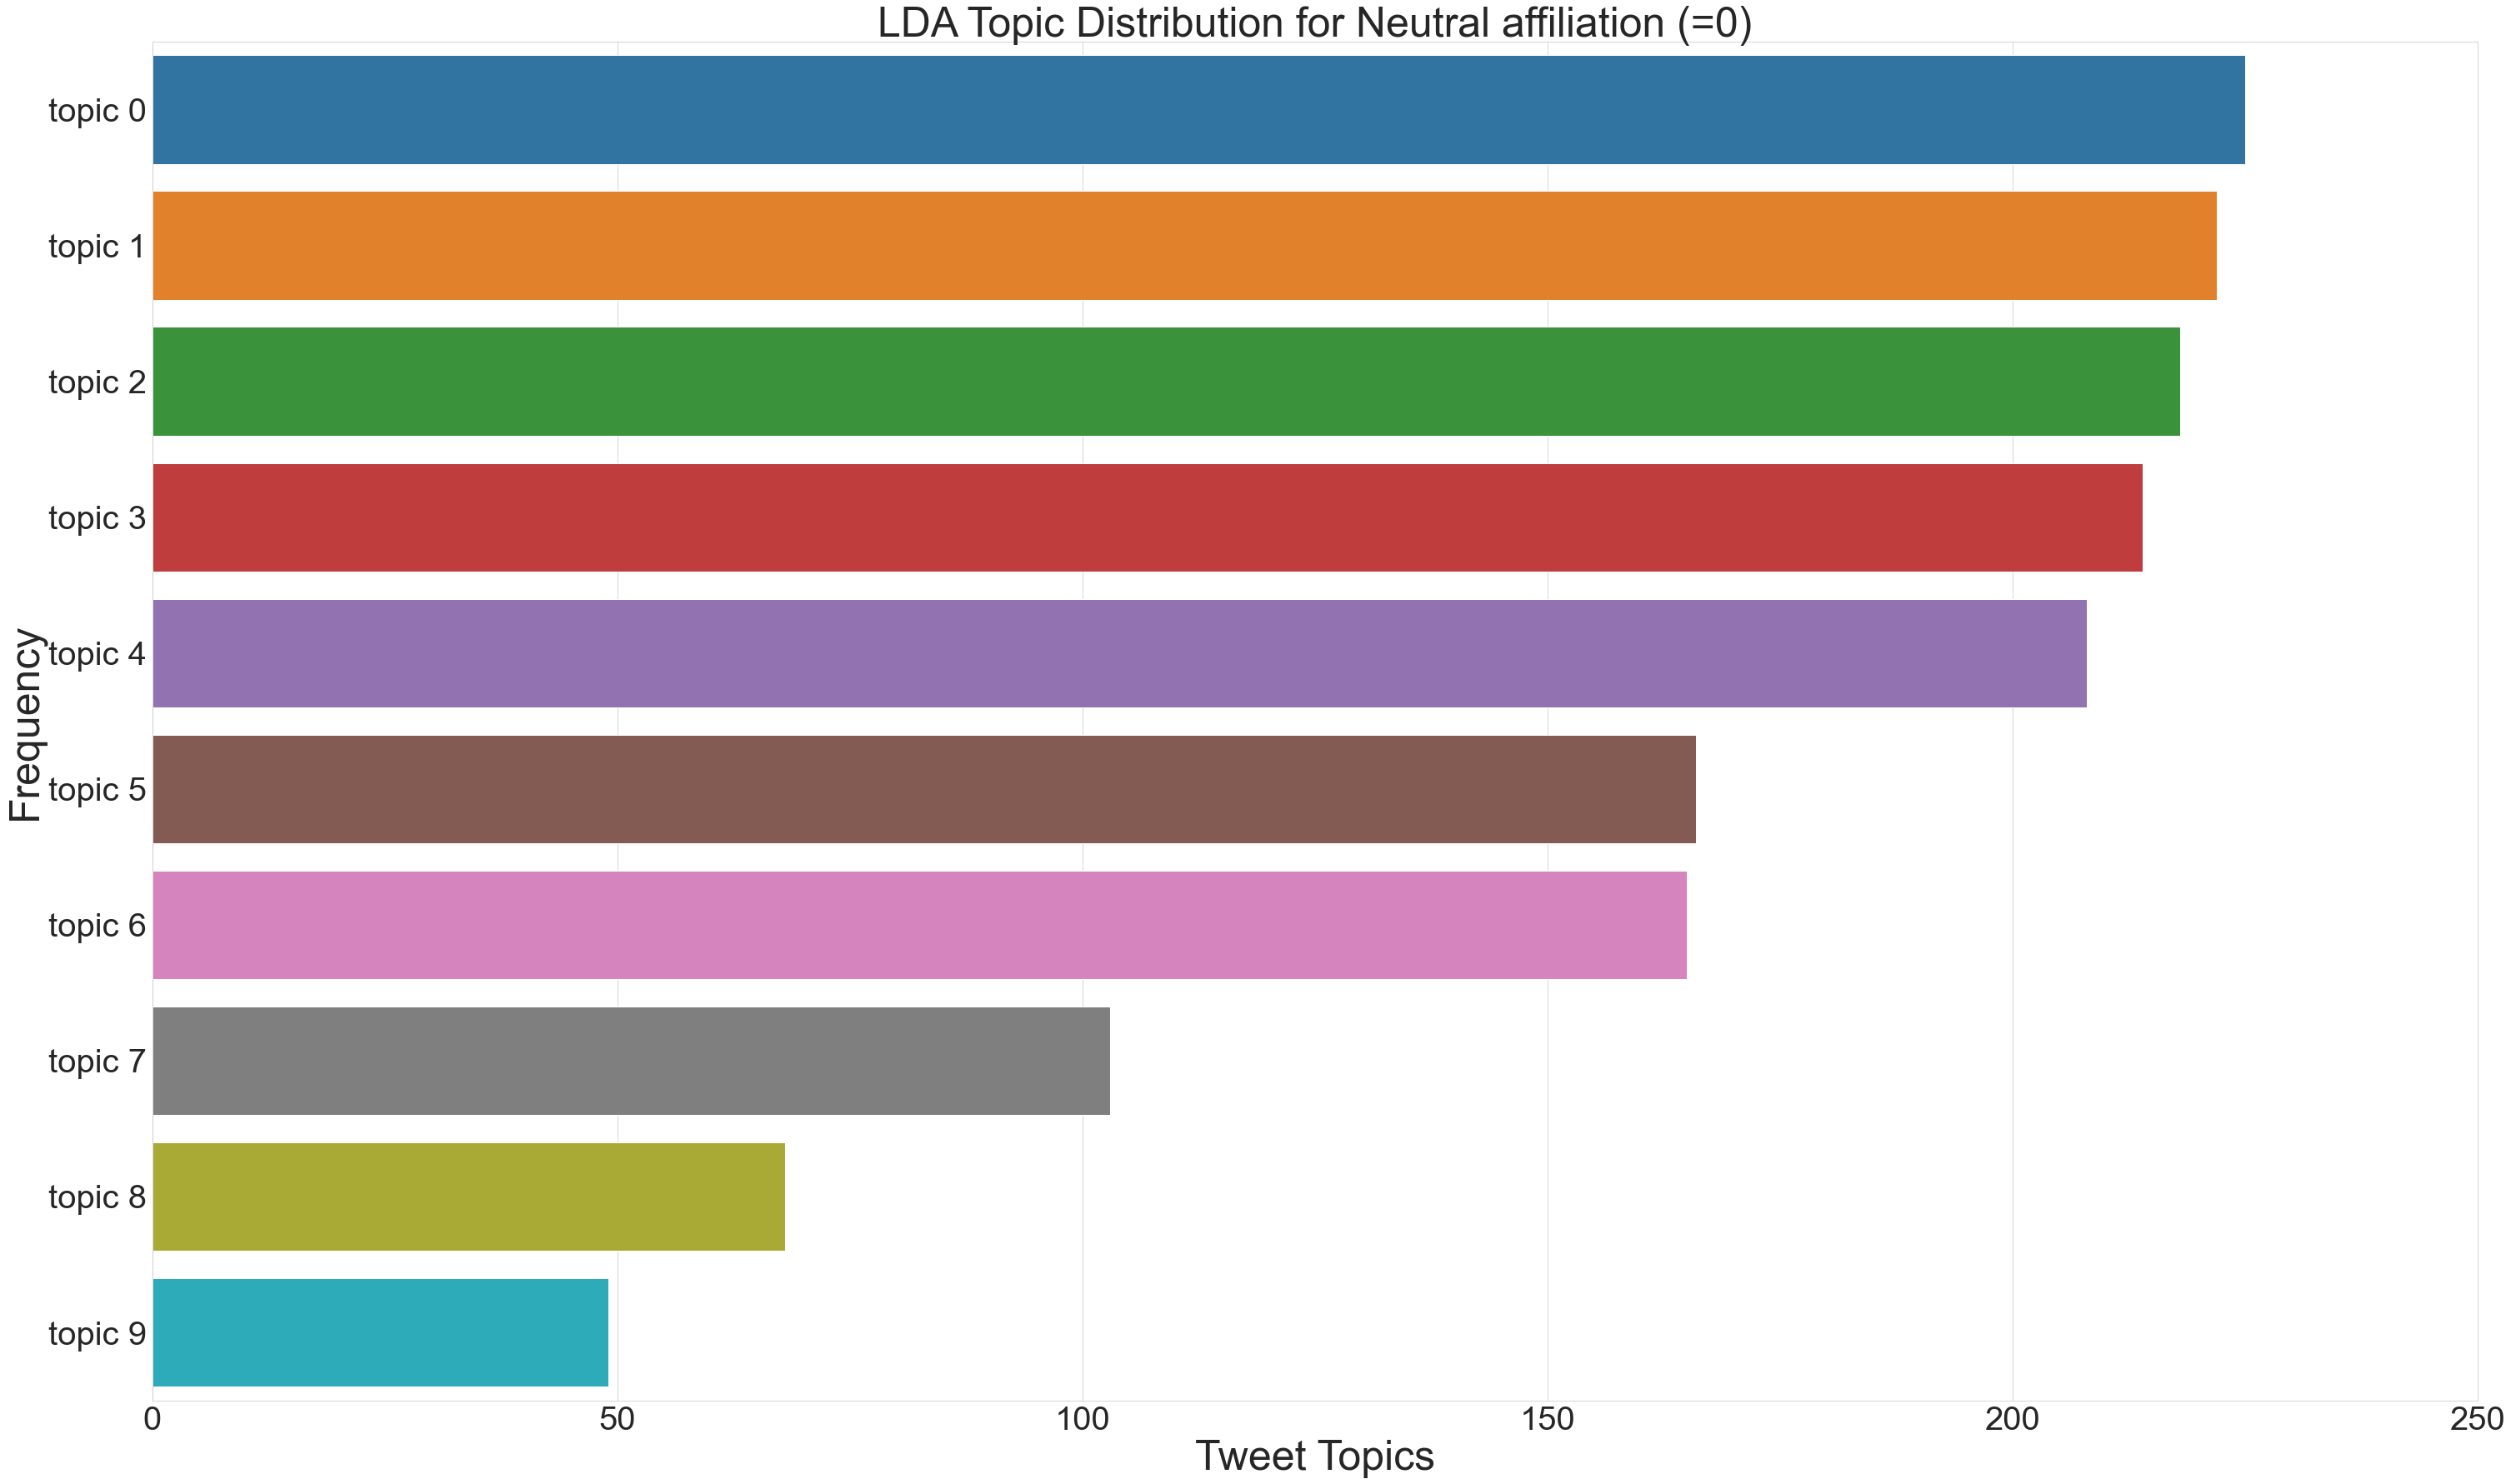

In [58]:
ctweets_df_neut = labeled_ctweets_df.loc[labeled_ctweets_df['Affiliation']==0]
lda_neut_x = ctweets_df_neut['lda_topics'].value_counts()
lda_neut_y = lda_neut_x.sort_index()

plt.figure(figsize=(50,30))

sns.barplot(lda_neut_x, lda_neut_y.index)

plt.title("LDA Topic Distribution for Neutral affiliation (=0)", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Tweet Topics', fontsize=50)
plt.xticks(fontsize=40)
plt.xlim([0,250])

In [59]:
# The distribution of neutral-affiliation tweet topics more closely resembles that of Pro-Trump/Anti-Biden tweet
# topics.

# Note: a possible explanation for the more equitable distributions of Pro-Trump/Anti-Biden tweets in both
# LDA and NMF topic models may be that the latter topics in both NMF and LDA, 5-9 or so, are based around 
# words found in talking points of the Pro-Trump/Anti-Biden position. 

In [60]:
ctweets_df.loc[3001, 'Affiliation']

-1.0

In [61]:
# Now onto various measures of readability, using textstat:
import textstat

ctweets_df.loc[:4001, 'Affiliation'] = ctweets_df.loc[:4001, 'Affiliation'].apply(lambda x: int(x))

ctweets_df['dale_chall_readability'] = ctweets_df['lemma_str'].apply(lambda x: textstat.dale_chall_readability_score(x))
ctweets_df['flesch_reading_ease'] = ctweets_df['lemma_str'].apply(lambda x: textstat.flesch_reading_ease(x))
ctweets_df['gunning_fog'] = ctweets_df['lemma_str'].apply(lambda x: textstat.gunning_fog(x))


In [62]:

print("Dale Chall Readability mean score of Affiliation = 1 tweets:", ctweets_df.loc[ctweets_df['Affiliation'] == 1, 'dale_chall_readability'].mean())
print("Dale Chall Readability mean score of Affiliation = -1 tweets:", ctweets_df.loc[ctweets_df['Affiliation'] == -1, 'dale_chall_readability'].mean())
print("Dale Chall Readability mean score of Affiliation = 0 tweets:", ctweets_df.loc[ctweets_df['Affiliation'] == 0, 'dale_chall_readability'].mean())
print("Dale Chall Readability mean score of all tweets:", ctweets_df['dale_chall_readability'].mean())
print()
print("Flesch Reading Ease mean score of Affiliation = 1 tweets:", ctweets_df.loc[ctweets_df['Affiliation'] == 1, 'flesch_reading_ease'].mean())
print("Flesch Reading Ease mean score of Affiliation = -1 tweets:", ctweets_df.loc[ctweets_df['Affiliation'] == -1, 'flesch_reading_ease'].mean())
print("Flesch Reading Ease mean score of Affiliation = 0 tweets:", ctweets_df.loc[ctweets_df['Affiliation'] == 0, 'flesch_reading_ease'].mean())
print("Flesch Reading Ease mean score of all tweets:", ctweets_df['flesch_reading_ease'].mean())
print()
print("Gunning Fog mean score of Affiliation = 1 tweets:", ctweets_df.loc[ctweets_df['Affiliation'] == 1, 'gunning_fog'].mean())
print("Gunning Fog mean score of Affiliation = -1 tweets:", ctweets_df.loc[ctweets_df['Affiliation'] == -1, 'gunning_fog'].mean())
print("Gunning Fog mean score of Affiliation = 0 tweets:", ctweets_df.loc[ctweets_df['Affiliation'] == 0, 'gunning_fog'].mean())
print("Gunning Fog mean score of all tweets:", ctweets_df['gunning_fog'].mean())

Dale Chall Readability mean score of Affiliation = 1 tweets: 10.345440967283071
Dale Chall Readability mean score of Affiliation = -1 tweets: 10.187338204592901
Dale Chall Readability mean score of Affiliation = 0 tweets: 9.432277167277167
Dale Chall Readability mean score of all tweets: 9.982529331133982

Flesch Reading Ease mean score of Affiliation = 1 tweets: 42.60598862019915
Flesch Reading Ease mean score of Affiliation = -1 tweets: 38.57620041753653
Flesch Reading Ease mean score of Affiliation = 0 tweets: 44.32152014652014
Flesch Reading Ease mean score of all tweets: 42.380631926213326

Gunning Fog mean score of Affiliation = 1 tweets: 11.581500711237554
Gunning Fog mean score of Affiliation = -1 tweets: 13.477828810020878
Gunning Fog mean score of Affiliation = 0 tweets: 11.493394383394383
Gunning Fog mean score of all tweets: 11.947891875566292


In [63]:
# This measures the reading grade-level required to understand the text:

ctweets_df['text_standard'] = ctweets_df['lemma_str'].apply(lambda x: textstat.text_standard(x))


In [64]:
print("Text Standard mode of Affiliation = 1 tweets:", ctweets_df.loc[ctweets_df['Affiliation'] == 1, 'text_standard'].mode())
print("Text Standard mode of Affiliation = -1 tweets:", ctweets_df.loc[ctweets_df['Affiliation'] == -1, 'text_standard'].mode())
print("Text Standard mode of Affiliation = 0 tweets:", ctweets_df.loc[ctweets_df['Affiliation'] == 0, 'text_standard'].mode())
print("Text Standard mode of all tweets:", ctweets_df['text_standard'].mode())

Text Standard mode of Affiliation = 1 tweets: 0    11th and 12th grade
dtype: object
Text Standard mode of Affiliation = -1 tweets: 0    11th and 12th grade
dtype: object
Text Standard mode of Affiliation = 0 tweets: 0    11th and 12th grade
dtype: object
Text Standard mode of all tweets: 0    11th and 12th grade
dtype: object


In [96]:
ctweets_df.columns[:20]

Index(['id', 'created_at', 'screen_name', 'lemmatized', 'Affiliation',
       'lemma_str', 'sentiment', 'word_count', 'tweet_len', 'nmf_topics',
       'lda_topics', 'dale_chall_readability', 'flesch_reading_ease',
       'gunning_fog', 'text_standard'],
      dtype='object')

In [65]:
# All tweets are roughly the same readability, even though we saw slight variations in each of the 3 prior 
# measures. The text_standard is an amalgamation of some of these formulas above, so we'll trust it to be a 
# good representation.


In [66]:
# -----------------------------------------------------------------------------------------------
# Let's move on to a word-bagging approach, to actually extend the labelling beyond index = 4001. 
# -----------------------------------------------------------------------------------------------

print(len(allwords))

654103


In [67]:
# Get rid of duplicates:
allwords_no_dupe = []

for word in allwords:
    if word not in allwords_no_dupe:
        allwords_no_dupe.append(word)

In [68]:
# This is how many unique words we have for word-bagging:

print(len(allwords_no_dupe))

14528


In [69]:
ctweets_df.head()

id                      created_at    screen_name  \
0  1325981321957675008  Tue Nov 10 01:59:17 +0000 2020  LimaCharlie88   
1  1325981321991217153  Tue Nov 10 01:59:17 +0000 2020  TurnItRed2020   
2  1325981321760530432  Tue Nov 10 01:59:17 +0000 2020    DeansherryS   
3  1325981322054021120  Tue Nov 10 01:59:17 +0000 2020       JJDianeM   
4  1325981322062430208  Tue Nov 10 01:59:17 +0000 2020  justbeyou_100   

                                          lemmatized  Affiliation  \
0  [point, take, biden, election, fairly, convinc...         -1.0   
1  [white, liberal, go, black, city, find, black,...          1.0   
2  [trump's, election, challenge, continue, campa...         -1.0   
3  [six, jones, day, lawyer, say, give, small, nu...         -1.0   
4  [try, best, david, actually, relieve, happy, g...          0.0   

                                           lemma_str  sentiment  word_count  \
0      point take biden election fairly convincingly   0.500000           6   
1  white liberal go black city find black folk st...  -0.095238          28   
2  trump's election challenge continue campaign a...   0.000000           9   
3  six jones day lawyer say give small number lat...  -0.027778          24   
4  try best david actually relieve happy get sooo...   0.539286          15   

   tweet_len nmf_topics lda_topics  dale_chall_readability  \
0         45    topic 3    topic 7                   11.83   
1        173    topic 5    topic 4                    7.84   
2         67    topic 6    topic 9                   11.10   
3        168    topic 8    topic 8                    9.58   
4         88    topic 5    topic 1                    8.59   

   flesch_reading_ease  gunning_fog        text_standard  
0                48.47         9.07    7th and 8th grade  
1                59.98        12.63  12th and 13th grade  
2                53.88         8.04    7th and 8th grade  
3                31.21        16.16  16th and 17th grade  
4                56.25         8.67    8th and 9th grade

In [70]:
# The wordbagged df based on Term Frequency — Inverse Document Frequency:
ctweets_wb_tfidf_df = pd.concat([ctweets_df, doc_term_matrix_tfidf], axis=1)
# The wordbagged df based on CountVectorizer:
ctweets_wb_cv_df = pd.concat([ctweets_df, doc_term_matrix], axis=1)

# '00' is the first entry of the wordbagging:
ctweets_wb_cv_df.loc[:,'00':]

00  000  09  10  100  1000  109  10m  11  118  ...  york  you  young  \
0       0    0   0   0    0     0    0    0   0    0  ...     0    0      0   
1       0    0   0   0    0     0    0    0   0    0  ...     0    0      0   
2       0    0   0   0    0     0    0    0   0    0  ...     0    0      0   
3       0    0   0   0    0     0    0    0   0    0  ...     0    0      0   
4       0    0   0   0    0     0    0    0   0    0  ...     0    0      0   
...    ..  ...  ..  ..  ...   ...  ...  ...  ..  ...  ...   ...  ...    ...   
43038   1    0   0   0    0     0    0    0   0    0  ...     0    0      0   
43039   0    0   0   0    0     0    0    0   0    0  ...     0    0      0   
43040   0    0   0   0    0     0    0    0   0    0  ...     0    0      0   
43041   0    0   0   0    0     0    0    0   0    0  ...     0    0      0   
43042   0    0   0   0    0     0    0    0   0    0  ...     0    0      0   

       youth  youtube  yr  zero  zoom  zuckerberg  zuckerbooger  
0          0        0   0     0     0           0             0  
1          0        0   0     0     0           0             0  
2          0        0   0     0     0           0             0  
3          0        0   0     0     0           0             0  
4          0        0   0     0     0           0             0  
...      ...      ...  ..   ...   ...         ...           ...  
43038      0        0   0     0     0           0             0  
43039      0        0   0     0     0           0             0  
43040      0        0   0     0     0           0             0  
43041      0        0   0     0     0           0             0  
43042      0        0   0     0     0           0             0  

[43043 rows x 2907 columns]

In [71]:
train = ctweets_wb_cv_df.loc[:4001]
test = ctweets_wb_cv_df.drop(train.index)

print(np.shape(ctweets_wb_cv_df))

(43043, 2922)


In [72]:
# Let's see what features we'll be using in PCA and the following predictive models:

print(ctweets_wb_cv_df.columns[:20])
print()
print(ctweets_wb_cv_df.columns[2902:])

# Note that the TF-IDF word-bagged data has the same columns, just different entries for the doc-term-matrix
# portion of the dataframe.

# Features to use: 'sentiment', 'tweet_len' (highly correlated with 'word_count'), 'nmf_topics' (one-hot encoded),
# and '00':'zuckerbooger' aka the word-bagging
# vector columns.
# This is columns[6, 8, 9 [to be one-hot-encoded], and 15:]

# We choose NMF topics over LDA topics because the contrast between Affiliation vs. NMF topics seems greater than
# with LDA topics.

# Also we exclude 11-13 since the readability scores seemed not to differentiate between the affiliations


Index(['id', 'created_at', 'screen_name', 'lemmatized', 'Affiliation',
       'lemma_str', 'sentiment', 'word_count', 'tweet_len', 'nmf_topics',
       'lda_topics', 'dale_chall_readability', 'flesch_reading_ease',
       'gunning_fog', 'text_standard', '00', '000', '09', '10', '100'],
      dtype='object')

Index(['wtf', 'ya', 'yeah', 'year', 'yell', 'yep', 'yes', 'yesterday', 'yet',
       'yo', 'york', 'you', 'young', 'youth', 'youtube', 'yr', 'zero', 'zoom',
       'zuckerberg', 'zuckerbooger'],
      dtype='object')


In [73]:
# One-hot encoding the NMF topics:

ctweets_wb_cv_df['nmf_topic_0'] = pd.get_dummies(ctweets_wb_cv_df['nmf_topics'])['topic 0']
ctweets_wb_cv_df['nmf_topic_1'] = pd.get_dummies(ctweets_wb_cv_df['nmf_topics'])['topic 1']
ctweets_wb_cv_df['nmf_topic_2'] = pd.get_dummies(ctweets_wb_cv_df['nmf_topics'])['topic 2']
ctweets_wb_cv_df['nmf_topic_3'] = pd.get_dummies(ctweets_wb_cv_df['nmf_topics'])['topic 3']
ctweets_wb_cv_df['nmf_topic_4'] = pd.get_dummies(ctweets_wb_cv_df['nmf_topics'])['topic 4']
ctweets_wb_cv_df['nmf_topic_5'] = pd.get_dummies(ctweets_wb_cv_df['nmf_topics'])['topic 5']
ctweets_wb_cv_df['nmf_topic_6'] = pd.get_dummies(ctweets_wb_cv_df['nmf_topics'])['topic 6']
ctweets_wb_cv_df['nmf_topic_7'] = pd.get_dummies(ctweets_wb_cv_df['nmf_topics'])['topic 7']
ctweets_wb_cv_df['nmf_topic_8'] = pd.get_dummies(ctweets_wb_cv_df['nmf_topics'])['topic 8']

ctweets_wb_tfidf_df['nmf_topic_0'] = pd.get_dummies(ctweets_wb_tfidf_df['nmf_topics'])['topic 0']
ctweets_wb_tfidf_df['nmf_topic_1'] = pd.get_dummies(ctweets_wb_tfidf_df['nmf_topics'])['topic 1']
ctweets_wb_tfidf_df['nmf_topic_2'] = pd.get_dummies(ctweets_wb_tfidf_df['nmf_topics'])['topic 2']
ctweets_wb_tfidf_df['nmf_topic_3'] = pd.get_dummies(ctweets_wb_tfidf_df['nmf_topics'])['topic 3']
ctweets_wb_tfidf_df['nmf_topic_4'] = pd.get_dummies(ctweets_wb_tfidf_df['nmf_topics'])['topic 4']
ctweets_wb_tfidf_df['nmf_topic_5'] = pd.get_dummies(ctweets_wb_tfidf_df['nmf_topics'])['topic 5']
ctweets_wb_tfidf_df['nmf_topic_6'] = pd.get_dummies(ctweets_wb_tfidf_df['nmf_topics'])['topic 6']
ctweets_wb_tfidf_df['nmf_topic_7'] = pd.get_dummies(ctweets_wb_tfidf_df['nmf_topics'])['topic 7']
ctweets_wb_tfidf_df['nmf_topic_8'] = pd.get_dummies(ctweets_wb_tfidf_df['nmf_topics'])['topic 8']

# so now the columns to include are [6, 8, 11, 12, 13, and 15:], where [15:2921] inclusive is the word-bagged data.
# 2930 is the last column.

# Note: we get rid of multicollinearity by not including the one-hot-encoded nmf_topic_9 column.

# We also remove 11-13 since the readability scores did not seem to differentiate between the affiliations.

col_indexes = [6, 8] + [*range(15,2931)]
use_columns = [ctweets_wb_cv_df.columns[i] for i in col_indexes]
# These are the columns to use.

print("Number of features:", len(use_columns))

Number of features: 2918


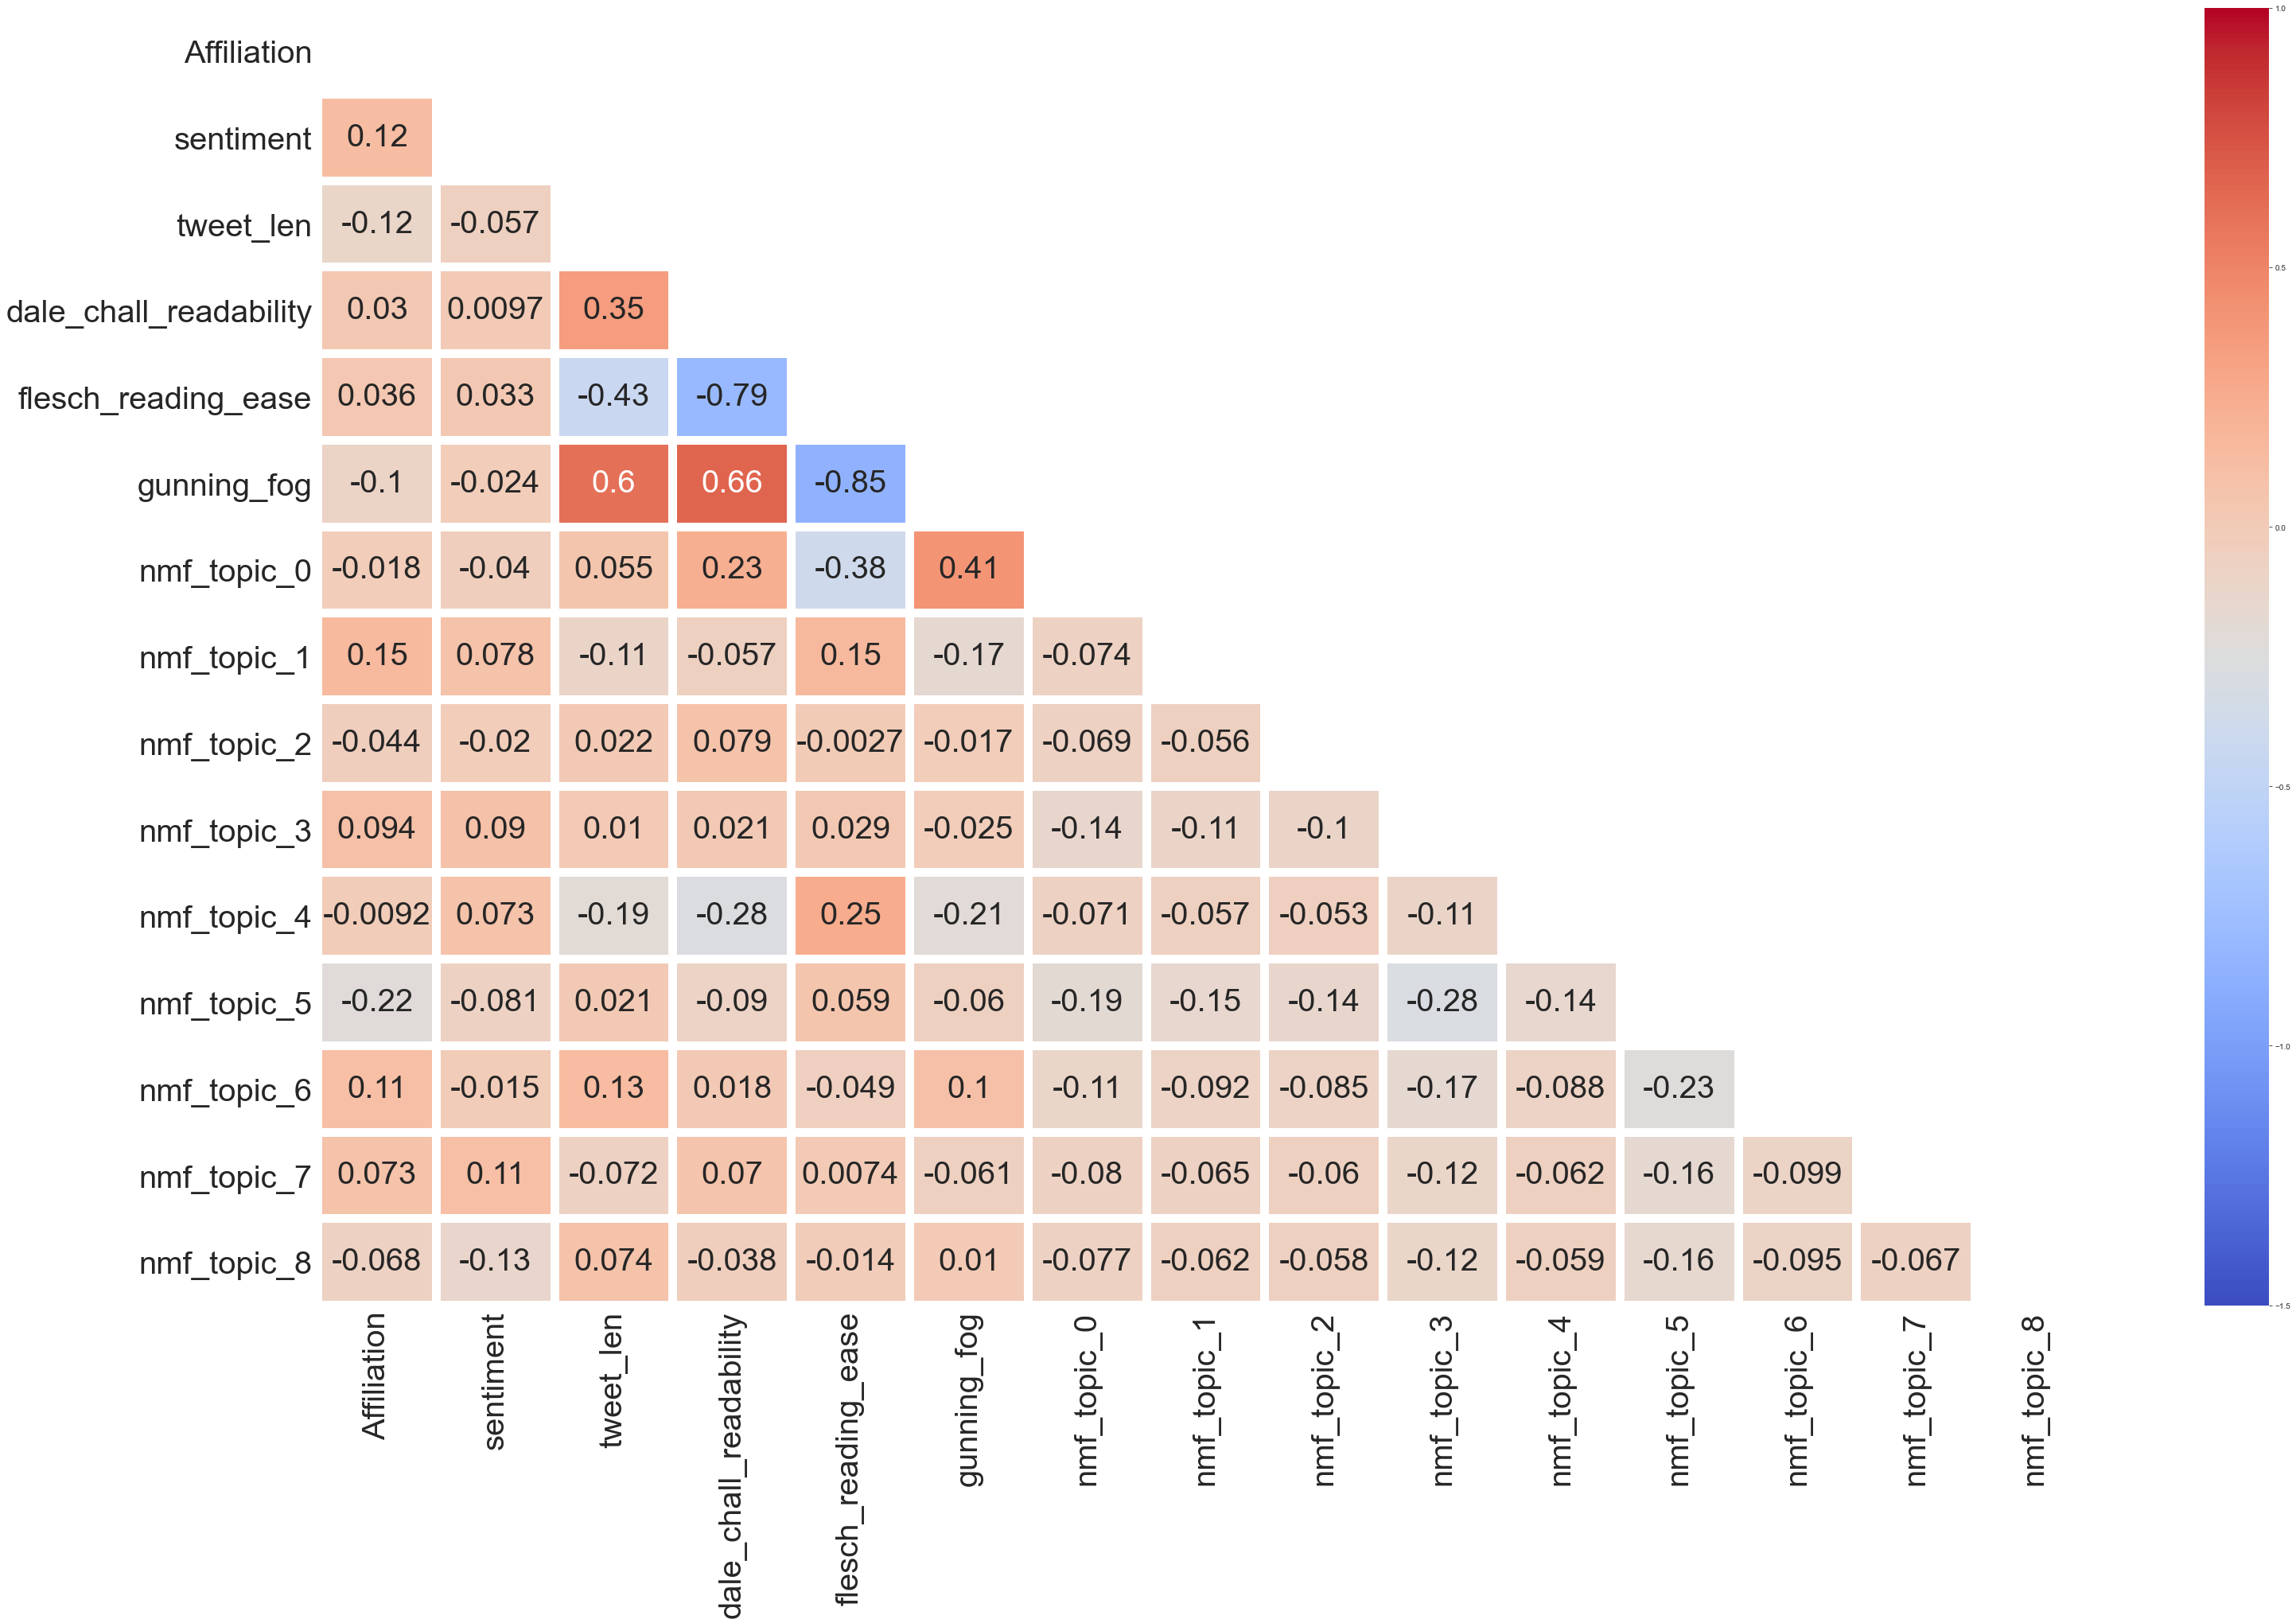

In [113]:
# Plot correlations to see what features to use (or rather check that we've selected the right ones.)

# Reset this as we've added columns to ctweets_df:
labeled_ctweets_df = ctweets_wb_cv_df[:4002]

corr_columns = ['Affiliation'] + use_columns[0:2] + ['dale_chall_readability', 'flesch_reading_ease', 'gunning_fog'] + use_columns[2909:]

correlation = labeled_ctweets_df[corr_columns].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,30))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)

In [ ]:
# Affiliation has some correlation with some of the topics, and sentiment, tweet_len, and we assume the vector
# of words given by word-bagging. We will use 0.1 as the cutoff for a useful amount of correlation.

# Thus we throw away all the readability scores ()'dale_chall_readability', 'flesch_reading_ease', 'gunning_fog').

In [75]:
# We have 2908 words in the word bag, we'll use PCA to shrink this for performance.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#n_components has to be <= min(n_features, n_samples) = 2919
pipe = Pipeline([('scale', StandardScaler()),('pca', PCA(n_components=2919))])

X = ctweets_wb_cv_df[use_columns]

pipe.fit(X)


Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2919,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

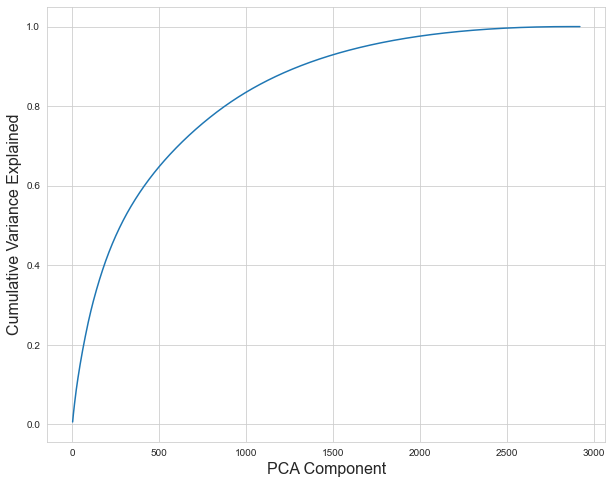

In [76]:
plt.figure(figsize=(10,8))

plt.plot(range(1,2920), np.cumsum(pipe['pca'].explained_variance_ratio_))

plt.xlabel("PCA Component", fontsize=16)
plt.ylabel("Cumulative Variance Explained", fontsize=16)

plt.show()

In [77]:
# For only 1500 components we get >90% cumulative variance explained, so we'll go with 1500 components in PCA.

In [78]:
pca_pipe = Pipeline([('scale', StandardScaler()),('pca', PCA(n_components=1500))])

X_pca = pca_pipe.fit_transform(X)

In [79]:
np.shape(X_pca)

(43043, 1500)

In [80]:
# An aside: perhaps for one run we should not use PCA. While it will be slower not to reduce dimension, it will
# also allow us to trace which words (as opposed to their PCA components) are good predictors of affiliation.

In [81]:
X_pca_df = pd.DataFrame(X_pca)
ctweets_wbPCA_cv_df = pd.concat([ctweets_df, X_pca_df], axis=1)

In [82]:
# Now for tfidf wordbagging:
pipe2 = Pipeline([('scale', StandardScaler()),('pca', PCA(n_components=2919))])

train2 = ctweets_wb_tfidf_df.loc[:4001]
test2 = ctweets_wb_tfidf_df.drop(train.index)

X2 = ctweets_wb_tfidf_df[use_columns]
pipe2.fit(X2)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2919,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

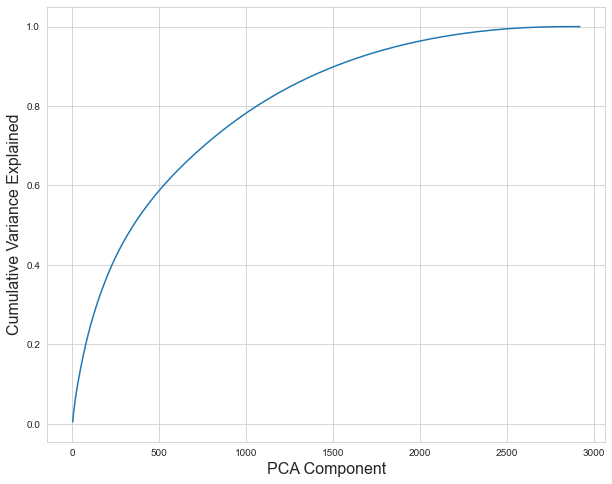

In [84]:
plt.figure(figsize=(10,8))

plt.plot(range(1,2920), np.cumsum(pipe2['pca'].explained_variance_ratio_))

plt.xlabel("PCA Component", fontsize=16)
plt.ylabel("Cumulative Variance Explained", fontsize=16)

plt.show()

In [85]:
# This CVE vs PCA component graph shows lower CVE per component than the countvectorizer wordbagged one. I 
# believe that's because there is more variance in this data, as the word bagging components can vary continuously
# rather than discretely.
# For only 1500 components we get ~90% cumulative variance explained, so we'll go with 1500 components in PCA.

In [86]:
pca_pipe = Pipeline([('scale', StandardScaler()),('pca', PCA(n_components=1500))])

X2_pca = pca_pipe.fit_transform(X2)

In [87]:
# -------------------------------------------------------------------------------
# Now onto predicting. Models to check: LDA, RF, SVM, Neural nets, Ensembles.
# -------------------------------------------------------------------------------

from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_train = ctweets_wb_cv_df.loc[:4001,'Affiliation'].apply(lambda x: int(x))
y_test = ctweets_wb_cv_df.loc[4002:,'Affiliation'] # all NaNs...Won't use this.

X_train = ctweets_wb_cv_df.loc[:4001,use_columns]
X_test = ctweets_wb_cv_df.loc[4002:,use_columns]
X_pca_train = X_pca[:4002, :]
X_pca_test = X_pca[4003:, :]

X2_train = ctweets_wb_tfidf_df.loc[:4001,use_columns]
X2_test = ctweets_wb_tfidf_df.loc[4002:,use_columns]
X2_pca_train = X2_pca[:4002, :]
X2_pca_test = X2_pca[4003:, :]

scoring = ['accuracy','precision_macro','recall_macro']

In [192]:
# LDA:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Not sure if scaling should be done first but we'll try it. It can't hurt and it would make sense for LDA to
# need it, as it is a dimension reducing algorithm.
lda_pipe = Pipeline([('scale',StandardScaler()),('lda', LinearDiscriminantAnalysis())])

# Note: no hyperparameters need to be set here, since we're not using the n_components of LDA as that is only
# for the transform function of LDA, which is for dimensionality reduction and not prediction. Perhaps we should
# try LDA or QDA as dimensionality reduction instead of PCA.

# Another note: should we include tweet_len, word_count, and sentiment as features?...Not yet...

# Cross-validation:
scoring = ['accuracy','precision_macro','recall_macro']
# We use macro-averaged precision and recall since the affiliation distribution graph in the beginning 
# showed similar numbers of each class (no class imbalance) within the training data.

scores = cross_validate(lda_pipe, X_train, y_train, scoring = scoring, cv = 5)
scores2 = cross_validate(lda_pipe, X2_train, y_train, scoring = scoring, cv = 5)
scorespca = cross_validate(lda_pipe, X_pca_train, y_train, scoring = scoring, cv = 5)
scores2pca = cross_validate(lda_pipe, X2_pca_train, y_train, scoring = scoring, cv = 5)

c:\python3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
numpy.linalg.LinAlgError: SVD did not converge

  FitFailedWarning)


In [193]:
print("Accuracy of CV-WB LDA:",np.round(np.average(scores['test_accuracy']),5))
print("Macro-precision of CV-WB LDA:",np.round(np.average(scores['test_precision_macro']),5))
print("Macro-recall of CV-WB LDA:",np.round(np.average(scores['test_recall_macro']),5))
print()
print("Accuracy of TF-IDF-WB LDA:",np.round(np.average(scores2['test_accuracy']),5))
print("Macro-precision of TF-IDF-WB LDA:",np.round(np.average(scores2['test_precision_macro']),5))
print("Macro-recall of TF-IDF-WB LDA:",np.round(np.average(scores2['test_recall_macro']),5))
print()
print("Accuracy of CV-WB LDA with PCA:",np.round(np.average(scorespca['test_accuracy']),5))
print("Macro-precision of CV-WB LDA with PCA:",np.round(np.average(scorespca['test_precision_macro']),5))
print("Macro-recall of CV-WB LDA with PCA:",np.round(np.average(scorespca['test_recall_macro']),5))
print()
print("Accuracy of TF-IDF-WB LDA with PCA:",np.round(np.average(scores2pca['test_accuracy']),5))
print("Macro-precision of TF-IDF-WB LDA with PCA:",np.round(np.average(scores2pca['test_precision_macro']),5))
print("Macro-recall of TF-IDF-WB LDA with PCA:",np.round(np.average(scores2pca['test_recall_macro']),5))

Accuracy of CV-WB LDA: 0.76811
Macro-precision of CV-WB LDA: 0.76068
Macro-recall of CV-WB LDA: 0.7655

Accuracy of TF-IDF-WB LDA: nan
Macro-precision of TF-IDF-WB LDA: nan
Macro-recall of TF-IDF-WB LDA: nan

Accuracy of CV-WB LDA with PCA: 0.75137
Macro-precision of CV-WB LDA with PCA: 0.74241
Macro-recall of CV-WB LDA with PCA: 0.74828

Accuracy of TF-IDF-WB LDA with PCA: 0.74562
Macro-precision of TF-IDF-WB LDA with PCA: 0.73954
Macro-recall of TF-IDF-WB LDA with PCA: 0.74623


In [194]:
# Now onto Random Forests:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'rfc__n_estimators': [50, 100, 150, 250, 500, 1000], 'rfc__max_depth': [*range(1,31)]}

rfc_pipe = Pipeline([('scale',StandardScaler()), ('rfc',RandomForestClassifier())])

CV = GridSearchCV(rfc_pipe, param_grid, scoring = scoring, refit = 'accuracy', n_jobs = 1)
CV.fit(X_train, y_train)  


c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 

c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('rfc',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                            

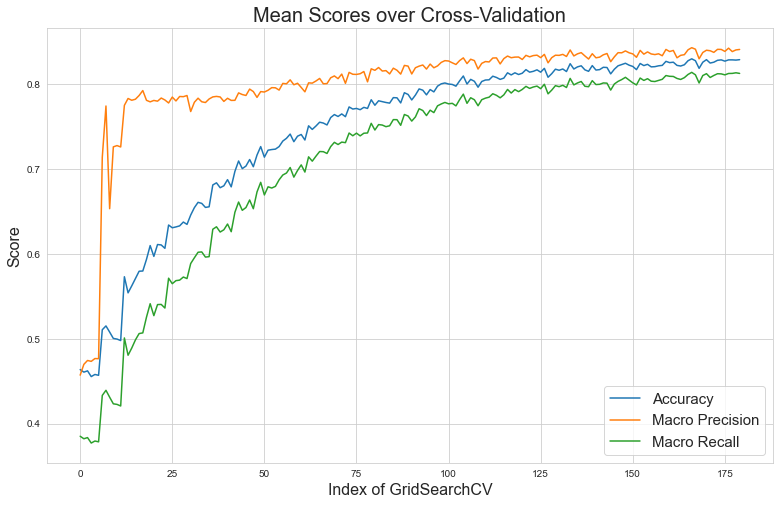

In [195]:
results = CV.cv_results_

accuracies = results['mean_test_accuracy']
precision_macros = results['mean_test_precision_macro']
recall_macros = results['mean_test_recall_macro']
params = results['params']

plt.figure(figsize=(13,8))

plt.plot(accuracies, label="Accuracy")
plt.plot(precision_macros, label="Macro Precision")
plt.plot(recall_macros, label="Macro Recall")

plt.xlabel("Index of GridSearchCV", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.title("Mean Scores over Cross-Validation", fontsize = 20)
plt.legend(fontsize = 15)

plt.show()

In [197]:
# Best results:

print(np.argmax(accuracies))
print(np.argmax(precision_macros))
print(np.argmax(recall_macros))
# all max at 166

print("Best Mean Accuracy:", np.round(accuracies[166],5))
print("Best Mean Macro Precision:", np.round(precision_macros[166],5))
print("Best Mean Macro Recall:", np.round(recall_macros[166],5))
print("Best parameters:", params[166])

# Are we over-fitting at this tree-depth??? Hopefully 5 folds in our cross-validation is enough to prevent this.

166
166
166
Best Mean Accuracy: 0.83008
Best Mean Macro Precision: 0.8432
Best Mean Macro Recall: 0.81412
Best parameters: {'rfc__max_depth': 28, 'rfc__n_estimators': 500}


In [198]:
# Now for TF-IDF word-bagging:
param_grid = {'rfc__n_estimators': [50, 100, 150, 250, 500, 1000], 'rfc__max_depth': [*range(1,31)]}

rfc_pipe = Pipeline([('scale',StandardScaler()), ('rfc',RandomForestClassifier())])

CV = GridSearchCV(rfc_pipe, param_grid, scoring = scoring, refit = 'accuracy', n_jobs = 1)
CV.fit(X2_train, y_train)  


c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 

c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('rfc',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                            

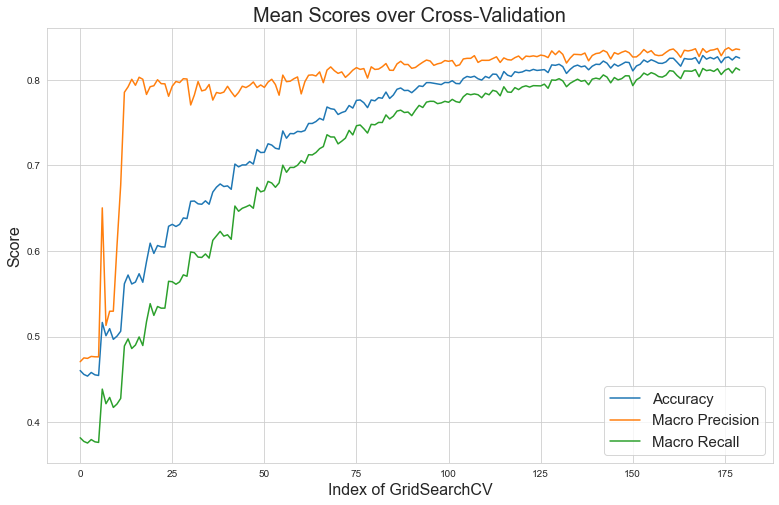

In [199]:
results = CV.cv_results_

accuracies = results['mean_test_accuracy']
precision_macros = results['mean_test_precision_macro']
recall_macros = results['mean_test_recall_macro']
params = results['params']

plt.figure(figsize=(13,8))

plt.plot(accuracies, label="Accuracy")
plt.plot(precision_macros, label="Macro Precision")
plt.plot(recall_macros, label="Macro Recall")

plt.xlabel("Index of GridSearchCV", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.title("Mean Scores over Cross-Validation", fontsize = 20)
plt.legend(fontsize = 15)

plt.show()

In [201]:
# Best results:

print(np.argmax(accuracies))
print(np.argmax(precision_macros))
print(np.argmax(recall_macros))
# prec best at 176, we'll go with 176.

print("Best Mean Accuracy:", np.round(accuracies[176],5))
print("Best Mean Macro Precision:", np.round(precision_macros[176],5))
print("Best Mean Macro Recall:", np.round(recall_macros[176],5))
print("Best parameters:", params[176])

169
176
178
Best Mean Accuracy: 0.82683
Best Mean Macro Precision: 0.83771
Best Mean Macro Recall: 0.81334
Best parameters: {'rfc__max_depth': 30, 'rfc__n_estimators': 150}


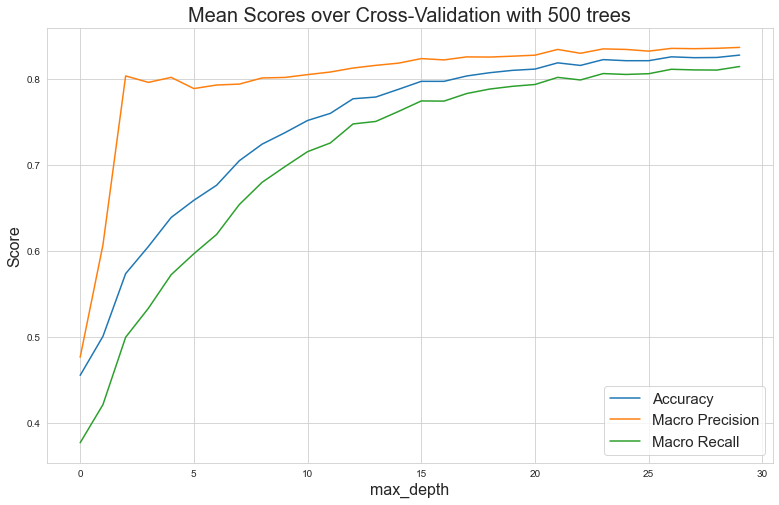

In [202]:
# Just for completeness, we reproduce here a graph of the scores vs. max_depth, with 500 trees. This confirms that
# there is no drop-off in scores when n_estimators is held constant, so (if we have enough folds in our cross-
# validation) we are not over-fitting yet.

plt.figure(figsize=(13,8))

plt.plot(accuracies[4::6], label="Accuracy")
plt.plot(precision_macros[4::6], label="Macro Precision")
plt.plot(recall_macros[4::6], label="Macro Recall")

plt.xlabel("max_depth", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.title("Mean Scores over Cross-Validation with 500 trees", fontsize = 20)
plt.legend(fontsize = 15)

plt.show()

In [203]:
# We will skip trying RFC on the PCA-handled data, since it didn't take too long for RFC to handle the full
# data.

In [204]:
# Now using SVM:

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'svm__C': [0.1, 1, 10], 'svm__degree': [1, 2, 3, 4], 'svm__kernel': ['poly']},
  {'svm__C': [0.1, 1, 10], 'svm__gamma': [0.01, 0.1, 1, 10], 'svm__kernel': ['rbf']},
 ]

svm_pipe = Pipeline([('scale',StandardScaler()), ('svm',SVC())])

CV = GridSearchCV(svm_pipe, param_grid, scoring = scoring, refit = 'accuracy', n_jobs = 1, verbose = 0)
CV.fit(X_train, y_train)  

c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svm',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.0

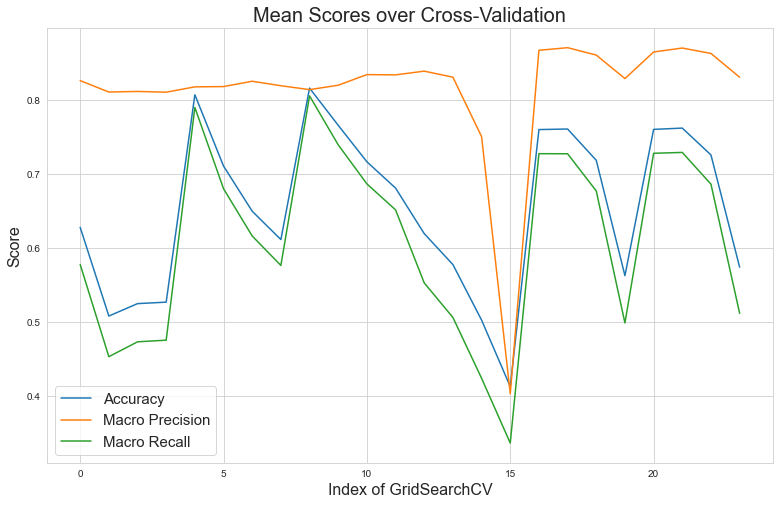

In [205]:
results = CV.cv_results_

accuracies = results['mean_test_accuracy']
precision_macros = results['mean_test_precision_macro']
recall_macros = results['mean_test_recall_macro']
params = results['params']

plt.figure(figsize=(13,8))

plt.plot(accuracies, label="Accuracy")
plt.plot(precision_macros, label="Macro Precision")
plt.plot(recall_macros, label="Macro Recall")


plt.xlabel("Index of GridSearchCV", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.title("Mean Scores over Cross-Validation", fontsize = 20)
plt.legend(fontsize = 15)

plt.show()

In [206]:
params

[{'svm__C': 0.1, 'svm__degree': 1, 'svm__kernel': 'poly'},
 {'svm__C': 0.1, 'svm__degree': 2, 'svm__kernel': 'poly'},
 {'svm__C': 0.1, 'svm__degree': 3, 'svm__kernel': 'poly'},
 {'svm__C': 0.1, 'svm__degree': 4, 'svm__kernel': 'poly'},
 {'svm__C': 1, 'svm__degree': 1, 'svm__kernel': 'poly'},
 {'svm__C': 1, 'svm__degree': 2, 'svm__kernel': 'poly'},
 {'svm__C': 1, 'svm__degree': 3, 'svm__kernel': 'poly'},
 {'svm__C': 1, 'svm__degree': 4, 'svm__kernel': 'poly'},
 {'svm__C': 10, 'svm__degree': 1, 'svm__kernel': 'poly'},
 {'svm__C': 10, 'svm__degree': 2, 'svm__kernel': 'poly'},
 {'svm__C': 10, 'svm__degree': 3, 'svm__kernel': 'poly'},
 {'svm__C': 10, 'svm__degree': 4, 'svm__kernel': 'poly'},
 {'svm__C': 0.1, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'},
 {'svm__C': 0.1, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'},
 {'svm__C': 0.1, 'svm__gamma': 1, 'svm__kernel': 'rbf'},
 {'svm__C': 0.1, 'svm__gamma': 10, 'svm__kernel': 'rbf'},
 {'svm__C': 1, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'},
 {'svm__C': 

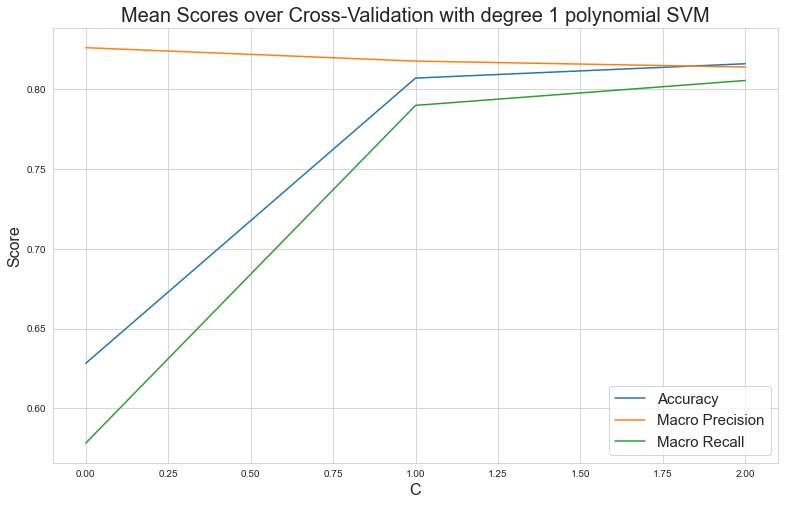

In [207]:
# Degree 1 polynomial SVM seems to do well as seen in index 4 and 8 above:

plt.figure(figsize=(13,8))

plt.plot(accuracies[0:12:4], label="Accuracy")
plt.plot(precision_macros[0:12:4], label="Macro Precision")
plt.plot(recall_macros[0:12:4], label="Macro Recall")

plt.xlabel("C", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.title("Mean Scores over Cross-Validation with degree 1 polynomial SVM", fontsize = 20)
plt.legend(fontsize = 15)

plt.show()

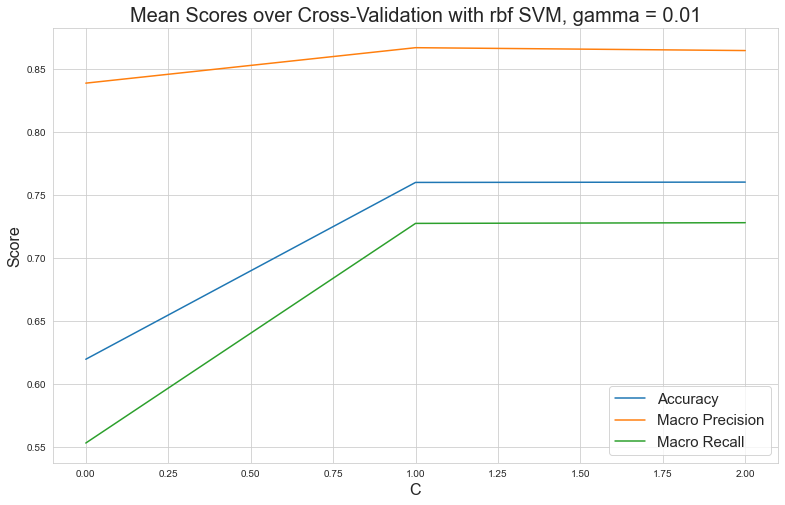

In [208]:
# Also, rbf SVM seems to do well as seen in index 4 and 8 above. Gamma = 0.01 seems to always perform best.
# See rbf SVM with gamma = 0.01 vary with C below:

plt.figure(figsize=(13,8))

plt.plot(accuracies[12::4], label="Accuracy")
plt.plot(precision_macros[12::4], label="Macro Precision")
plt.plot(recall_macros[12::4], label="Macro Recall")

plt.xlabel("C", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.title("Mean Scores over Cross-Validation with rbf SVM, gamma = 0.01", fontsize = 20)
plt.legend(fontsize = 15)

plt.show()

In [209]:
# Best results:

print(np.argmax(accuracies))
print(np.argmax(precision_macros))
print(np.argmax(recall_macros))
# accuracy/recall highest at index 8 (poly SVM, degree 1, C = 10) and precision highest at index 17 (rbf SVM, 
# C = 1, gamma = 0.1).
# We'll choose index 8 (poly SVM, degree 1, C = 10) in order to balance all scores more than just precision.

print("Best Mean Accuracy:", np.round(accuracies[8],5))
print("Best Mean Macro Precision:", np.round(precision_macros[8],5))
print("Best Mean Macro Recall:", np.round(recall_macros[8],5))
print("Best parameters:", params[8])

8
17
8
Best Mean Accuracy: 0.81609
Best Mean Macro Precision: 0.81401
Best Mean Macro Recall: 0.80558
Best parameters: {'svm__C': 10, 'svm__degree': 1, 'svm__kernel': 'poly'}


In [210]:
# Now for the TF-IDF word-bagged data:

param_grid = [
  {'svm__C': [0.1, 1, 10], 'svm__degree': [1, 2, 3, 4], 'svm__kernel': ['poly']},
  {'svm__C': [0.1, 1, 10], 'svm__gamma': [0.01, 0.1, 1, 10], 'svm__kernel': ['rbf']},
 ]

svm_pipe = Pipeline([('scale',StandardScaler()), ('svm',SVC())])

CV = GridSearchCV(svm_pipe, param_grid, scoring = scoring, refit = 'accuracy', n_jobs = 1, verbose = 0)
CV.fit(X2_train, y_train)  


c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svm',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.0

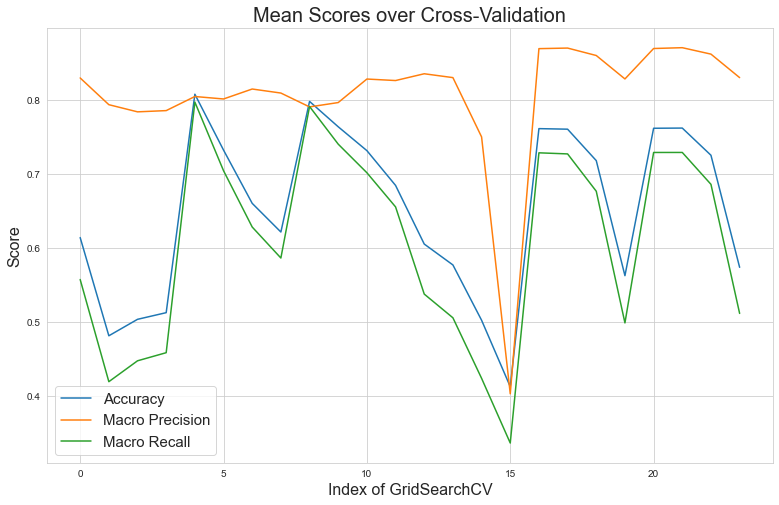

In [211]:
results = CV.cv_results_

accuracies = results['mean_test_accuracy']
precision_macros = results['mean_test_precision_macro']
recall_macros = results['mean_test_recall_macro']
params = results['params']

plt.figure(figsize=(13,8))

plt.plot(accuracies, label="Accuracy")
plt.plot(precision_macros, label="Macro Precision")
plt.plot(recall_macros, label="Macro Recall")


plt.xlabel("Index of GridSearchCV", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.title("Mean Scores over Cross-Validation", fontsize = 20)
plt.legend(fontsize = 15)

plt.show()

In [212]:
# We see similar performance as in the CV-wordbagged data run with SVM. 
# Best results:

print(np.argmax(accuracies))
print(np.argmax(precision_macros))
print(np.argmax(recall_macros))
# accuracy/recall highest at index 4 (poly SVM, degree 1, C = 1) and precision highest at index 21 (rbf SVM, 
# C = 10, gamma = 0.1).
# We'll choose index 4 (poly SVM, degree 1, C = 1) in order to balance all scores more than just precision.

print("Best Mean Accuracy:", np.round(accuracies[4],5))
print("Best Mean Macro Precision:", np.round(precision_macros[4],5))
print("Best Mean Macro Recall:", np.round(recall_macros[4],5))
print("Best parameters:", params[4])

4
21
4
Best Mean Accuracy: 0.80834
Best Mean Macro Precision: 0.80525
Best Mean Macro Recall: 0.79773
Best parameters: {'svm__C': 1, 'svm__degree': 1, 'svm__kernel': 'poly'}


In [213]:
# Neural Nets:

from sklearn.neural_network import MLPClassifier

param_grid = {
    'mlp__hidden_layer_sizes': [(500,), (100, 100, 100, 100, 100), (50, 50, 50, 50, 50, 50, 50, 50, 50, 50)],
    'mlp__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
    }

mlp_pipe = Pipeline([('scale', StandardScaler()), ('mlp', MLPClassifier())])

CV = GridSearchCV(mlp_pipe, param_grid, scoring = scoring, refit = 'accuracy', n_jobs = 1, verbose = 0)
CV.fit(X_train, y_train)  

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('mlp',
                                        MLPClassifier(activation='relu',
                                                      alpha=0.0001,
                                                      batch_size='auto',
                                                      beta_1=0.9, beta_2=0.999,
                                                      early_stopping=False,
                                                      epsilon=1e-08,
                                                      hidden_layer_sizes=(100,),
                                                      learning_rate='constant',
           

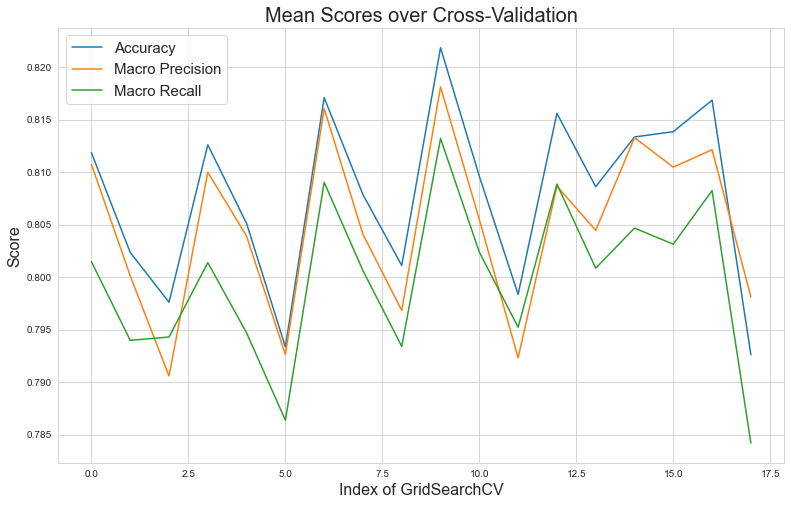

In [214]:
results = CV.cv_results_

accuracies = results['mean_test_accuracy']
precision_macros = results['mean_test_precision_macro']
recall_macros = results['mean_test_recall_macro']
params = results['params']

plt.figure(figsize=(13,8))

plt.plot(accuracies, label="Accuracy")
plt.plot(precision_macros, label="Macro Precision")
plt.plot(recall_macros, label="Macro Recall")

plt.xlabel("Index of GridSearchCV", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.title("Mean Scores over Cross-Validation", fontsize = 20)
plt.legend(fontsize = 15)

plt.show()

In [215]:
params

[{'mlp__alpha': 1e-05, 'mlp__hidden_layer_sizes': (500,)},
 {'mlp__alpha': 1e-05, 'mlp__hidden_layer_sizes': (100, 100, 100, 100, 100)},
 {'mlp__alpha': 1e-05,
  'mlp__hidden_layer_sizes': (50, 50, 50, 50, 50, 50, 50, 50, 50, 50)},
 {'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (500,)},
 {'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100, 100, 100, 100, 100)},
 {'mlp__alpha': 0.0001,
  'mlp__hidden_layer_sizes': (50, 50, 50, 50, 50, 50, 50, 50, 50, 50)},
 {'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (500,)},
 {'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (100, 100, 100, 100, 100)},
 {'mlp__alpha': 0.001,
  'mlp__hidden_layer_sizes': (50, 50, 50, 50, 50, 50, 50, 50, 50, 50)},
 {'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (500,)},
 {'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (100, 100, 100, 100, 100)},
 {'mlp__alpha': 0.01,
  'mlp__hidden_layer_sizes': (50, 50, 50, 50, 50, 50, 50, 50, 50, 50)},
 {'mlp__alpha': 0.1, 'mlp__hidden_layer_sizes': (500,)},
 {'mlp__alpha':

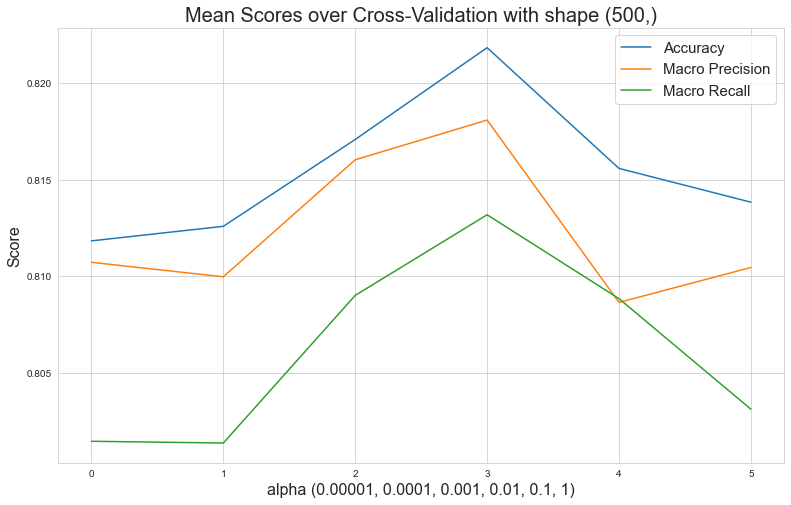

In [216]:
plt.figure(figsize=(13,8))

plt.plot(accuracies[0::3], label="Accuracy")
plt.plot(precision_macros[0::3], label="Macro Precision")
plt.plot(recall_macros[0::3], label="Macro Recall")

plt.xlabel("alpha (0.00001, 0.0001, 0.001, 0.01, 0.1, 1)", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.title("Mean Scores over Cross-Validation with shape (500,)", fontsize = 20)
plt.legend(fontsize = 15)

plt.show()

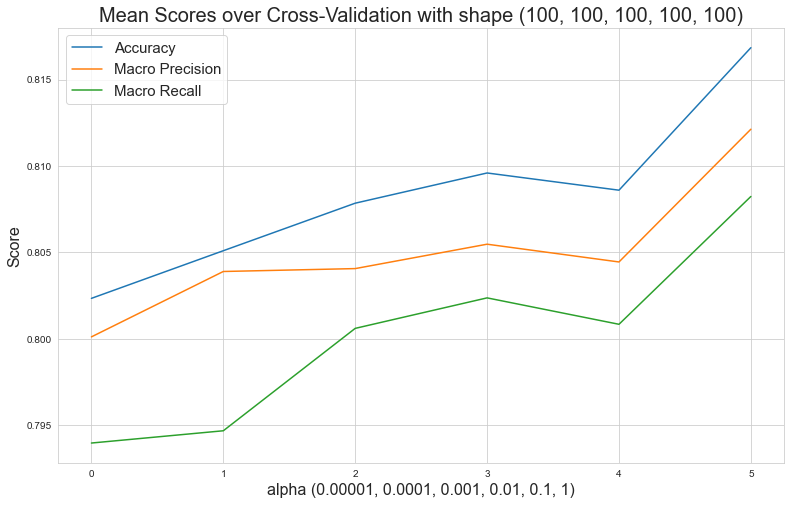

In [217]:
plt.figure(figsize=(13,8))

plt.plot(accuracies[1::3], label="Accuracy")
plt.plot(precision_macros[1::3], label="Macro Precision")
plt.plot(recall_macros[1::3], label="Macro Recall")

plt.xlabel("alpha (0.00001, 0.0001, 0.001, 0.01, 0.1, 1)", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.title("Mean Scores over Cross-Validation with shape (100, 100, 100, 100, 100)", fontsize = 20)
plt.legend(fontsize = 15)

plt.show()

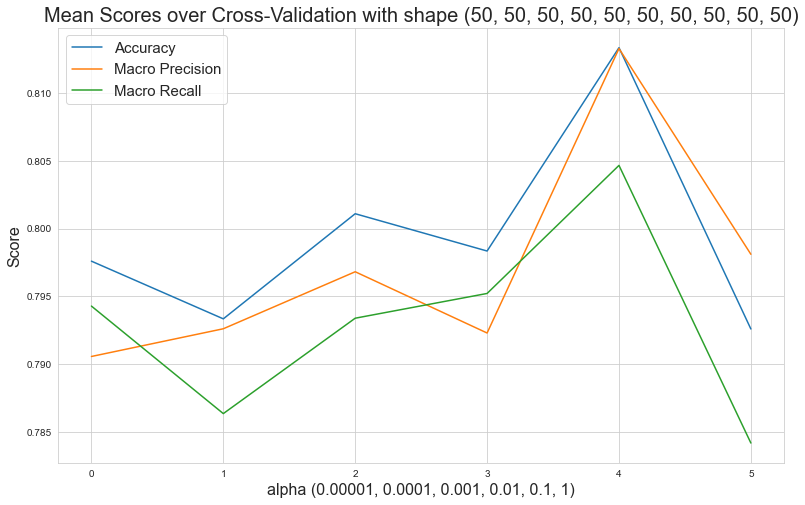

In [218]:
plt.figure(figsize=(13,8))

plt.plot(accuracies[2::3], label="Accuracy")
plt.plot(precision_macros[2::3], label="Macro Precision")
plt.plot(recall_macros[2::3], label="Macro Recall")

plt.xlabel("alpha (0.00001, 0.0001, 0.001, 0.01, 0.1, 1)", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.title("Mean Scores over Cross-Validation with shape (50, 50, 50, 50, 50, 50, 50, 50, 50, 50)", fontsize = 20)
plt.legend(fontsize = 15)

plt.show()

In [219]:
# Best results:

print(np.argmax(accuracies))
print(np.argmax(precision_macros))
print(np.argmax(recall_macros))
# all are highest at index 9.
# We'll choose index 9 (alpha = 0.01, shape = (500,)).

# Interestingly, having a deeper network did NOT result in better scores.

print("Best Mean Accuracy:", np.round(accuracies[9],5))
print("Best Mean Macro Precision:", np.round(precision_macros[9],5))
print("Best Mean Macro Recall:", np.round(recall_macros[9],5))
print("Best parameters:", params[9])

9
9
9
Best Mean Accuracy: 0.82184
Best Mean Macro Precision: 0.81809
Best Mean Macro Recall: 0.81319
Best parameters: {'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (500,)}


In [220]:
# Now for the TF-IDF word-bagged data, same neural net set-up:

CV = GridSearchCV(mlp_pipe, param_grid, scoring = scoring, refit = 'accuracy', n_jobs = 1, verbose = 0)
CV.fit(X2_train, y_train)  

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scale',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('mlp',
                                        MLPClassifier(activation='relu',
                                                      alpha=0.0001,
                                                      batch_size='auto',
                                                      beta_1=0.9, beta_2=0.999,
                                                      early_stopping=False,
                                                      epsilon=1e-08,
                                                      hidden_layer_sizes=(100,),
                                                      learning_rate='constant',
           

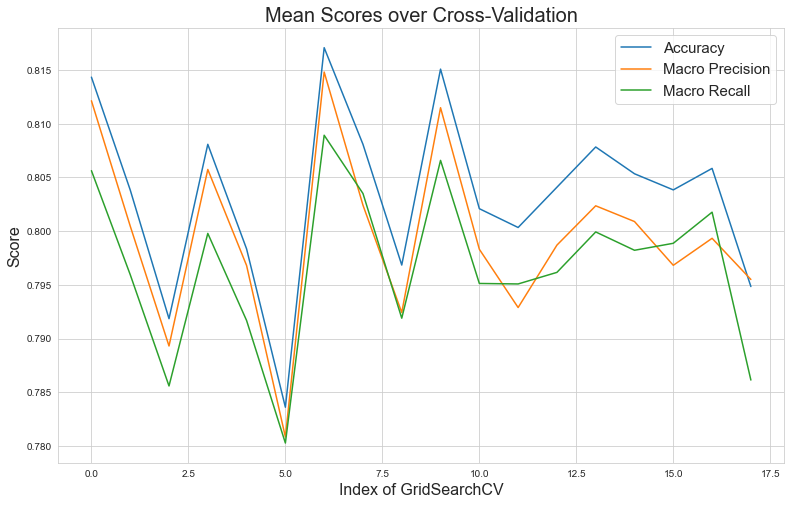

In [221]:
results = CV.cv_results_

accuracies = results['mean_test_accuracy']
precision_macros = results['mean_test_precision_macro']
recall_macros = results['mean_test_recall_macro']
params = results['params']

plt.figure(figsize=(13,8))

plt.plot(accuracies, label="Accuracy")
plt.plot(precision_macros, label="Macro Precision")
plt.plot(recall_macros, label="Macro Recall")

plt.xlabel("Index of GridSearchCV", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.title("Mean Scores over Cross-Validation", fontsize = 20)
plt.legend(fontsize = 15)

plt.show()

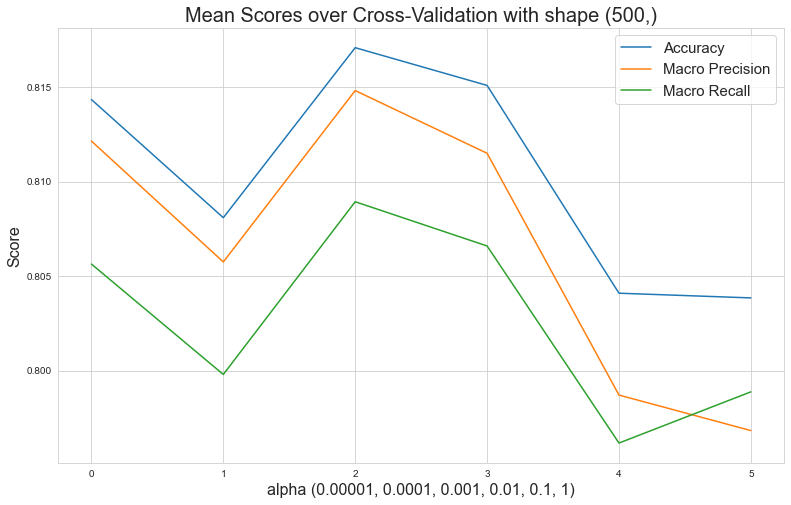

In [222]:
plt.figure(figsize=(13,8))

plt.plot(accuracies[0::3], label="Accuracy")
plt.plot(precision_macros[0::3], label="Macro Precision")
plt.plot(recall_macros[0::3], label="Macro Recall")

plt.xlabel("alpha (0.00001, 0.0001, 0.001, 0.01, 0.1, 1)", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.title("Mean Scores over Cross-Validation with shape (500,)", fontsize = 20)
plt.legend(fontsize = 15)

plt.show()

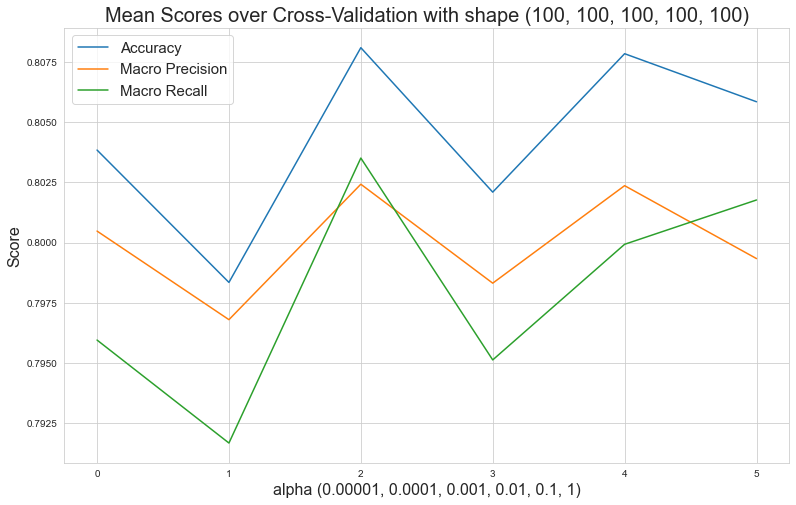

In [223]:
plt.figure(figsize=(13,8))

plt.plot(accuracies[1::3], label="Accuracy")
plt.plot(precision_macros[1::3], label="Macro Precision")
plt.plot(recall_macros[1::3], label="Macro Recall")

plt.xlabel("alpha (0.00001, 0.0001, 0.001, 0.01, 0.1, 1)", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.title("Mean Scores over Cross-Validation with shape (100, 100, 100, 100, 100)", fontsize = 20)
plt.legend(fontsize = 15)

plt.show()

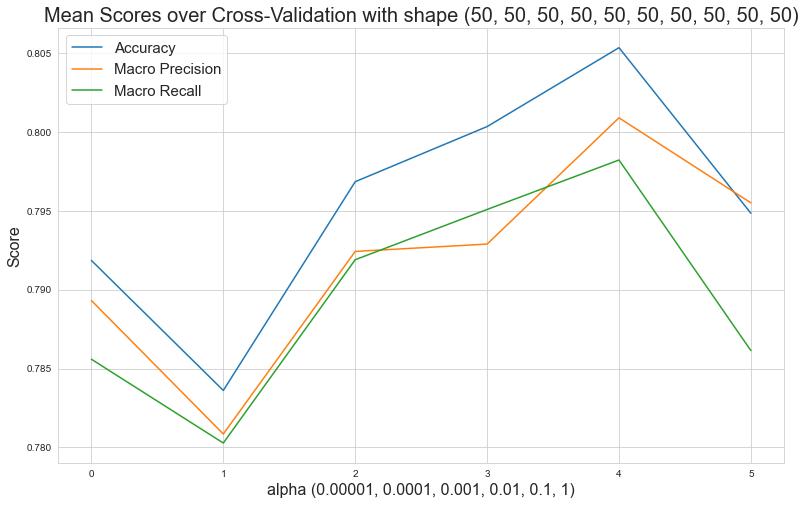

In [224]:
plt.figure(figsize=(13,8))

plt.plot(accuracies[2::3], label="Accuracy")
plt.plot(precision_macros[2::3], label="Macro Precision")
plt.plot(recall_macros[2::3], label="Macro Recall")

plt.xlabel("alpha (0.00001, 0.0001, 0.001, 0.01, 0.1, 1)", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.title("Mean Scores over Cross-Validation with shape (50, 50, 50, 50, 50, 50, 50, 50, 50, 50)", fontsize = 20)
plt.legend(fontsize = 15)

plt.show()

In [225]:
# Best results:

print(np.argmax(accuracies))
print(np.argmax(precision_macros))
print(np.argmax(recall_macros))
# all are highest at index 6 (alpha = 0.001, shape = (500,))
# But we might be better off choosing a higher alpha to avoid overfitting.
# We'll choose index 9 (alpha = 0.01, shape = (500,)).

# Interestingly, having a deeper network did NOT result in better scores.

print("Best Mean Accuracy:", np.round(accuracies[9],5))
print("Best Mean Macro Precision:", np.round(precision_macros[9],5))
print("Best Mean Macro Recall:", np.round(recall_macros[9],5))
print("Best parameters:", params[9])

6
6
6
Best Mean Accuracy: 0.81509
Best Mean Macro Precision: 0.8115
Best Mean Macro Recall: 0.80659
Best parameters: {'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (500,)}


In [226]:
# We choose to use SVM with rbf kernel, C = 1, gamma = 0.01.

svm_final_pipe = Pipeline([('scale',StandardScaler()),('svm', SVC(C = 1, kernel='rbf', gamma = 0.01))])

# Cross-validation:
scoring = ['accuracy','precision_macro','recall_macro']

scores = cross_validate(svm_final_pipe, X_train, y_train, scoring = scoring, cv = 5)
scores2 = cross_validate(svm_final_pipe, X2_train, y_train, scoring = scoring, cv = 5)
scorespca = cross_validate(svm_final_pipe, X_pca_train, y_train, scoring = scoring, cv = 5)
scores2pca = cross_validate(svm_final_pipe, X2_pca_train, y_train, scoring = scoring, cv = 5)

In [227]:
# Scores:

print("Accuracy of CV-WB SVM:",np.round(np.average(scores['test_accuracy']),5))
print("Macro-precision of CV-WB SVM:",np.round(np.average(scores['test_precision_macro']),5))
print("Macro-recall of CV-WB SVM:",np.round(np.average(scores['test_recall_macro']),5))
print()
print("Accuracy of TF-IDF-WB SVM:",np.round(np.average(scores2['test_accuracy']),5))
print("Macro-precision of TF-IDF-WB SVM:",np.round(np.average(scores2['test_precision_macro']),5))
print("Macro-recall of TF-IDF-WB SVM:",np.round(np.average(scores2['test_recall_macro']),5))
print()
print("Accuracy of CV-WB SVM with PCA:",np.round(np.average(scorespca['test_accuracy']),5))
print("Macro-precision of CV-WB SVM with PCA:",np.round(np.average(scorespca['test_precision_macro']),5))
print("Macro-recall of CV-WB SVM with PCA:",np.round(np.average(scorespca['test_recall_macro']),5))
print()
print("Accuracy of TF-IDF-WB SVM with PCA:",np.round(np.average(scores2pca['test_accuracy']),5))
print("Macro-precision of TF-IDF-WB SVM with PCA:",np.round(np.average(scores2pca['test_precision_macro']),5))
print("Macro-recall of TF-IDF-WB SVM with PCA:",np.round(np.average(scores2pca['test_recall_macro']),5))

Accuracy of CV-WB SVM: 0.76011
Macro-precision of CV-WB SVM: 0.86711
Macro-recall of CV-WB SVM: 0.72758

Accuracy of TF-IDF-WB SVM: 0.76186
Macro-precision of TF-IDF-WB SVM: 0.86991
Macro-recall of TF-IDF-WB SVM: 0.72918

Accuracy of CV-WB SVM with PCA: 0.75961
Macro-precision of CV-WB SVM with PCA: 0.86568
Macro-recall of CV-WB SVM with PCA: 0.72707

Accuracy of TF-IDF-WB SVM with PCA: 0.75986
Macro-precision of TF-IDF-WB SVM with PCA: 0.86599
Macro-recall of TF-IDF-WB SVM with PCA: 0.72759


In [89]:
# We tried BaggingClassifier on SVM and AdaBoost on SVM but neither improved the scores. AdaBoost lowered them
# significantly. We will nonetheless use Bagging as it will lower our variance and prevent over-fitting.
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

bagsvm_final_pipe = Pipeline([('scale',StandardScaler()),('svmbag', BaggingClassifier(SVC(C = 1, kernel='rbf', gamma = 0.01), n_estimators = 50, max_samples = 0.75, n_jobs = 2))])


# Cross-validation:
scoring = ['accuracy','precision_macro','recall_macro']

scores = cross_validate(bagsvm_final_pipe, X_train, y_train, scoring = scoring, cv = 5)
scores2 = cross_validate(bagsvm_final_pipe, X2_train, y_train, scoring = scoring, cv = 5)
scorespca = cross_validate(bagsvm_final_pipe, X_pca_train, y_train, scoring = scoring, cv = 5)
scores2pca = cross_validate(bagsvm_final_pipe, X2_pca_train, y_train, scoring = scoring, cv = 5)

In [90]:
# Scores:

print("Accuracy of CV-WB Bag-SVM:",np.round(np.average(scores['test_accuracy']),5))
print("Macro-precision of CV-WB Bag-SVM:",np.round(np.average(scores['test_precision_macro']),5))
print("Macro-recall of CV-WB Bag-SVM:",np.round(np.average(scores['test_recall_macro']),5))
print()
print("Accuracy of TF-IDF-WB Bag-SVM:",np.round(np.average(scores2['test_accuracy']),5))
print("Macro-precision of TF-IDF-WB Bag-SVM:",np.round(np.average(scores2['test_precision_macro']),5))
print("Macro-recall of TF-IDF-WB Bag-SVM:",np.round(np.average(scores2['test_recall_macro']),5))
print()
print("Accuracy of CV-WB Bag-SVM with PCA:",np.round(np.average(scorespca['test_accuracy']),5))
print("Macro-precision of CV-WB Bag-SVM with PCA:",np.round(np.average(scorespca['test_precision_macro']),5))
print("Macro-recall of CV-WB Bag-SVM with PCA:",np.round(np.average(scorespca['test_recall_macro']),5))
print()
print("Accuracy of TF-IDF-WB Bag-SVM with PCA:",np.round(np.average(scores2pca['test_accuracy']),5))
print("Macro-precision of TF-IDF-WB Bag-SVM with PCA:",np.round(np.average(scores2pca['test_precision_macro']),5))
print("Macro-recall of TF-IDF-WB Bag-SVM with PCA:",np.round(np.average(scores2pca['test_recall_macro']),5))

Accuracy of CV-WB Bag-SVM: 0.74113
Macro-precision of CV-WB Bag-SVM: 0.86254
Macro-recall of CV-WB Bag-SVM: 0.70636

Accuracy of TF-IDF-WB Bag-SVM: 0.74412
Macro-precision of TF-IDF-WB Bag-SVM: 0.86563
Macro-recall of TF-IDF-WB Bag-SVM: 0.70911

Accuracy of CV-WB Bag-SVM with PCA: 0.74587
Macro-precision of CV-WB Bag-SVM with PCA: 0.86217
Macro-recall of CV-WB Bag-SVM with PCA: 0.71148

Accuracy of TF-IDF-WB Bag-SVM with PCA: 0.74012
Macro-precision of TF-IDF-WB Bag-SVM with PCA: 0.86018
Macro-recall of TF-IDF-WB Bag-SVM with PCA: 0.70535


In [91]:
# Making predictions on the unlabeled data:

# CV word-bagged data:
from sklearn.ensemble import BaggingClassifier

bagsvm_final_pipe2 = Pipeline([('scale',StandardScaler()),('svmbag', BaggingClassifier(SVC(C = 1, kernel='rbf', gamma = 0.01), n_estimators = 50, max_samples = 0.75, n_jobs = 2))])

bagsvm_final_pipe2.fit(X_train, y_train)
y_pred_cv = bagsvm_final_pipe2.predict(X_test)


# Now for tf-idf word-bagged data:

bagsvm_final_pipe3 = Pipeline([('scale',StandardScaler()),('svmbag', BaggingClassifier(SVC(C = 1, kernel='rbf', gamma = 0.01), n_estimators = 50, max_samples = 0.75, n_jobs = 2))])

bagsvm_final_pipe3.fit(X2_train, y_train)
y_pred_tfidf = bagsvm_final_pipe3.predict(X2_test)

In [92]:
y_pred_cv_df = pd.DataFrame(y_pred_cv)
y_pred_tfidf_df = pd.DataFrame(y_pred_tfidf)

In [93]:
y_pred_cv_df.to_csv("Y predictions, CV.csv", index = False)
y_pred_tfidf_df.to_csv("Y predictions, TF-IDF.csv", index = False)

In [94]:
# Now to test our predictive power:

index = 5920
#5920
print("Test case: tweet & predicted affiliation of index", index, ":")
print()
# the "test" data starts at index 4002, so index 5920 in the original df corresponds to index 5920 - 4002 in the 
# predictions:
print("Text:", tweets_df.loc[index, "text"])
print()
print("Predicted (CV) Affiliation:", y_pred_cv[index - 4002])
print("Predicted (TF-IDF) Affiliation:", y_pred_tfidf[index - 4002])


Test case: tweet & predicted affiliation of index 5920 :

Text: Bizarre to see Trump &amp; Co. all shocked about losing the election, when these are the same people who broke a Supreme Court confirmation process and rushed a nominee through in record time because they thought they would...lose the election.

Predicted (CV) Affiliation: -1
Predicted (TF-IDF) Affiliation: -1


In [95]:
ctweets_df.to_csv("ctweets affiliated4001 and counted,lemmatized,topicked.csv", index = False)